In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.options.display.max_colwidth =150

In [5]:
loan = pd.read_csv('./loan/loan.csv')

C:\Users\window 10\AppData\Local\Temp\ipykernel_1276\4015572219.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan = pd.read_csv('./loan/loan.csv')


In [6]:
loan.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [7]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


## Data Cleaning
  ### 1. Fixing Rows and Columns
   ##### 1.1 Delete summary rows: Total, Subtotal rows
   ##### 1.2  Delete incorrect rows: Header rows, Footer rows
   ##### 1.3 Delete extra rows: Column number, indicators, Blank rows, Page No

In [8]:
loan.tail(5)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
39712  92187      92174       2500         2500           1075.0   36 months   
39713  90665      90607       8500         8500            875.0   36 months   
39714  90395      90390       5000         5000           1325.0   36 months   
39715  90376      89243       5000         5000            650.0   36 months   
39716  87023      86999       7500         7500            800.0   36 months   

      int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
39712    8.07%        78.42     A        A4  ...                NaN   
39713   10.28%       275.38     C        C1  ...                NaN   
39714    8.07%       156.84     A        A4  ...                NaN   
39715    7.43%       155.38     A        A2  ...                NaN   
39716   13.75%       255.43     E        E2  ...                NaN   

      num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75  \
39712                NaN            NaN               NaN   
39713                NaN            NaN               NaN   
39714                NaN            NaN               NaN   
39715                NaN            NaN               NaN   
39716                NaN            NaN               NaN   

      pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort  \
39712                  NaN       NaN             NaN               NaN   
39713                  NaN       NaN             NaN               NaN   
39714                  NaN       NaN             NaN               NaN   
39715                  NaN       NaN             NaN               NaN   
39716                  NaN       NaN             NaN               NaN   

      total_bc_limit total_il_high_credit_limit  
39712            NaN                        NaN  
39713            NaN                        NaN  
39714            NaN                        NaN  
39715            NaN                        NaN  
39716            NaN                        NaN  

[5 rows x 111 columns]

### 2. Checklist for Fixing Columns
  ######  2.1 Merge columns for creating unique identifiers if needed: E.g. Merge State, City into Full address
  ###### 2.2 Split columns for more data: Split address to get State and City to analyse each separately
  ###### 2.3 Add column names: Add column names if missing
  ###### 2.4 Rename columns consistently: Abbreviations, encoded columns
  ###### 2.5 Delete columns: Delete unnecessary columns
  ######  2.6 Align misaligned columns: Dataset may have shifted columns

In [9]:
# 2.1 Merge columns for creating unique identifiers if needed: E.g. Merge State, City into Full addres
loan.columns



Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [10]:
loan.columns[[45, 46, 47]]

Index(['last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d'], dtype='object')

In [11]:
loan.loc[:, 'last_pymnt_amnt'].dtypes

dtype('float64')

In [12]:
loan.loc[:, 'next_pymnt_d'].dtypes

dtype('O')

In [13]:
loan.loc[:, 'term'].dtypes

dtype('O')

In [14]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [15]:
loan[['id', 'member_id', 'loan_amnt', 'funded_amnt','funded_amnt_inv']].dtypes

id                   int64
member_id            int64
loan_amnt            int64
funded_amnt          int64
funded_amnt_inv    float64
dtype: object

In [16]:
# rounding off funded_amnt_inv upto 2 decimal places for better readiblty
loan['funded_amnt_inv'] = loan['funded_amnt_inv'].round(decimals=2)
loan['funded_amnt_inv']

0         4975.0
1         2500.0
2         2400.0
3        10000.0
4         3000.0
          ...   
39712     1075.0
39713      875.0
39714     1325.0
39715      650.0
39716      800.0
Name: funded_amnt_inv, Length: 39717, dtype: float64

In [17]:
# apllied loan_amount is differnet from approved loan(funded_amnt)
loan_diff_btw_applied_and_approved_loan_amnt = loan[loan['loan_amnt'] != loan['funded_amnt']]
loan_diff_btw_applied_and_approved_loan_amnt

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
61     1068934    1277395      17500         8950           8925.0   
66     1069093    1303740      12500         8925           8925.0   
70     1069043    1303486      20975        13575          13550.0   
77     1068416    1302799       7250         7200           7175.0   
80     1068994    1303432      35000        22075          22050.0   
...        ...        ...        ...          ...              ...   
39533   167645     163382      10000         6000            700.0   
39593   141774     141767      20000         4800           1950.0   
39600   140036     140027       4000         1000            550.0   
39601   139980     139977      12000         5000           1400.0   
39611   137042     136922      25000         5650            725.0   

             term int_rate  installment grade sub_grade  ...  \
61      60 months   17.27%       223.74     D        D3  ...   
66      60 months   17.27%       223.11     D        D3  ...   
70      60 months   17.58%       341.63     D        D4  ...   
77      60 months   21.67%       197.51     F        F3  ...   
80      60 months   17.27%       551.84     D        D3  ...   
...           ...      ...          ...   ...       ...  ...   
39533   36 months    8.70%       189.97     B        B1  ...   
39593   36 months   13.12%       162.01     D        D5  ...   
39600   36 months    9.96%        32.25     B        B5  ...   
39601   36 months   10.91%       163.49     C        C3  ...   
39611   36 months   14.38%       194.15     E        E4  ...   

      num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75  \
61                   NaN                NaN            NaN               NaN   
66                   NaN                NaN            NaN               NaN   
70                   NaN                NaN            NaN               NaN   
77                   NaN                NaN            NaN               NaN   
80                   NaN                NaN            NaN               NaN   
...                  ...                ...            ...               ...   
39533                NaN                NaN            NaN               NaN   
39593                NaN                NaN            NaN               NaN   
39600                NaN                NaN            NaN               NaN   
39601                NaN                NaN            NaN               NaN   
39611                NaN                NaN            NaN               NaN   

      pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort  \
61                     0.0       0.0             NaN               NaN   
66                     1.0       0.0             NaN               NaN   
70                     1.0       0.0             NaN               NaN   
77                     1.0       0.0             NaN               NaN   
80                     0.0       0.0             NaN               NaN   
...                    ...       ...             ...               ...   
39533                  NaN       0.0             NaN               NaN   
39593                  NaN       0.0             NaN               NaN   
39600                  NaN       0.0             NaN               NaN   
39601                  NaN       0.0             NaN               NaN   
39611                  NaN       0.0             NaN               NaN   

      total_bc_limit total_il_high_credit_limit  
61               NaN                        NaN  
66               NaN                        NaN  
70               NaN                        NaN  
77               NaN                        NaN  
80               NaN                        NaN  
...              ...                        ...  
39533            NaN                        NaN  
39593            NaN                        NaN  
39600            NaN                        NaN  
39601            NaN                        NaN  
39

In [18]:
# Get statiscal summary
loan[['loan_amnt', 'funded_amnt','funded_amnt_inv']].describe()

loan_amnt   funded_amnt  funded_amnt_inv
count  39717.000000  39717.000000     39717.000000
mean   11219.443815  10947.713196     10397.448876
std     7456.670694   7187.238670      7128.450440
min      500.000000    500.000000         0.000000
25%     5500.000000   5400.000000      5000.000000
50%    10000.000000   9600.000000      8975.000000
75%    15000.000000  15000.000000     14400.000000
max    35000.000000  35000.000000     35000.000000

In [19]:
loan_diff_btw_applied_and_approved_loan_amnt['funded_amnt_inv']

61        8925.0
66        8925.0
70       13550.0
77        7175.0
80       22050.0
          ...   
39533      700.0
39593     1950.0
39600      550.0
39601     1400.0
39611      725.0
Name: funded_amnt_inv, Length: 1849, dtype: float64

In [20]:
# funded_amnt_inv: 
loan.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [21]:
# Colunns having blank and non-blank values
loan.isnull().sum(axis=0)

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [22]:
# Colunns having blank and non-blank values
colms_having_blank_and_non_blank_values = pd.DataFrame(loan.isnull().sum(axis=0))
colms_having_blank_and_non_blank_values

0
id                              0
member_id                       0
loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
...                           ...
tax_liens                      39
tot_hi_cred_lim             39717
total_bal_ex_mort           39717
total_bc_limit              39717
total_il_high_credit_limit  39717

[111 rows x 1 columns]

In [23]:
colms_having_blank_values = colms_having_blank_and_non_blank_values[colms_having_blank_and_non_blank_values.values > 0]
colms_having_blank_values.rename(columns= {0: 'num_of_blank_values'}, inplace=True)
colms_having_blank_values.sort_values(by='num_of_blank_values', ascending=False)

C:\Users\window 10\AppData\Local\Temp\ipykernel_1276\1781129943.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colms_having_blank_values.rename(columns= {0: 'num_of_blank_values'}, inplace=True)


num_of_blank_values
bc_open_to_buy                            39717
acc_open_past_24mths                      39717
bc_util                                   39717
mo_sin_old_il_acct                        39717
mo_sin_old_rev_tl_op                      39717
...                                         ...
collections_12_mths_ex_med                   56
revol_util                                   50
tax_liens                                    39
title                                        11
last_credit_pull_d                            2

[68 rows x 1 columns]

In [24]:
colms_having_blank_values['perc_of_blank_values'] = round((colms_having_blank_values['num_of_blank_values']/loan.shape[0])* 100, 2)
colms_having_blank_values.sort_values(by='perc_of_blank_values', ascending=False)

C:\Users\window 10\AppData\Local\Temp\ipykernel_1276\1655534405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colms_having_blank_values['perc_of_blank_values'] = round((colms_having_blank_values['num_of_blank_values']/loan.shape[0])* 100, 2)


num_of_blank_values  perc_of_blank_values
bc_open_to_buy                            39717                100.00
acc_open_past_24mths                      39717                100.00
bc_util                                   39717                100.00
mo_sin_old_il_acct                        39717                100.00
mo_sin_old_rev_tl_op                      39717                100.00
...                                         ...                   ...
collections_12_mths_ex_med                   56                  0.14
revol_util                                   50                  0.13
tax_liens                                    39                  0.10
title                                        11                  0.03
last_credit_pull_d                            2                  0.01

[68 rows x 2 columns]

In [25]:
loan.isnull().sum(axis=0)

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [26]:
# Colunns having no blank values
loan_cols_having_no_blank_value= loan.loc[:, loan.isnull().sum() == 0]
loan_cols_having_no_blank_value

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ... total_rec_prncp  \
0       36 months   10.65%       162.87     B        B2  ...         5000.00   
1       60 months   15.27%        59.83     C        C4  ...          456.46   
2       36 months   15.96%        84.33     C        C5  ...         2400.00   
3       36 months   13.49%       339.31     C        C1  ...        10000.00   
4       60 months   12.69%        67.79     B        B5  ...         2475.94   
...           ...      ...          ...   ...       ...  ...             ...   
39712   36 months    8.07%        78.42     A        A4  ...         2500.00   
39713   36 months   10.28%       275.38     C        C1  ...         8500.00   
39714   36 months    8.07%       156.84     A        A4  ...         5000.00   
39715   36 months    7.43%       155.38     A        A2  ...         5000.00   
39716   36 months   13.75%       255.43     E        E2  ...         7500.00   

       total_rec_int total_rec_late_fee recoveries collection_recovery_fee  \
0             863.16               0.00       0.00                    0.00   
1             435.17               0.00     117.08                    1.11   
2             605.67               0.00       0.00                    0.00   
3            2214.92              16.97       0.00                    0.00   
4            1037.39               0.00       0.00                    0.00   
...              ...                ...        ...                     ...   
39712         322.97               0.00       0.00                    0.00   
39713        1413.49               0.00       0.00                    0.00   
39714         272.16               0.00       0.00                    0.00   
39715         174.20               0.00       0.00                    0.00   
39716        1695.26               0.00       0.00                    0.00   

      last_pymnt_amnt policy_code application_type acc_now_delinq delinq_amnt  
0              171.62           1       INDIVIDUAL              0           0  
1              119.66           1       INDIVIDUAL              0           0  
2              649.91           1       INDIVIDUAL              0           0  
3              357.48           1       INDIVIDUAL              0           0  
4               67.79           1       INDIVIDUAL              0           0  
...               ...         ...              ...            ...         ...  
39712           80.90           1       INDIVIDUAL              0           0  
39713          281.94           1       INDIVIDUAL              0           0  
39714            0.00           1       INDIVIDUAL              0           0  
39715            0.00           1       INDIVIDUAL              0           0  
39716          256.59           1       INDIVIDUAL              0           0  

[39717 rows x 43 columns]

In [27]:
loan_having_some_blank_value= loan.loc[: , loan.isnull().sum() > 0]
loan_having_some_blank_value

emp_title emp_length  \
0                             NaN  10+ years   
1                           Ryder   < 1 year   
2                             NaN  10+ years   
3             AIR RESOURCES BOARD  10+ years   
4        University Medical Group     1 year   
...                           ...        ...   
39712             FiSite Research    4 years   
39713  Squarewave Solutions, Ltd.    3 years   
39714                         NaN   < 1 year   
39715                         NaN   < 1 year   
39716            Evergreen Center   < 1 year   

                                                                                                                                                        desc  \
0                                                                               Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>   
1        Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/...   
2                                                                                                                                                        NaN   
3        Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & central A/C need to be replace. I'm very sorry to ...   
4        Borrower added on 12/21/11 > I plan on combining three large interest bills together and freeing up some extra each month to pay toward other bi...   
...                                                                                                                                                      ...   
39712   Our current gutter system on our home is old and in need of repair.    We will be using the borrowed funds to replace the gutter system on our home.   
39713  The rate of interest and fees incurred by carrying a balance on my credit card are so outrageous at this point that continuing to pay them is pate...   
39714                                                                                                                                                    NaN   
39715                                                                                                                                                    NaN   
39716                                                            I plan to consolidate over $7,000 of debt: a combination of credit cards and student loans.   

                           title  mths_since_last_delinq  \
0                       Computer                     NaN   
1                           bike                     NaN   
2           real estate business                     NaN   
3                       personel                    35.0   
4                       Personal                    38.0   
...                          ...                     ...   
39712           Home Improvement                     0.0   
39713  Retiring credit card debt                     5.0   
39714     MBA Loan Consolidation                     0.0   
39715                   JAL Loan                     0.0   
39716         Consolidation Loan                    11.0   

       mths_since_last_record revol_util last_pymnt_d next_pymnt_d  \
0                         NaN     83.70%       Jan-15          NaN   
1                         NaN      9.40%       Apr-13          NaN   
2                         NaN     98.50%       Jun-14          NaN   
3                         NaN        21%       Jan-15          NaN   
4                         NaN     53.90%       May-16       Jun-16   
...                       ...        ...          ...          ...   
39712                     0.0     13.10%       Jul-10          NaN   
39713                     0.0     26.90%       Jul-10          NaN   
39714                     0.0     19.40%       Apr-08          NaN   
39715                     0.0      0.70%       Jan-08          NaN   
39716                     0.0     5

In [28]:
loan.shape[0]

39717

In [29]:
loan_having_some_blank_value.isnull().sum()

emp_title                      2459
emp_length                     1075
desc                          12940
title                            11
mths_since_last_delinq        25682
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 68, dtype: int64

In [30]:
loan.isnull().sum(axis=1)

0        58
1        57
2        59
3        56
4        55
         ..
39712    59
39713    59
39714    61
39715    61
39716    59
Length: 39717, dtype: int64

In [31]:
# is all columns having null values in a row?
loan[loan.isnull().sum(axis=1) == loan.shape[1]]

Empty DataFrame
Columns: [id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, collections_12_mths_ex_med, mths_since_last_major_derog, policy_code, application_type, annual_inc_joint, dti_joint, verification_status_joint, acc_now_delinq, tot_coll_amt, tot_cur_bal, open_acc_6m, open_il_6m, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_bc, all_util, total_rev_hi_lim, inq_fi, total_cu_tl, inq_last_12m, acc_open_past_24mths, avg_cur_bal, bc_open_to_buy, bc_util, chargeoff_within_12_mths, delinq_amnt, mo_sin_old_il_acct, mo_sin_old_rev_tl_op, mo_sin_rcnt_rev_tl_op, mo_sin_rcnt_tl, mort_acc, mths_since_recent_bc, mths_since_recent_bc_dlq, mths_since_recent_inq, mths_since_recent_revol_delinq, num_accts_ever_120_pd, num_actv_bc_tl, num_actv_rev_tl, num_bc_sats, num_bc_tl, num_il_tl, num_op_rev_tl, num_rev_accts, num_rev_tl_bal_gt_0, num_sats, num_tl_120dpd_2m, ...]
Index: []

[0 rows x 111 columns]

In [32]:
 loan.shape[1]

111

In [33]:
loans_columns_having_all_values_blank = loan.isnull().sum() == loan.shape[0]

In [34]:
loans_columns_having_all_values_blank = loans_columns_having_all_values_blank[loans_columns_having_all_values_blank]
loans_columns_having_all_values_blank

mths_since_last_major_derog       True
annual_inc_joint                  True
dti_joint                         True
verification_status_joint         True
tot_coll_amt                      True
tot_cur_bal                       True
open_acc_6m                       True
open_il_6m                        True
open_il_12m                       True
open_il_24m                       True
mths_since_rcnt_il                True
total_bal_il                      True
il_util                           True
open_rv_12m                       True
open_rv_24m                       True
max_bal_bc                        True
all_util                          True
total_rev_hi_lim                  True
inq_fi                            True
total_cu_tl                       True
inq_last_12m                      True
acc_open_past_24mths              True
avg_cur_bal                       True
bc_open_to_buy                    True
bc_util                           True
mo_sin_old_il_acct       

In [35]:
# removing columns having all blank value
cols_having_all_blank_values = [col for col in loans_columns_having_all_values_blank.index]
cols_having_all_blank_values

['mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bal

In [36]:
len(cols_having_all_blank_values)

54

In [37]:
# Exclude/Ignore coluns having all blank values
loan= loan.loc[:, ~loan.columns.isin(cols_having_all_blank_values)]
loan

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ... next_pymnt_d  \
0       36 months   10.65%       162.87     B        B2  ...          NaN   
1       60 months   15.27%        59.83     C        C4  ...          NaN   
2       36 months   15.96%        84.33     C        C5  ...          NaN   
3       36 months   13.49%       339.31     C        C1  ...          NaN   
4       60 months   12.69%        67.79     B        B5  ...       Jun-16   
...           ...      ...          ...   ...       ...  ...          ...   
39712   36 months    8.07%        78.42     A        A4  ...          NaN   
39713   36 months   10.28%       275.38     C        C1  ...          NaN   
39714   36 months    8.07%       156.84     A        A4  ...          NaN   
39715   36 months    7.43%       155.38     A        A2  ...          NaN   
39716   36 months   13.75%       255.43     E        E2  ...          NaN   

      last_credit_pull_d collections_12_mths_ex_med  policy_code  \
0                 May-16                        0.0            1   
1                 Sep-13                        0.0            1   
2                 May-16                        0.0            1   
3                 Apr-16                        0.0            1   
4                 May-16                        0.0            1   
...                  ...                        ...          ...   
39712             Jun-10                        NaN            1   
39713             Jul-10                        NaN            1   
39714             Jun-07                        NaN            1   
39715             Jun-07                        NaN            1   
39716             Jun-10                        NaN            1   

      application_type acc_now_delinq chargeoff_within_12_mths delinq_amnt  \
0           INDIVIDUAL              0                      0.0           0   
1           INDIVIDUAL              0                      0.0           0   
2           INDIVIDUAL              0                      0.0           0   
3           INDIVIDUAL              0                      0.0           0   
4           INDIVIDUAL              0                      0.0           0   
...                ...            ...                      ...         ...   
39712       INDIVIDUAL              0                      NaN           0   
39713       INDIVIDUAL              0                      NaN           0   
39714       INDIVIDUAL              0                      NaN           0   
39715       INDIVIDUAL              0                      NaN           0   
39716       INDIVIDUAL              0                      NaN           0   

      pub_rec_bankruptcies tax_liens  
0                      0.0       0.0  
1                      0.0       0.0  
2                      0.0       0.0  
3                      0.0       0.0  
4                      0.0       0.0  
...                    ...       ...  
39712                  NaN       NaN  
39713                  NaN       NaN  
39714                  NaN       NaN  
39715                  NaN       NaN  
39716                  NaN       NaN  

[39717 rows x 57 column

In [38]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [39]:
loan_columns_having_blank_values= loan.isnull().sum()
loan_columns_having_blank_values

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [40]:
loan_columns_having_blank_values.info()

<class 'pandas.core.series.Series'>
Index: 57 entries, id to tax_liens
Series name: None
Non-Null Count  Dtype
--------------  -----
57 non-null     int64
dtypes: int64(1)
memory usage: 2.9+ KB


In [41]:
loan_columns_having_blank_values

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [42]:
loan_columns_having_blank_values>0

id                            False
member_id                     False
loan_amnt                     False
funded_amnt                   False
funded_amnt_inv               False
term                          False
int_rate                      False
installment                   False
grade                         False
sub_grade                     False
emp_title                      True
emp_length                     True
home_ownership                False
annual_inc                    False
verification_status           False
issue_d                       False
loan_status                   False
pymnt_plan                    False
url                           False
desc                           True
purpose                       False
title                          True
zip_code                      False
addr_state                    False
dti                           False
delinq_2yrs                   False
earliest_cr_line              False
inq_last_6mths              

In [43]:
columns_having_blank_values = loan_columns_having_blank_values[loan_columns_having_blank_values > 0]

In [44]:
columns_having_blank_values

emp_title                      2459
emp_length                     1075
desc                          12940
title                            11
mths_since_last_delinq        25682
mths_since_last_record        36931
revol_util                       50
last_pymnt_d                     71
next_pymnt_d                  38577
last_credit_pull_d                2
collections_12_mths_ex_med       56
chargeoff_within_12_mths         56
pub_rec_bankruptcies            697
tax_liens                        39
dtype: int64

In [45]:
loan_columns_having_blank_values = pd.DataFrame({'columns': columns_having_blank_values.index,
                                                'num_of_blank_values': columns_having_blank_values.values})
loan_columns_having_blank_values

columns  num_of_blank_values
0                    emp_title                 2459
1                   emp_length                 1075
2                         desc                12940
3                        title                   11
4       mths_since_last_delinq                25682
5       mths_since_last_record                36931
6                   revol_util                   50
7                 last_pymnt_d                   71
8                 next_pymnt_d                38577
9           last_credit_pull_d                    2
10  collections_12_mths_ex_med                   56
11    chargeoff_within_12_mths                   56
12        pub_rec_bankruptcies                  697
13                   tax_liens                   39

In [46]:
loan_columns_having_blank_values['Blank %'] = round((loan_columns_having_blank_values['num_of_blank_values']/loan.shape[0])*100, 2)
loan_columns_having_blank_values

columns  num_of_blank_values  Blank %
0                    emp_title                 2459     6.19
1                   emp_length                 1075     2.71
2                         desc                12940    32.58
3                        title                   11     0.03
4       mths_since_last_delinq                25682    64.66
5       mths_since_last_record                36931    92.99
6                   revol_util                   50     0.13
7                 last_pymnt_d                   71     0.18
8                 next_pymnt_d                38577    97.13
9           last_credit_pull_d                    2     0.01
10  collections_12_mths_ex_med                   56     0.14
11    chargeoff_within_12_mths                   56     0.14
12        pub_rec_bankruptcies                  697     1.75
13                   tax_liens                   39     0.10

In [47]:
loan['emp_title'].describe()

count       37258
unique      28820
top       US Army
freq          134
Name: emp_title, dtype: object

In [48]:
loan_columns_having_blank_values

columns  num_of_blank_values  Blank %
0                    emp_title                 2459     6.19
1                   emp_length                 1075     2.71
2                         desc                12940    32.58
3                        title                   11     0.03
4       mths_since_last_delinq                25682    64.66
5       mths_since_last_record                36931    92.99
6                   revol_util                   50     0.13
7                 last_pymnt_d                   71     0.18
8                 next_pymnt_d                38577    97.13
9           last_credit_pull_d                    2     0.01
10  collections_12_mths_ex_med                   56     0.14
11    chargeoff_within_12_mths                   56     0.14
12        pub_rec_bankruptcies                  697     1.75
13                   tax_liens                   39     0.10

In [49]:
type(loan_columns_having_blank_values['Blank %'])

pandas.core.series.Series

In [50]:
loan_columns_having_blank_values['Blank %'].dtype

dtype('float64')

In [51]:
datatypes = loan_columns_having_blank_values.dtype
print(datatypes)

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [ ]:
loan.dtype

In [ ]:
loan.head()

### Fix/Treat Missing Values

In [ ]:
# Created sub_dataframe having columns containing missing values
loan_columns_having_blank_values

In [52]:
loan['emp_title'].value_counts()

US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: emp_title, Length: 28820, dtype: int64

In [53]:
loan['emp_title'].mode()

0    US Army
Name: emp_title, dtype: object

In [54]:
# treating missing values for employee title colukn
loan.fillna(value={'emp_title': "US Army"}, inplace=True)

In [55]:
loan['emp_title'].value_counts()

US Army                            2593
Bank of America                     109
IBM                                  66
AT&T                                 59
Kaiser Permanente                    56
                                   ... 
AMEC                                  1
lee county sheriff                    1
Bacon County Board of Education       1
Hotpads                               1
Evergreen Center                      1
Name: emp_title, Length: 28820, dtype: int64

In [56]:
loan['emp_title'].describe()

count       39717
unique      28820
top       US Army
freq         2593
Name: emp_title, dtype: object

In [57]:
loan['emp_length'].isnull().sum()

1075

In [58]:
loan['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [59]:
loan['emp_length'].dtypes

dtype('O')

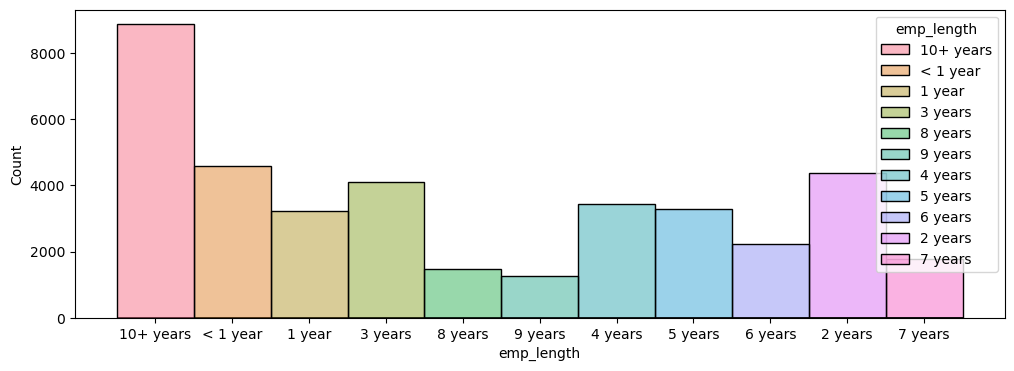

In [60]:
plt.figure(figsize=(12, 4))
sns.histplot(x='emp_length', data=loan,hue='emp_length')
plt.show()

In [61]:
most_common_emp_length = loan['emp_length'].mode()
most_common_emp_length.values[0]

'10+ years'

In [62]:
loan.fillna(value={"emp_length": most_common_emp_length.values[0]}, inplace=True)

In [63]:
loan['emp_length'].isnull().sum()

0

In [64]:
loan['emp_length'].value_counts()

10+ years    9954
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [65]:
pd.DataFrame(loan['desc'].value_counts()).head(20)

desc
                                                                                                              210
Debt Consolidation                                                                                              8
Camping Membership                                                                                              6
personal loan                                                                                                   3
credit card consolidation                                                                                       3
credit card debt consolidation                                                                                  3
Personal Loan                                                                                                   3
  Borrower added on 09/21/11 > Debt consolidation<br/>                                                          2
  Borrower added on 06/30/11 > Debt Consolidation<br/>                                                          2
Car financing                                                                                                   2
Debt consolidation                                                                                              2
  Borrower added on 11/23/11 > Debt consolidation<br>                                                           2
Motorcycle Loan                                                                                                 2
Consolidate                                                                                                     2
This loan would be to consolidate my credit card debts, and have one payment at a reasonable interest rate.     2
refinancing                                                                                                     2
consolidation                                                                                                   2
  Borrower added on 12/05/11 > Credit Card Refinancing<br>                                                      2
Debt consolidation loan                                                                                         2
debt consolidation                                                                                              2

In [66]:
pd.DataFrame(loan['desc'])

desc
0                                                                               Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>
1        Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/...
2                                                                                                                                                        NaN
3        Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & central A/C need to be replace. I'm very sorry to ...
4        Borrower added on 12/21/11 > I plan on combining three large interest bills together and freeing up some extra each month to pay toward other bi...
...                                                                                                                                                      ...
39712   Our current gutter system on our home is old and in need of repair.    We will be using the borrowed funds to replace the gutter system on our home.
39713  The rate of interest and fees incurred by carrying a balance on my credit card are so outrageous at this point that continuing to pay them is pate...
39714                                                                                                                                                    NaN
39715                                                                                                                                                    NaN
39716                                                            I plan to consolidate over $7,000 of debt: a combination of credit cards and student loans.

[39717 rows x 1 columns]

In [67]:
loan_columns_having_blank_values

columns  num_of_blank_values  Blank %
0                    emp_title                 2459     6.19
1                   emp_length                 1075     2.71
2                         desc                12940    32.58
3                        title                   11     0.03
4       mths_since_last_delinq                25682    64.66
5       mths_since_last_record                36931    92.99
6                   revol_util                   50     0.13
7                 last_pymnt_d                   71     0.18
8                 next_pymnt_d                38577    97.13
9           last_credit_pull_d                    2     0.01
10  collections_12_mths_ex_med                   56     0.14
11    chargeoff_within_12_mths                   56     0.14
12        pub_rec_bankruptcies                  697     1.75
13                   tax_liens                   39     0.10

In [68]:
loan

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ... next_pymnt_d  \
0       36 months   10.65%       162.87     B        B2  ...          NaN   
1       60 months   15.27%        59.83     C        C4  ...          NaN   
2       36 months   15.96%        84.33     C        C5  ...          NaN   
3       36 months   13.49%       339.31     C        C1  ...          NaN   
4       60 months   12.69%        67.79     B        B5  ...       Jun-16   
...           ...      ...          ...   ...       ...  ...          ...   
39712   36 months    8.07%        78.42     A        A4  ...          NaN   
39713   36 months   10.28%       275.38     C        C1  ...          NaN   
39714   36 months    8.07%       156.84     A        A4  ...          NaN   
39715   36 months    7.43%       155.38     A        A2  ...          NaN   
39716   36 months   13.75%       255.43     E        E2  ...          NaN   

      last_credit_pull_d collections_12_mths_ex_med  policy_code  \
0                 May-16                        0.0            1   
1                 Sep-13                        0.0            1   
2                 May-16                        0.0            1   
3                 Apr-16                        0.0            1   
4                 May-16                        0.0            1   
...                  ...                        ...          ...   
39712             Jun-10                        NaN            1   
39713             Jul-10                        NaN            1   
39714             Jun-07                        NaN            1   
39715             Jun-07                        NaN            1   
39716             Jun-10                        NaN            1   

      application_type acc_now_delinq chargeoff_within_12_mths delinq_amnt  \
0           INDIVIDUAL              0                      0.0           0   
1           INDIVIDUAL              0                      0.0           0   
2           INDIVIDUAL              0                      0.0           0   
3           INDIVIDUAL              0                      0.0           0   
4           INDIVIDUAL              0                      0.0           0   
...                ...            ...                      ...         ...   
39712       INDIVIDUAL              0                      NaN           0   
39713       INDIVIDUAL              0                      NaN           0   
39714       INDIVIDUAL              0                      NaN           0   
39715       INDIVIDUAL              0                      NaN           0   
39716       INDIVIDUAL              0                      NaN           0   

      pub_rec_bankruptcies tax_liens  
0                      0.0       0.0  
1                      0.0       0.0  
2                      0.0       0.0  
3                      0.0       0.0  
4                      0.0       0.0  
...                    ...       ...  
39712                  NaN       NaN  
39713                  NaN       NaN  
39714                  NaN       NaN  
39715                  NaN       NaN  
39716                  NaN       NaN  

[39717 rows x 57 column

In [69]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                         0
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [70]:
# exclude following columns

In [71]:
colms_have_to_be_excluded=['mths_since_last_record', 'mths_since_last_delinq', 'next_pymnt_d']
loan = loan.loc[:, ~loan.columns.isin(colms_have_to_be_excluded)]

In [72]:
loan

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ... last_pymnt_amnt  \
0       36 months   10.65%       162.87     B        B2  ...          171.62   
1       60 months   15.27%        59.83     C        C4  ...          119.66   
2       36 months   15.96%        84.33     C        C5  ...          649.91   
3       36 months   13.49%       339.31     C        C1  ...          357.48   
4       60 months   12.69%        67.79     B        B5  ...           67.79   
...           ...      ...          ...   ...       ...  ...             ...   
39712   36 months    8.07%        78.42     A        A4  ...           80.90   
39713   36 months   10.28%       275.38     C        C1  ...          281.94   
39714   36 months    8.07%       156.84     A        A4  ...            0.00   
39715   36 months    7.43%       155.38     A        A2  ...            0.00   
39716   36 months   13.75%       255.43     E        E2  ...          256.59   

      last_credit_pull_d collections_12_mths_ex_med  policy_code  \
0                 May-16                        0.0            1   
1                 Sep-13                        0.0            1   
2                 May-16                        0.0            1   
3                 Apr-16                        0.0            1   
4                 May-16                        0.0            1   
...                  ...                        ...          ...   
39712             Jun-10                        NaN            1   
39713             Jul-10                        NaN            1   
39714             Jun-07                        NaN            1   
39715             Jun-07                        NaN            1   
39716             Jun-10                        NaN            1   

      application_type acc_now_delinq chargeoff_within_12_mths delinq_amnt  \
0           INDIVIDUAL              0                      0.0           0   
1           INDIVIDUAL              0                      0.0           0   
2           INDIVIDUAL              0                      0.0           0   
3           INDIVIDUAL              0                      0.0           0   
4           INDIVIDUAL              0                      0.0           0   
...                ...            ...                      ...         ...   
39712       INDIVIDUAL              0                      NaN           0   
39713       INDIVIDUAL              0                      NaN           0   
39714       INDIVIDUAL              0                      NaN           0   
39715       INDIVIDUAL              0                      NaN           0   
39716       INDIVIDUAL              0                      NaN           0   

      pub_rec_bankruptcies tax_liens  
0                      0.0       0.0  
1                      0.0       0.0  
2                      0.0       0.0  
3                      0.0       0.0  
4                      0.0       0.0  
...                    ...       ...  
39712                  NaN       NaN  
39713                  NaN       NaN  
39714                  NaN       NaN  
39715                  NaN       NaN  
39716                  NaN 

In [73]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   39717 non-null  object 
 11  emp_length                  39717 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [74]:
loan.groupby(by=['grade', 'sub_grade'])['grade', 'sub_grade'].count()

C:\Users\window 10\AppData\Local\Temp\ipykernel_1276\1905520516.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  loan.groupby(by=['grade', 'sub_grade'])['grade', 'sub_grade'].count()


grade  sub_grade
grade sub_grade                  
A     A1          1139       1139
      A2          1508       1508
      A3          1810       1810
      A4          2886       2886
      A5          2742       2742
B     B1          1830       1830
      B2          2057       2057
      B3          2917       2917
      B4          2512       2512
      B5          2704       2704
C     C1          2136       2136
      C2          2011       2011
      C3          1529       1529
      C4          1236       1236
      C5          1186       1186
D     D1           931        931
      D2          1348       1348
      D3          1173       1173
      D4           981        981
      D5           874        874
E     E1           763        763
      E2           656        656
      E3           553        553
      E4           454        454
      E5           416        416
F     F1           329        329
      F2           249        249
      F3           185        185
      F4           168        168
      F5           118        118
G     G1           104        104
      G2            78         78
      G3            48         48
      G4            56         56
      G5            30         30

In [75]:
loan['tax_liens'].value_counts()

0.0    39678
Name: tax_liens, dtype: int64

In [76]:
loan['pub_rec_bankruptcies'].value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [77]:
loan['delinq_amnt'].value_counts()

0    39717
Name: delinq_amnt, dtype: int64

In [78]:
loan['delinq_amnt'].value_counts()

0    39717
Name: delinq_amnt, dtype: int64

In [79]:
# removing delinq_amnt columns since all values are 0
loan = loan.loc[:, ~loan.columns.isin(['delinq_amnt'])]
loan

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ... last_pymnt_d  \
0       36 months   10.65%       162.87     B        B2  ...       Jan-15   
1       60 months   15.27%        59.83     C        C4  ...       Apr-13   
2       36 months   15.96%        84.33     C        C5  ...       Jun-14   
3       36 months   13.49%       339.31     C        C1  ...       Jan-15   
4       60 months   12.69%        67.79     B        B5  ...       May-16   
...           ...      ...          ...   ...       ...  ...          ...   
39712   36 months    8.07%        78.42     A        A4  ...       Jul-10   
39713   36 months   10.28%       275.38     C        C1  ...       Jul-10   
39714   36 months    8.07%       156.84     A        A4  ...       Apr-08   
39715   36 months    7.43%       155.38     A        A2  ...       Jan-08   
39716   36 months   13.75%       255.43     E        E2  ...       Jun-10   

      last_pymnt_amnt last_credit_pull_d  collections_12_mths_ex_med  \
0              171.62             May-16                         0.0   
1              119.66             Sep-13                         0.0   
2              649.91             May-16                         0.0   
3              357.48             Apr-16                         0.0   
4               67.79             May-16                         0.0   
...               ...                ...                         ...   
39712           80.90             Jun-10                         NaN   
39713          281.94             Jul-10                         NaN   
39714            0.00             Jun-07                         NaN   
39715            0.00             Jun-07                         NaN   
39716          256.59             Jun-10                         NaN   

      policy_code application_type acc_now_delinq chargeoff_within_12_mths  \
0               1       INDIVIDUAL              0                      0.0   
1               1       INDIVIDUAL              0                      0.0   
2               1       INDIVIDUAL              0                      0.0   
3               1       INDIVIDUAL              0                      0.0   
4               1       INDIVIDUAL              0                      0.0   
...           ...              ...            ...                      ...   
39712           1       INDIVIDUAL              0                      NaN   
39713           1       INDIVIDUAL              0                      NaN   
39714           1       INDIVIDUAL              0                      NaN   
39715           1       INDIVIDUAL              0                      NaN   
39716           1       INDIVIDUAL              0                      NaN   

      pub_rec_bankruptcies tax_liens  
0                      0.0       0.0  
1                      0.0       0.0  
2                      0.0       0.0  
3                      0.0       0.0  
4                      0.0       0.0  
...                    ...       ...  
39712                  NaN       NaN  
39713                  NaN       NaN  
39714                  NaN       NaN  
39715                  NaN       NaN  
39716          

In [80]:
loan.iloc[:1, 10:27]

emp_title emp_length home_ownership  annual_inc verification_status issue_d  \
0   US Army  10+ years           RENT     24000.0            Verified  Dec-11   

  loan_status pymnt_plan  \
0  Fully Paid          n   

                                                                url  \
0  https://lendingclub.com/browse/loanDetail.action?loan_id=1077501   

                                                                             desc  \
0    Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>   

       purpose     title zip_code addr_state    dti  delinq_2yrs  \
0  credit_card  Computer    860xx         AZ  27.65            0   

  earliest_cr_line  
0           Jan-85

In [81]:
loan['home_ownership'].value_counts()

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [82]:
round(loan['annual_inc'].describe(), 2)

count      39717.00
mean       68968.93
std        63793.77
min         4000.00
25%        40404.00
50%        59000.00
75%        82300.00
max      6000000.00
Name: annual_inc, dtype: float64

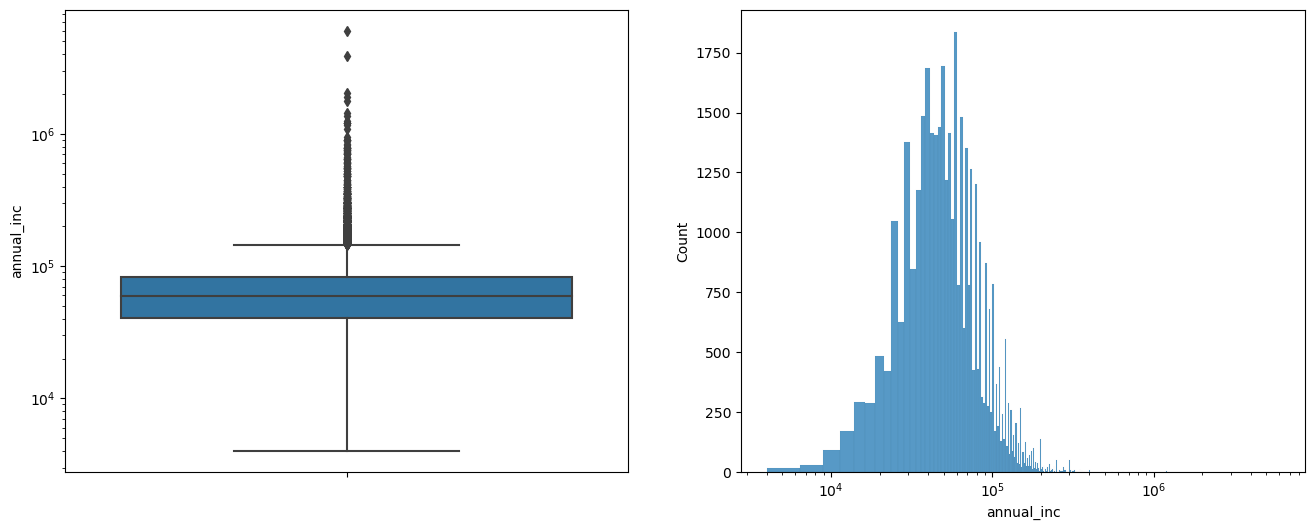

In [83]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y='annual_inc', data=loan)
plt.yscale('log')

plt.subplot(1, 2, 2)
sns.histplot(x='annual_inc', data=loan)
plt.xscale('log')

plt.show()


In [84]:
# how many customers having annual_inc greater than 2,00,000 (outliers)
annual_inc_grater_than_2lac = loan[loan['annual_inc'] > 200000]
annual_inc_grater_than_2lac

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
170    1067434    1301822      25000        25000         25000.00   
336    1065110    1299187      35000        23150         21739.75   
392    1064548    1298574       5000         5000          5000.00   
567    1062510    1294575       2000         2000          2000.00   
717    1060831    1292796      28000        28000         28000.00   
...        ...        ...        ...          ...              ...   
39611   137042     136922      25000         5650           725.00   
39645   126287     125787      10000        10000          2925.00   
39669   118523     118519       6500         6500           225.00   
39673   117056     117046       5000         5000          1475.00   
39692    76597      76583       5000         5000          1775.00   

             term int_rate  installment grade sub_grade  ... last_pymnt_d  \
170     36 months   12.42%       835.39     B        B4  ...       Jan-15   
336     60 months   17.27%       578.71     D        D3  ...       Oct-12   
392     36 months    6.62%       153.52     A        A2  ...       Jan-15   
567     36 months    9.91%        64.45     B        B1  ...       Dec-14   
717     36 months   15.96%       983.85     C        C5  ...       Feb-14   
...           ...      ...          ...   ...       ...  ...          ...   
39611   36 months   14.38%       194.15     E        E4  ...       Oct-10   
39645   36 months   11.54%       329.95     C        C5  ...       Oct-08   
39669   36 months   15.01%       225.37     F        F1  ...       Feb-09   
39673   36 months    7.75%       156.11     A        A3  ...       Jan-10   
39692   36 months    9.01%       159.03     B        B2  ...       Jul-10   

      last_pymnt_amnt last_credit_pull_d  collections_12_mths_ex_med  \
170            842.08             Dec-14                         0.0   
336          21393.19             May-16                         0.0   
392            166.04             Dec-14                         0.0   
567             67.24             May-16                         0.0   
717          10164.77             Mar-14                         0.0   
...               ...                ...                         ...   
39611          203.82             Oct-10                         0.0   
39645         7110.05             Sep-08                         0.0   
39669          225.37             May-16                         NaN   
39673         1221.57             Jan-10                         NaN   
39692          160.61             Jul-10                         NaN   

      policy_code application_type acc_now_delinq chargeoff_within_12_mths  \
170             1       INDIVIDUAL              0                      0.0   
336             1       INDIVIDUAL              0                      0.0   
392             1       INDIVIDUAL              0                      0.0   
567             1       INDIVIDUAL              0                      0.0   
717             1       INDIVIDUAL              0                      0.0   
...           ...              ...            ...                      ...   
39611           1       INDIVIDUAL              0                      0.0   
39645           1       INDIVIDUAL              0                      0.0   
39669           1       INDIVIDUAL              0                      NaN   
39673           1       INDIVIDUAL              0                      NaN   
39692           1       INDIVIDUAL              0                      NaN   

      pub_rec_bankruptcies tax_liens  
170                    0.0       0.0  
336                    0.0       0.0  
392                    0.0       0.0  
567                    0.0       0.0  
717                    0.0       0.0  
...                    ...       ...  
39611                  NaN       0.0  
39645                  NaN       0.0  
39669                  NaN       0.0  
39673                  NaN       0.0  
39692          

In [85]:
# even customer having more than 2lac annual income stil 10% customer is defaulter
annual_inc_grater_than_2lac['loan_status'].value_counts()

Fully Paid     510
Charged Off     60
Current         16
Name: loan_status, dtype: int64

##### Analysing verification_status column i.e checking wether income source is verified or not

In [86]:
loan['verification_status'].describe()

count            39717
unique               3
top       Not Verified
freq             16921
Name: verification_status, dtype: object

In [87]:
loan['verification_status'].value_counts()

Not Verified       16921
Verified           12809
Source Verified     9987
Name: verification_status, dtype: int64

In [88]:
loan.groupby(by=['verification_status', 'loan_status'])['loan_status'].describe()

count unique          top   freq
verification_status loan_status                                  
Not Verified        Charged Off   2142      1  Charged Off   2142
                    Current        227      1      Current    227
                    Fully Paid   14552      1   Fully Paid  14552
Source Verified     Charged Off   1434      1  Charged Off   1434
                    Current        310      1      Current    310
                    Fully Paid    8243      1   Fully Paid   8243
Verified            Charged Off   2051      1  Charged Off   2051
                    Current        603      1      Current    603
                    Fully Paid   10155      1   Fully Paid  10155

In [89]:
loan['issue_d'].describe()

count      39717
unique        55
top       Dec-11
freq        2260
Name: issue_d, dtype: object

In [90]:
loan['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
4    Dec-11
Name: issue_d, dtype: object

In [91]:
# convert string date time to datetime object
loan['issue_d'] = pd.to_datetime(loan['issue_d'], format="%b-%y")
loan['issue_d'].head()

C:\Users\window 10\AppData\Local\Temp\ipykernel_1276\3024810144.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan['issue_d'] = pd.to_datetime(loan['issue_d'], format="%b-%y")


0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
4   2011-12-01
Name: issue_d, dtype: datetime64[ns]

In [92]:
loan['issue_d'].describe()

C:\Users\window 10\AppData\Local\Temp\ipykernel_1276\651775178.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  loan['issue_d'].describe()


count                   39717
unique                     55
top       2011-12-01 00:00:00
freq                     2260
first     2007-06-01 00:00:00
last      2011-12-01 00:00:00
Name: issue_d, dtype: object

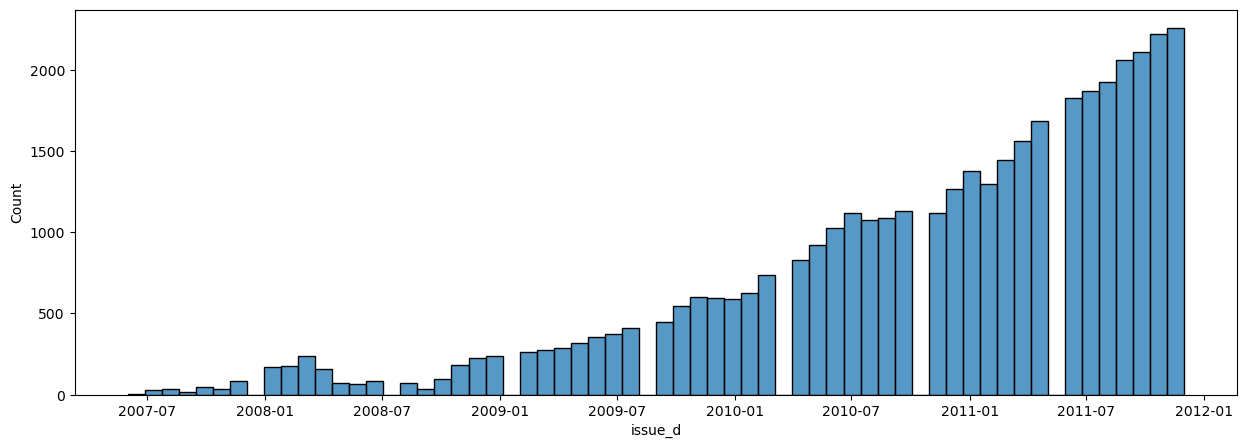

In [93]:
plt.figure(figsize=(15, 5))

sns.histplot(x='issue_d', data=loan)

plt.show()

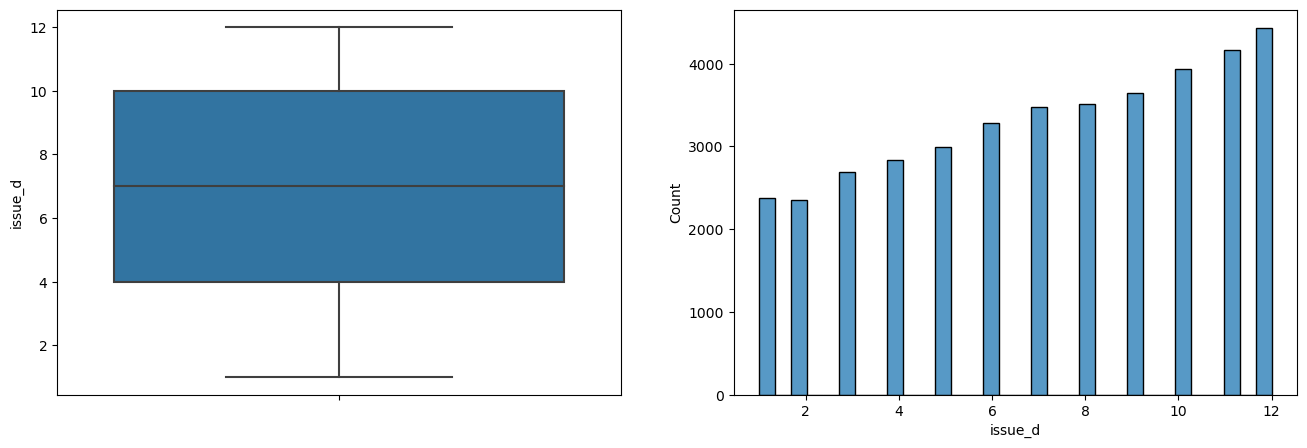

In [94]:
#month wise loan_issue_date

plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=loan['issue_d'].dt.month)

plt.subplot(1, 2, 2)
sns.histplot(x=loan['issue_d'].dt.month)

plt.show()

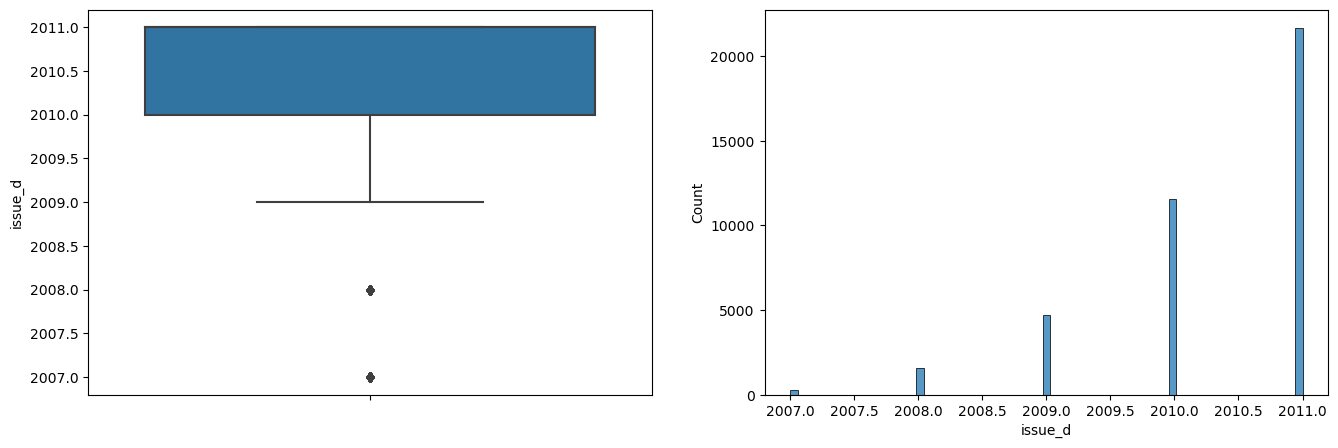

In [95]:
# year wise loan_issue_date
#month wise loan_issue_date

plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=loan['issue_d'].dt.year)

plt.subplot(1, 2, 2)
sns.histplot(x=loan['issue_d'].dt.year)

plt.show()

In [96]:
loan['pymnt_plan'].describe()

count     39717
unique        1
top           n
freq      39717
Name: pymnt_plan, dtype: object

In [97]:
loan['pymnt_plan']

0        n
1        n
2        n
3        n
4        n
        ..
39712    n
39713    n
39714    n
39715    n
39716    n
Name: pymnt_plan, Length: 39717, dtype: object

In [98]:
# Need to exclude payment plan since all customers have same payment plan "n" so it doesn't make any sense
loan = loan.loc[:, ~loan.columns.isin(['pymnt_plan'])]
loan

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ... last_pymnt_d  \
0       36 months   10.65%       162.87     B        B2  ...       Jan-15   
1       60 months   15.27%        59.83     C        C4  ...       Apr-13   
2       36 months   15.96%        84.33     C        C5  ...       Jun-14   
3       36 months   13.49%       339.31     C        C1  ...       Jan-15   
4       60 months   12.69%        67.79     B        B5  ...       May-16   
...           ...      ...          ...   ...       ...  ...          ...   
39712   36 months    8.07%        78.42     A        A4  ...       Jul-10   
39713   36 months   10.28%       275.38     C        C1  ...       Jul-10   
39714   36 months    8.07%       156.84     A        A4  ...       Apr-08   
39715   36 months    7.43%       155.38     A        A2  ...       Jan-08   
39716   36 months   13.75%       255.43     E        E2  ...       Jun-10   

      last_pymnt_amnt last_credit_pull_d  collections_12_mths_ex_med  \
0              171.62             May-16                         0.0   
1              119.66             Sep-13                         0.0   
2              649.91             May-16                         0.0   
3              357.48             Apr-16                         0.0   
4               67.79             May-16                         0.0   
...               ...                ...                         ...   
39712           80.90             Jun-10                         NaN   
39713          281.94             Jul-10                         NaN   
39714            0.00             Jun-07                         NaN   
39715            0.00             Jun-07                         NaN   
39716          256.59             Jun-10                         NaN   

      policy_code application_type acc_now_delinq chargeoff_within_12_mths  \
0               1       INDIVIDUAL              0                      0.0   
1               1       INDIVIDUAL              0                      0.0   
2               1       INDIVIDUAL              0                      0.0   
3               1       INDIVIDUAL              0                      0.0   
4               1       INDIVIDUAL              0                      0.0   
...           ...              ...            ...                      ...   
39712           1       INDIVIDUAL              0                      NaN   
39713           1       INDIVIDUAL              0                      NaN   
39714           1       INDIVIDUAL              0                      NaN   
39715           1       INDIVIDUAL              0                      NaN   
39716           1       INDIVIDUAL              0                      NaN   

      pub_rec_bankruptcies tax_liens  
0                      0.0       0.0  
1                      0.0       0.0  
2                      0.0       0.0  
3                      0.0       0.0  
4                      0.0       0.0  
...                    ...       ...  
39712                  NaN       NaN  
39713                  NaN       NaN  
39714                  NaN       NaN  
39715                  NaN       NaN  
39716          

In [100]:
loan.iloc[:2, 16:30]

loan_status  \
0   Fully Paid   
1  Charged Off   

                                                                url  \
0  https://lendingclub.com/browse/loanDetail.action?loan_id=1077501   
1  https://lendingclub.com/browse/loanDetail.action?loan_id=1077430   

                                                                                                                                                    desc  \
0                                                                           Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>   
1    Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/...   

       purpose     title zip_code addr_state    dti  delinq_2yrs  \
0  credit_card  Computer    860xx         AZ  27.65            0   
1          car      bike    309xx         GA   1.00            0   

  earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  
0           Jan-85               1         3        0      13648  
1           Apr-99               5         3        0       1687

In [116]:
loan['url']

0        https://lendingclub.com/browse/loanDetail.action?loan_id=1077501
1        https://lendingclub.com/browse/loanDetail.action?loan_id=1077430
2        https://lendingclub.com/browse/loanDetail.action?loan_id=1077175
3        https://lendingclub.com/browse/loanDetail.action?loan_id=1076863
4        https://lendingclub.com/browse/loanDetail.action?loan_id=1075358
                                       ...                               
39712      https://lendingclub.com/browse/loanDetail.action?loan_id=92187
39713      https://lendingclub.com/browse/loanDetail.action?loan_id=90665
39714      https://lendingclub.com/browse/loanDetail.action?loan_id=90395
39715      https://lendingclub.com/browse/loanDetail.action?loan_id=90376
39716      https://lendingclub.com/browse/loanDetail.action?loan_id=87023
Name: url, Length: 39717, dtype: object

#####  get loan_id from url

In [129]:
loan['loan_id'] = loan['url'].apply(lambda url: url[-7:].strip())
loan['loan_id'] 

0        1077501
1        1077430
2        1077175
3        1076863
4        1075358
          ...   
39712    d=92187
39713    d=90665
39714    d=90395
39715    d=90376
39716    d=87023
Name: loan_id, Length: 39717, dtype: object

In [135]:
loan['loan_id'].describe()

count       39717
unique      39717
top       1077501
freq            1
Name: loan_id, dtype: object

In [130]:
loan['title'].describe()

count                  39706
unique                 19615
top       Debt Consolidation
freq                    2184
Name: title, dtype: object

In [134]:
loan['zip_code'].head()

0    860xx
1    309xx
2    606xx
3    917xx
4    972xx
Name: zip_code, dtype: object

In [132]:
loan['zip_code'].describe() # zip code is un-ordered categorical variable

count     39717
unique      823
top       100xx
freq        597
Name: zip_code, dtype: object

In [136]:
loan['zip_code'].value_counts()

100xx    597
945xx    545
112xx    516
606xx    503
070xx    473
        ... 
381xx      1
378xx      1
739xx      1
396xx      1
469xx      1
Name: zip_code, Length: 823, dtype: int64

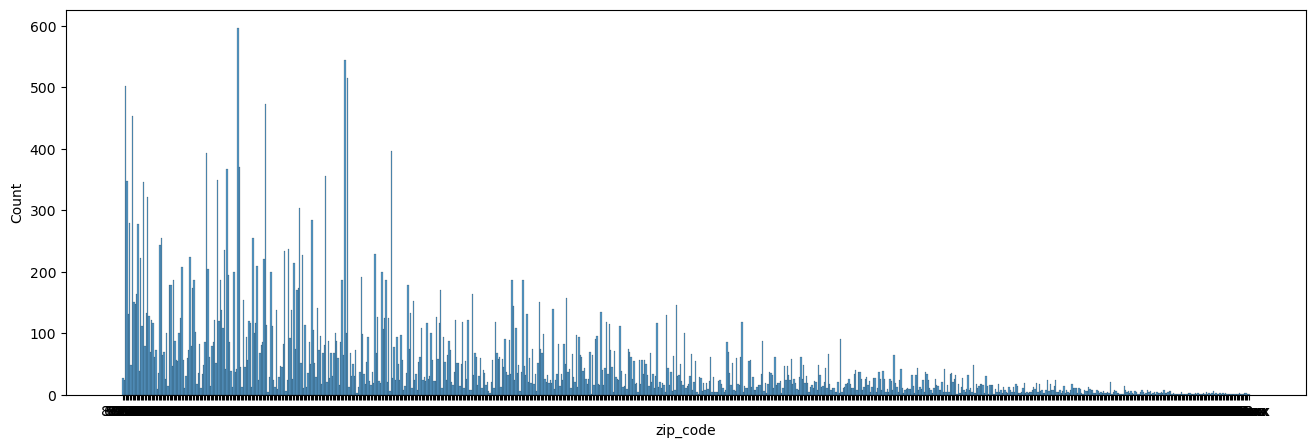

In [141]:
plt.figure(figsize=(16, 5))

sns.histplot(x=loan['zip_code'])
plt.show()

In [138]:
loan['addr_state'].head()

0    AZ
1    GA
2    IL
3    CA
4    OR
Name: addr_state, dtype: object

In [139]:
loan['addr_state'].describe()

count     39717
unique       50
top          CA
freq       7099
Name: addr_state, dtype: object

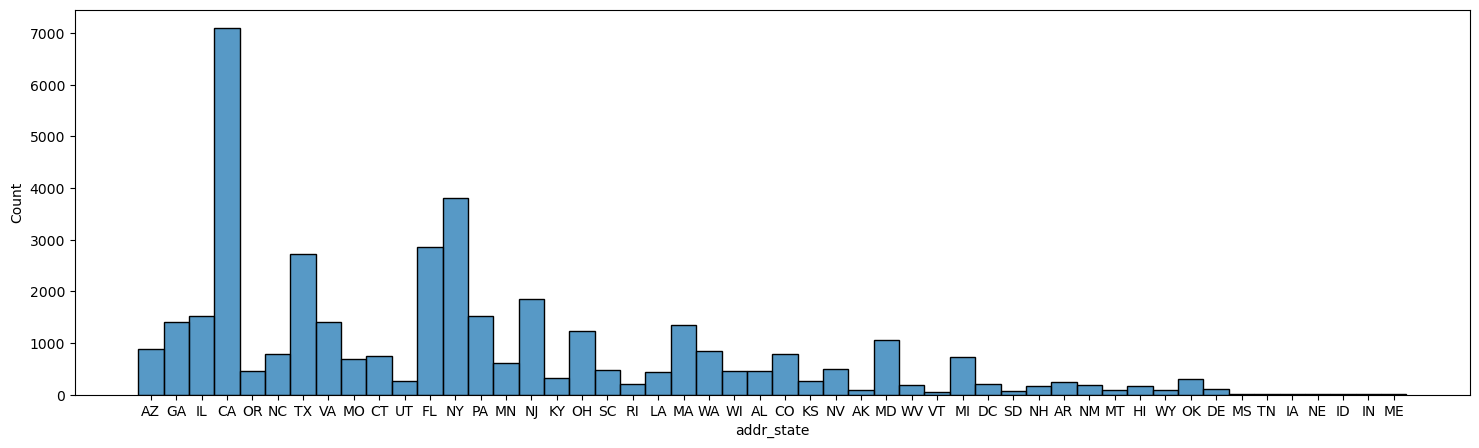

In [143]:
plt.figure(figsize=(18, 5))

sns.histplot(x=loan['addr_state'])
plt.show()

##### Analysing "dti" column

In [144]:
# dti: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, 
# excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

In [145]:
loan['dti'].head()

0    27.65
1     1.00
2     8.72
3    20.00
4    17.94
Name: dti, dtype: float64

In [146]:
loan['dti'].describe()

count    39717.000000
mean        13.315130
std          6.678594
min          0.000000
25%          8.170000
50%         13.400000
75%         18.600000
max         29.990000
Name: dti, dtype: float64

In [147]:
loan['dti'].value_counts()

0.00     183
12.00     51
18.00     45
19.20     40
13.20     39
        ... 
29.13      1
25.31      1
29.76      1
28.42      1
25.43      1
Name: dti, Length: 2868, dtype: int64

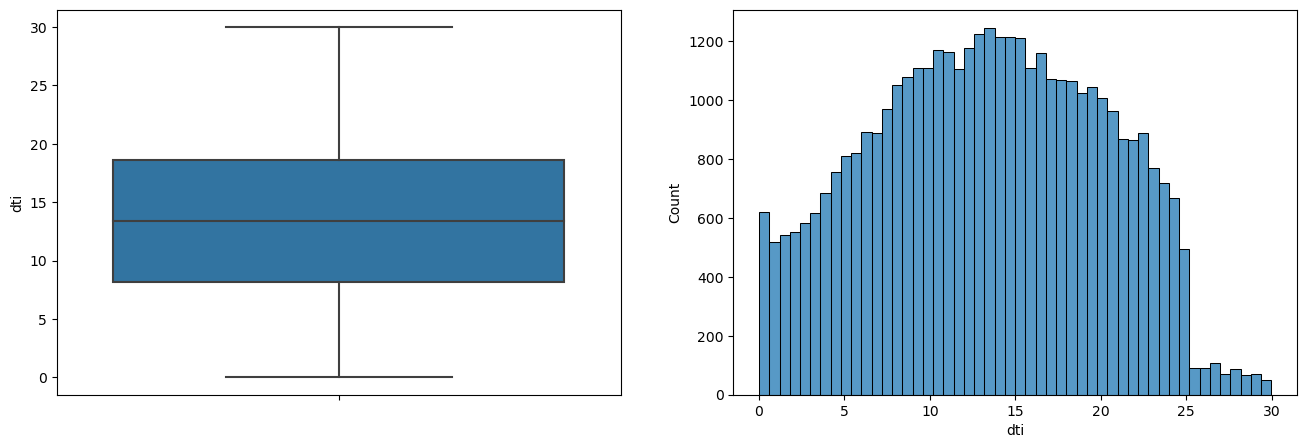

In [150]:
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y='dti', data=loan)

plt.subplot(1, 2, 2)
sns.histplot(x='dti', data=loan)
plt.show()

In [153]:
loan.iloc[:4, 20:45]

title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   

  earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  ...  \
0           Jan-85               1         3        0      13648  ...   
1           Apr-99               5         3        0       1687  ...   
2           Nov-01               2         2        0       2956  ...   
3           Feb-96               1        10        0       5598  ...   

    total_pymnt  total_pymnt_inv total_rec_prncp  total_rec_int  \
0   5863.155187          5833.84         5000.00         863.16   
1   1008.710000          1008.71          456.46         435.17   
2   3005.666844          3005.67         2400.00         605.67   
3  12231.890000         12231.89        10000.00        2214.92   

   total_rec_late_fee  recoveries  collection_recovery_fee  last_pymnt_d  \
0                0.00        0.00                     0.00        Jan-15   
1                0.00      117.08                     1.11        Apr-13   
2                0.00        0.00                     0.00        Jun-14   
3               16.97        0.00                     0.00        Jan-15   

   last_pymnt_amnt  last_credit_pull_d  
0           171.62              May-16  
1           119.66              Sep-13  
2           649.91              May-16  
3           357.48              Apr-16  

[4 rows x 25 columns]

In [159]:
# delinq_2yrs: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

In [157]:
loan['delinq_2yrs'].describe()

count    39717.000000
mean         0.146512
std          0.491812
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64

In [160]:
loan['delinq_2yrs'].value_counts()

0     35405
1      3303
2       687
3       220
4        62
5        22
6        10
7         4
8         2
9         1
11        1
Name: delinq_2yrs, dtype: int64

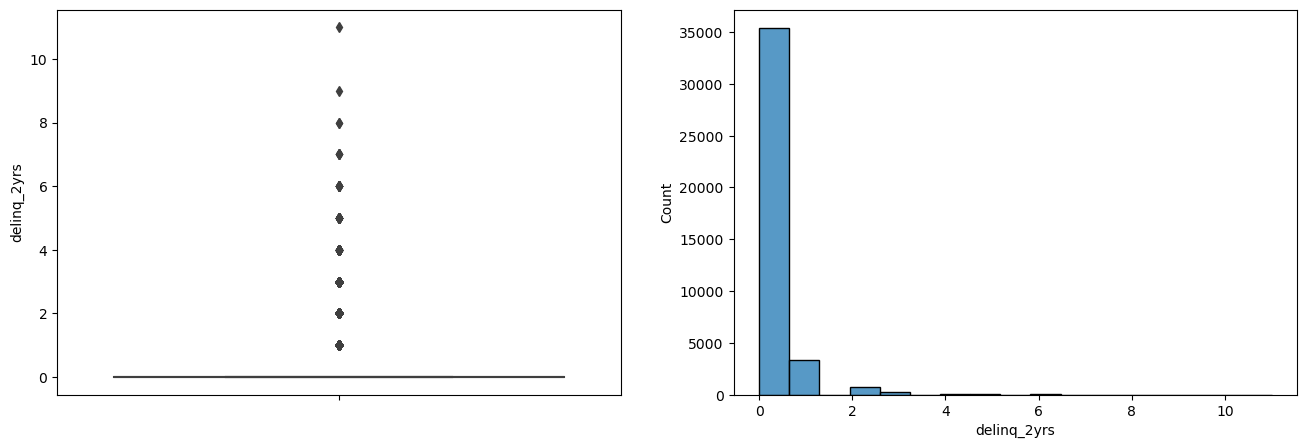

In [164]:
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y='delinq_2yrs', data=loan)

plt.subplot(1, 2, 2)
sns.histplot(x='delinq_2yrs', data=loan)
plt.show()

####  Analysing earliest_cr_line column
###### The month the borrower's earliest reported credit line was opened

In [165]:
loan['earliest_cr_line'].head()

0    Jan-85
1    Apr-99
2    Nov-01
3    Feb-96
4    Jan-96
Name: earliest_cr_line, dtype: object

In [166]:
loan['earliest_cr_line'].describe()

count      39717
unique       526
top       Nov-98
freq         370
Name: earliest_cr_line, dtype: object

In [167]:
loan['earliest_cr_line'].value_counts()

Nov-98    370
Oct-99    366
Dec-98    348
Oct-00    346
Dec-97    329
         ... 
Feb-66      1
Dec-61      1
Oct-54      1
Jun-72      1
Oct-74      1
Name: earliest_cr_line, Length: 526, dtype: int64

In [171]:
loan['earliest_cr_line'] = pd.to_datetime(loan['earliest_cr_line'], format='%b-%y')
loan['earliest_cr_line']

0       1985-01-01
1       1999-04-01
2       2001-11-01
3       1996-02-01
4       1996-01-01
           ...    
39712   1990-11-01
39713   1986-12-01
39714   1998-10-01
39715   1988-11-01
39716   2003-10-01
Name: earliest_cr_line, Length: 39717, dtype: datetime64[ns]

In [172]:
loan['earliest_cr_line'].value_counts()

1998-11-01    370
1999-10-01    366
1998-12-01    348
2000-10-01    346
1997-12-01    329
             ... 
2066-02-01      1
2061-12-01      1
2054-10-01      1
1972-06-01      1
1974-10-01      1
Name: earliest_cr_line, Length: 526, dtype: int64

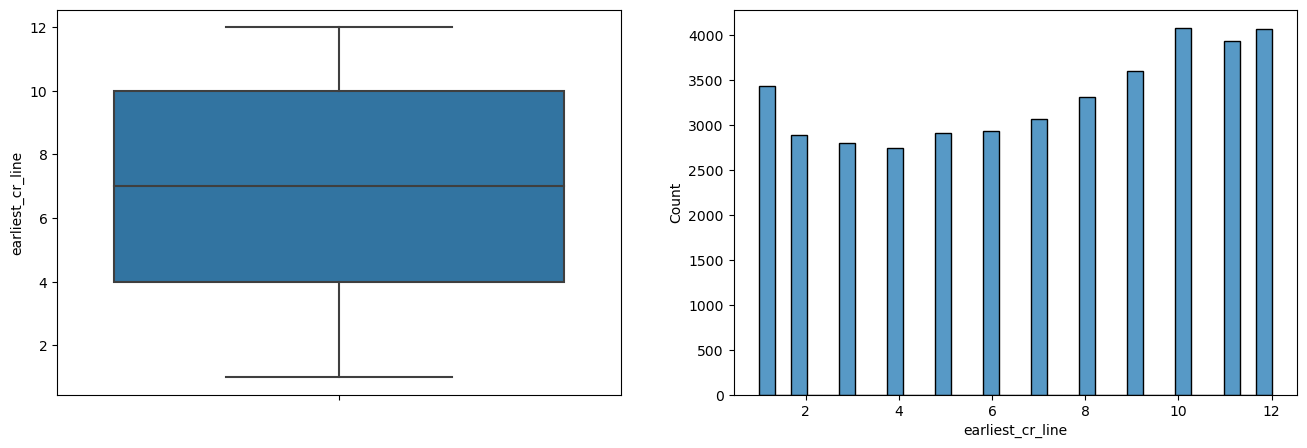

In [173]:
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=loan['earliest_cr_line'].dt.month)

plt.subplot(1, 2, 2)
sns.histplot(x=loan['earliest_cr_line'].dt.month)
plt.show()

In [179]:
earliest_cr_line_year = loan['earliest_cr_line'].dt.year
earliest_cr_line_year.describe()

count    39717.000000
mean      1996.787597
std          7.405085
min       1969.000000
25%       1993.000000
50%       1998.000000
75%       2001.000000
max       2068.000000
Name: earliest_cr_line, dtype: float64

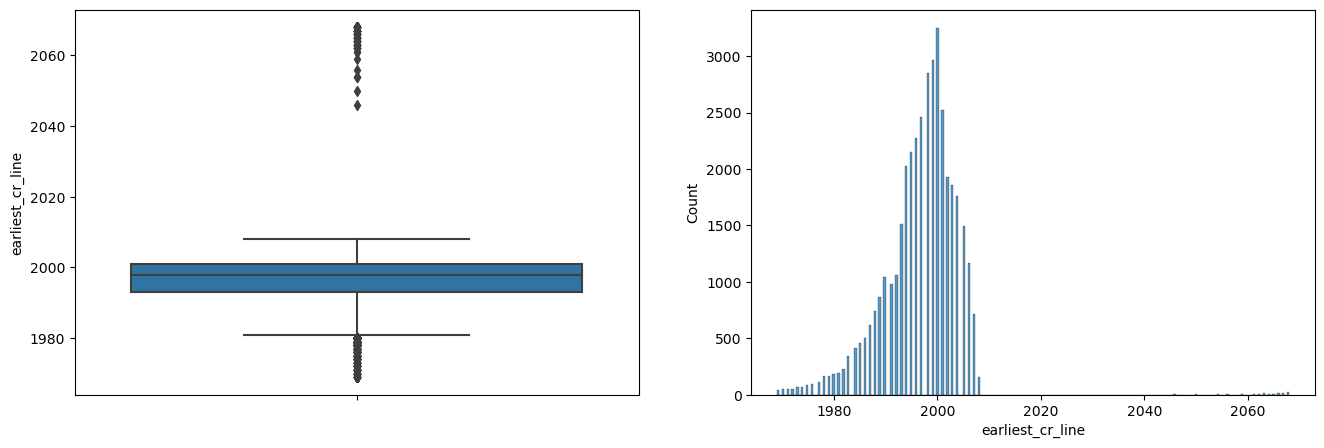

In [177]:
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=loan['earliest_cr_line'].dt.year)

plt.subplot(1, 2, 2)
sns.histplot(x=loan['earliest_cr_line'].dt.year)

plt.show()

In [ ]:
# inq_last_6mths => The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

In [180]:
loan['inq_last_6mths'].describe()

count    39717.000000
mean         0.869200
std          1.070219
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: inq_last_6mths, dtype: float64

In [181]:
loan['inq_last_6mths'].value_counts()

0    19300
1    10971
2     5812
3     3048
4      326
5      146
6       64
7       35
8       15
Name: inq_last_6mths, dtype: int64

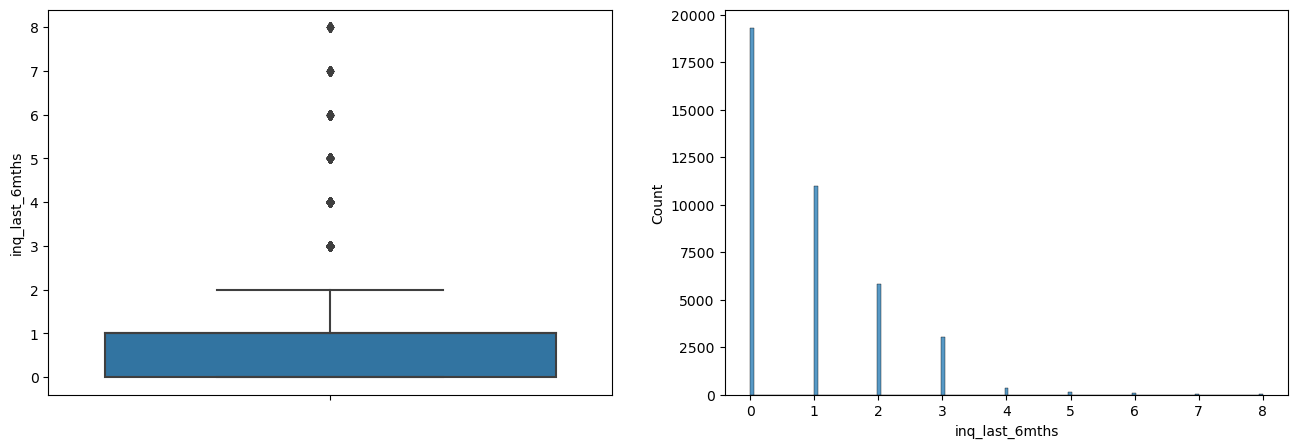

In [182]:
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y='inq_last_6mths', data=loan)

plt.subplot(1, 2, 2)
sns.histplot(x='inq_last_6mths', data=loan)
plt.show()

In [183]:
loan.iloc[:4, 24:45]

delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  \
0            0       1985-01-01               1         3        0      13648   
1            0       1999-04-01               5         3        0       1687   
2            0       2001-11-01               2         2        0       2956   
3            0       1996-02-01               1        10        0       5598   

  revol_util  total_acc initial_list_status  out_prncp  ...   total_pymnt  \
0     83.70%          9                   f        0.0  ...   5863.155187   
1      9.40%          4                   f        0.0  ...   1008.710000   
2     98.50%         10                   f        0.0  ...   3005.666844   
3        21%         37                   f        0.0  ...  12231.890000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16                0.00   
1          1008.71           456.46         435.17                0.00   
2          3005.67          2400.00         605.67                0.00   
3         12231.89         10000.00        2214.92               16.97   

   recoveries  collection_recovery_fee  last_pymnt_d last_pymnt_amnt  \
0        0.00                     0.00        Jan-15          171.62   
1      117.08                     1.11        Apr-13          119.66   
2        0.00                     0.00        Jun-14          649.91   
3        0.00                     0.00        Jan-15          357.48   

   last_credit_pull_d  
0              May-16  
1              Sep-13  
2              May-16  
3              Apr-16  

[4 rows x 21 columns]

In [187]:
# open_acc => The number of open credit lines in the borrower's credit file.
#  credit_line means: A flexible loan from a financial institution that consists of a defined amount of money that you 
# can access as needed

In [188]:
loan['open_acc'].describe()

count    39717.000000
mean         9.294408
std          4.400282
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

In [189]:
loan['open_acc'].value_counts()

7     4018
6     3946
8     3936
9     3718
10    3223
5     3183
11    2746
4     2343
12    2273
13    1911
3     1493
14    1487
15    1177
16     940
17     741
2      605
18     533
19     396
20     289
21     244
22     143
23      97
24      81
25      55
26      34
28      25
27      22
30      15
29      13
31       7
34       5
32       4
35       4
33       3
36       2
39       1
38       1
44       1
41       1
42       1
Name: open_acc, dtype: int64

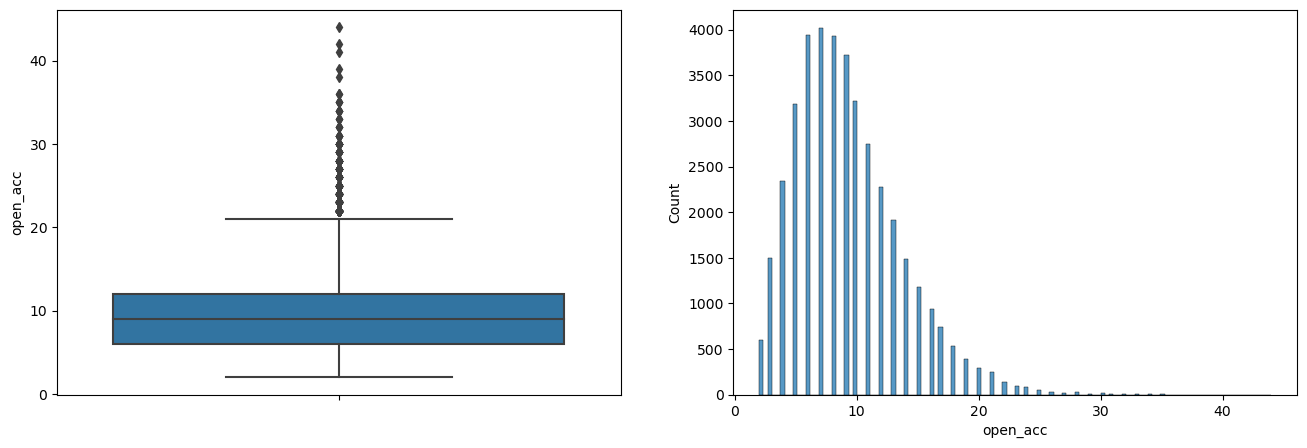

In [190]:
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y='open_acc', data=loan)

plt.subplot(1, 2, 2)
sns.histplot(x='open_acc', data=loan)
plt.show()

In [194]:
# revol_bal => Total credit revolving balance
# With revolving credit, a consumer has a line of credit they can keep using and repaying over and over. The balance
# that carries over from one month to the next is the revolving balance on that loan

In [195]:
loan['revol_bal'].describe()

count     39717.000000
mean      13382.528086
std       15885.016641
min           0.000000
25%        3703.000000
50%        8850.000000
75%       17058.000000
max      149588.000000
Name: revol_bal, dtype: float64

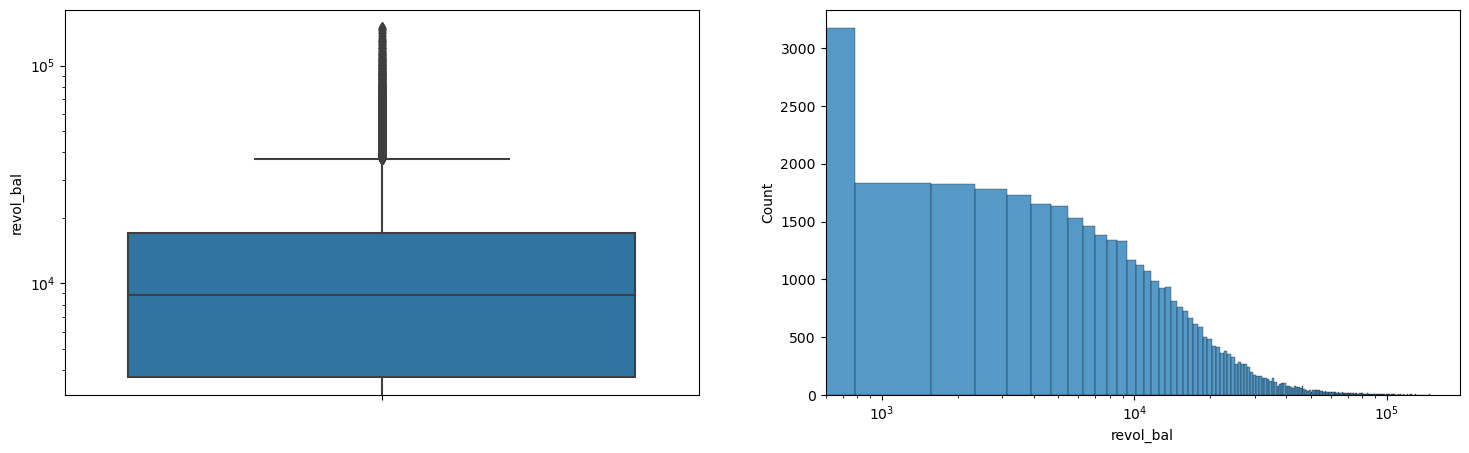

In [199]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y='revol_bal', data=loan)
plt.yscale('log')
plt.subplot(1, 2, 2)
sns.histplot(x='revol_bal', data=loan)
plt.xscale('log')
plt.show()

In [203]:
# revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available 
# revolving credit.

In [201]:
loan['revol_util'].describe()

count     39667
unique     1089
top          0%
freq        977
Name: revol_util, dtype: object

In [202]:
loan['revol_util'].isnull().sum()

50

In [204]:
loan['revol_util'].value_counts()

0%        977
0.20%      63
63%        62
40.70%     58
66.70%     58
         ... 
25.74%      1
47.36%      1
24.65%      1
10.61%      1
7.28%       1
Name: revol_util, Length: 1089, dtype: int64

In [225]:
loan['revol_util'].apply(lambda x: x.str[:-1].strip())

AttributeError: 'str' object has no attribute 'str'

In [221]:
loan['revol_util']

0        83.70%
1         9.40%
2        98.50%
3           21%
4        53.90%
          ...  
39712    13.10%
39713    26.90%
39714    19.40%
39715     0.70%
39716    51.50%
Name: revol_util, Length: 39717, dtype: object

In [235]:
# Use replace insted of sub-indexing. As many times code runs sub-indexing trimming the string
#loan['revol_util'] = loan['revol_util'].str[:-1] 
loan['revol_util'] = loan['revol_util'].str.replace('%', '')
loan['revol_util']

0        83.
1         9.
2        98.
3           
4        53.
        ... 
39712    13.
39713    26.
39714    19.
39715     0.
39716    51.
Name: revol_util, Length: 39717, dtype: object

In [241]:
# loan['revol_util']= loan['revol_util'].astype(np.float32)
revol_util_most_frequent_value = loan['revol_util'].mode()
revol_util_most_frequent_value

0    
Name: revol_util, dtype: object

In [256]:
loan.fillna(value={'revol_util': revol_util_most_frequent_value}, inplace=True)

In [284]:
loan['revol_util'].isnull().sum()

50

In [283]:
loan[loan['revol_util'] == ''].iloc[:, 25:40].isnull().sum()

earliest_cr_line       0
inq_last_6mths         0
open_acc               0
pub_rec                0
revol_bal              0
revol_util             0
total_acc              0
initial_list_status    0
out_prncp              0
out_prncp_inv          0
total_pymnt            0
total_pymnt_inv        0
total_rec_prncp        0
total_rec_int          0
total_rec_late_fee     0
dtype: int64

In [238]:
loan['revol_util']

0        83.
1         9.
2        98.
3           
4        53.
        ... 
39712    13.
39713    26.
39714    19.
39715     0.
39716    51.
Name: revol_util, Length: 39717, dtype: object

In [285]:
loan33= pd.read_csv("./loan/loan.csv")

C:\Users\window 10\AppData\Local\Temp\ipykernel_1276\1591890912.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan33= pd.read_csv("./loan/loan.csv")


In [286]:
loan33['revol_util']

0        83.70%
1         9.40%
2        98.50%
3           21%
4        53.90%
          ...  
39712    13.10%
39713    26.90%
39714    19.40%
39715     0.70%
39716    51.50%
Name: revol_util, Length: 39717, dtype: object

In [290]:
loan33[loan33['revol_util'] == ''].iloc[:, 25:40]

Empty DataFrame
Columns: [delinq_2yrs, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv]
Index: []

In [293]:
loan33['revol_util'] = loan33['revol_util'].str.replace('%', '')
loan33['revol_util']

0        83.70
1         9.40
2        98.50
3           21
4        53.90
         ...  
39712    13.10
39713    26.90
39714    19.40
39715     0.70
39716    51.50
Name: revol_util, Length: 39717, dtype: object

In [294]:
loan33[loan33['revol_util'] == ''].iloc[:, 25:40]

Empty DataFrame
Columns: [delinq_2yrs, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv]
Index: []

In [295]:
loan['revol_util'] = loan33['revol_util']
loan['revol_util'] 

0        83.70
1         9.40
2        98.50
3           21
4        53.90
         ...  
39712    13.10
39713    26.90
39714    19.40
39715     0.70
39716    51.50
Name: revol_util, Length: 39717, dtype: object

In [299]:
loan[loan['revol_util'] ==  np.nan].iloc[:, 25:40]

Empty DataFrame
Columns: [earliest_cr_line, inq_last_6mths, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee]
Index: []

In [300]:
loan['revol_util'].isnull().sum()

50

In [301]:
loan.fillna(value={'revol_util': revol_util_most_frequent_value}, inplace=True)

In [302]:
loan['revol_util'].isnull().sum()

50

In [306]:
loan['revol_util']= round(loan['revol_util'].astype(np.float32), 2)


In [308]:
loan['revol_util'].describe()

count    39667.000000
mean        48.832287
std         28.332520
min          0.000000
25%         25.400000
50%         49.299999
75%         72.400002
max         99.900002
Name: revol_util, dtype: float64

In [309]:
loan['revol_util'].isnull().sum()

50

In [312]:
revol_util_most_frequent_value

0    
Name: revol_util, dtype: object

In [313]:
loan.fillna(value={'revol_util': 0}, inplace=True)

In [314]:
loan['revol_util'].isnull().sum()

0

In [316]:
loan['revol_util'].describe()

count    39717.000000
mean        48.770677
std         28.367689
min          0.000000
25%         25.299999
50%         49.200001
75%         72.300003
max         99.900002
Name: revol_util, dtype: float64

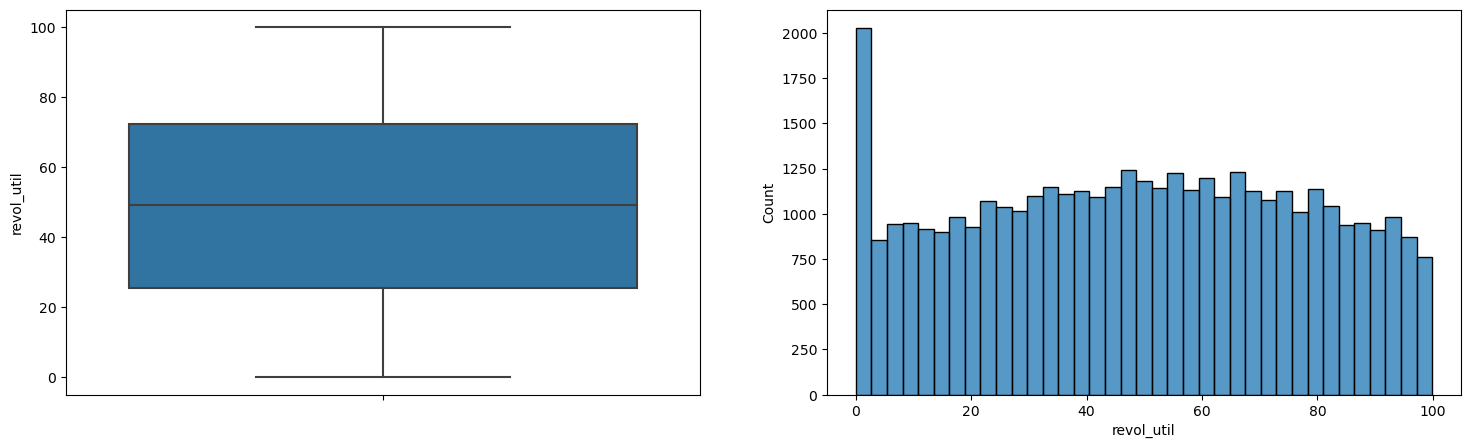

In [315]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y='revol_util', data=loan)

plt.subplot(1, 2, 2)
sns.histplot(x='revol_util', data=loan)

plt.show()

In [317]:
loan.iloc[:2, 25: 45]

earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  \
0       1985-01-01               1         3        0      13648   83.699997   
1       1999-04-01               5         3        0       1687    9.400000   

   total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
0          9                   f        0.0            0.0  5863.155187   
1          4                   f        0.0            0.0  1008.710000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16                 0.0   
1          1008.71           456.46         435.17                 0.0   

   recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
0        0.00                     0.00       Jan-15           171.62   
1      117.08                     1.11       Apr-13           119.66   

  last_credit_pull_d  
0             May-16  
1             Sep-13

In [319]:
# total_acc: The total number of credit lines currently in the borrower's credit file

In [322]:
loan['total_acc'].describe()

count    39717.000000
mean        22.088828
std         11.401709
min          2.000000
25%         13.000000
50%         20.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64

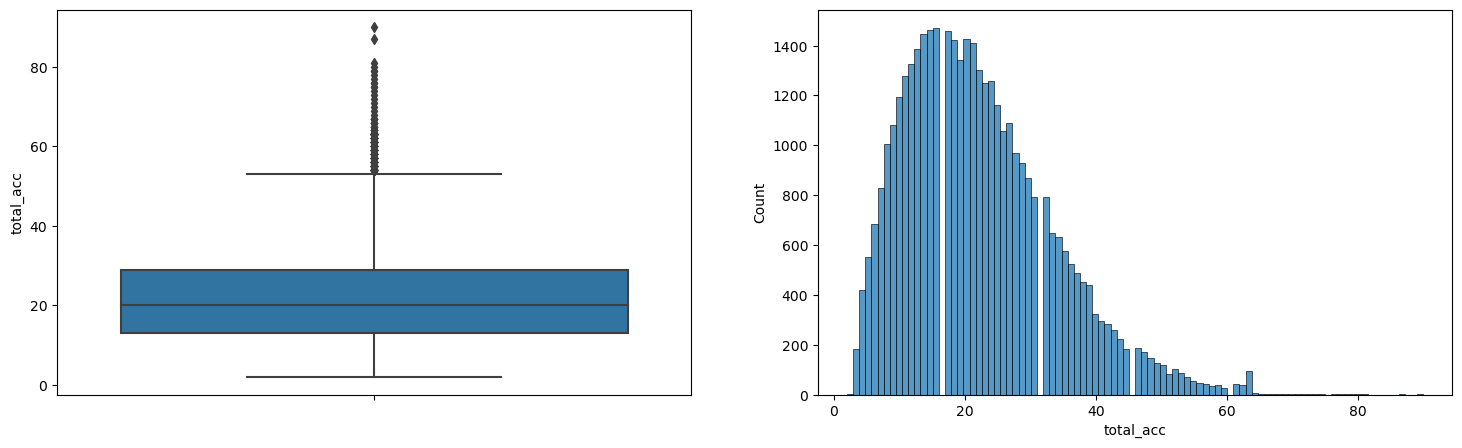

In [323]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y='total_acc', data=loan)

plt.subplot(1, 2, 2)
sns.histplot(x='total_acc', data=loan)

plt.show()

In [358]:
_bins = [num for num in np.arange(0, 91, 1)]

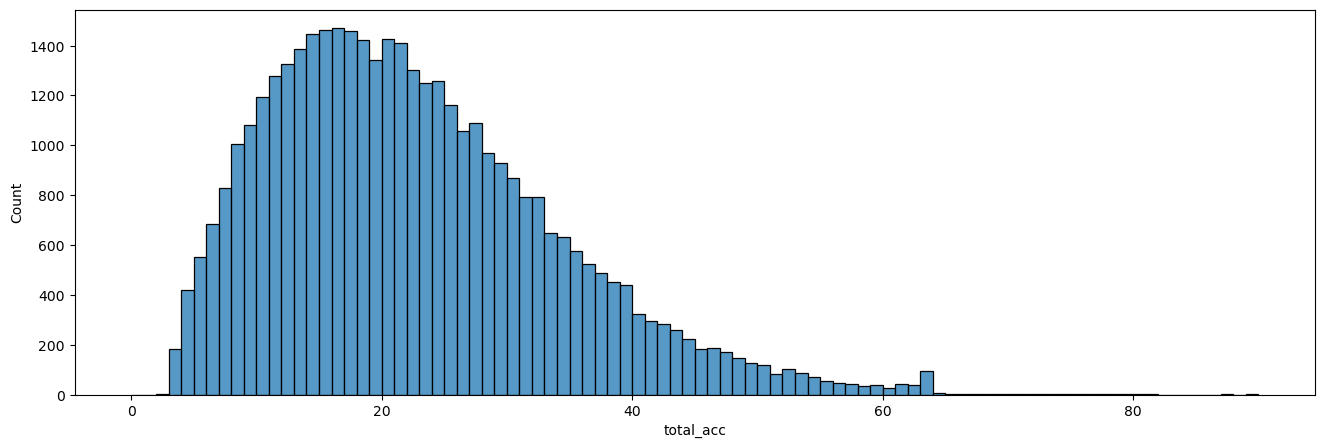

In [359]:
plt.figure(figsize=(16, 5))
sns.histplot(x='total_acc', data=loan, bins=_bins)
plt.show()

In [360]:
yy = pd.DataFrame(data= {'count': loan['total_acc'].value_counts(), 'total_acc_colmn': loan['total_acc'].value_counts().index})
yy.sort_values(by='total_acc_colmn', ascending=True).head(40)

count  total_acc_colmn
2       4                2
3     182                3
4     420                4
5     552                5
6     683                6
7     828                7
8    1006                8
9    1080                9
10   1193               10
11   1278               11
12   1325               12
13   1385               13
14   1445               14
15   1462               15
16   1471               16
17   1457               17
18   1422               18
19   1341               19
20   1428               20
21   1412               21
22   1302               22
23   1252               23
24   1259               24
25   1160               25
26   1058               26
27   1088               27
28    971               28
29    931               29
30    870               30
31    793               31
32    794               32
33    647               33
34    632               34
35    575               35
36    523               36
37    487               37
38    452               38
39    440               39
40    322               40
41    294               41

In [362]:
# initial_list_status=> The initial listing status of the loan. Possible values are – W, F

In [363]:
loan['initial_list_status'].describe()

count     39717
unique        1
top           f
freq      39717
Name: initial_list_status, dtype: object

In [366]:
# there is only one value for "initial_list_status" column so it doesn't make any sense, So I will remvoe this column later

In [368]:
# out_prncp: Remaining outstanding principal for total amount funded

loan['out_prncp'].describe()

count    39717.000000
mean        51.227887
std        375.172839
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       6311.470000
Name: out_prncp, dtype: float64

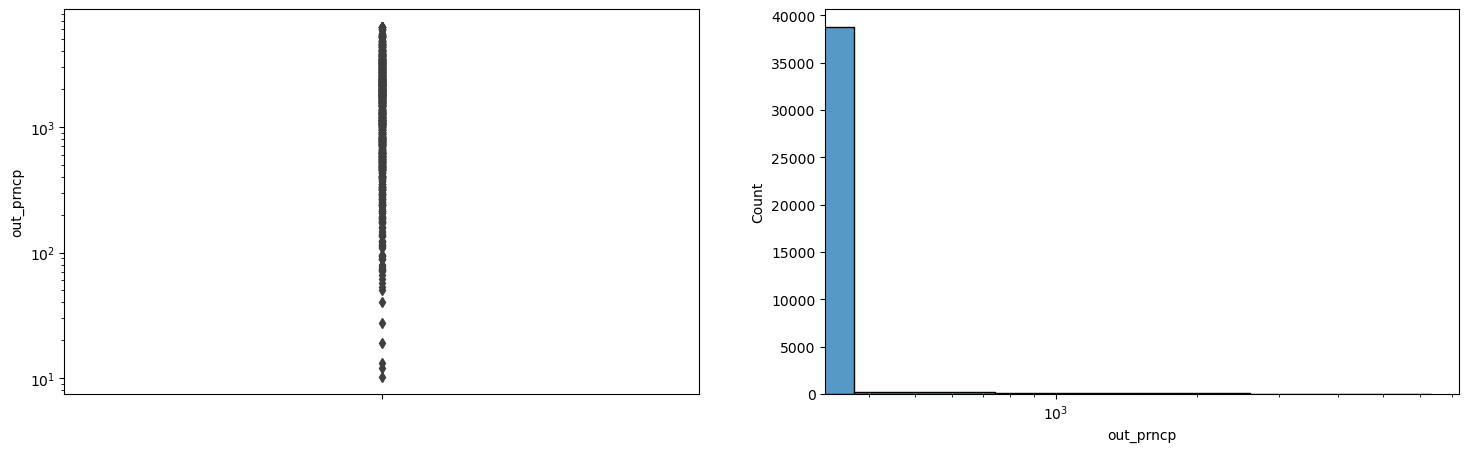

In [371]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y='out_prncp', data=loan)
plt.yscale('log')

plt.subplot(1, 2, 2)
sns.histplot(x='out_prncp', data=loan)
plt.xscale('log')

plt.show()

In [445]:
# out_prncp: Remaining outstanding principal for total amount funded
op_values_nonzero_by_vc = pd.DataFrame(loan['out_prncp'].value_counts().index).iloc[1:, :].sort_values(by=0)
op_values_nonzero_by_vc

0
379     10.26
386     11.91
377     13.28
378     19.12
470     27.41
...       ...
693   6219.16
596   6307.15
601   6307.37
673   6308.37
1032  6311.47

[1136 rows x 1 columns]

In [436]:
op = [op for op in loan['out_prncp'].value_counts()]
len(op)

1137

In [449]:
op_values_nonzero_by_bool_series = pd.DataFrame(loan[loan['out_prncp'] > 0])['out_prncp'].sort_values()
op_values_nonzero_by_bool_series

15981      10.26
15541      11.91
16609      13.28
16361      19.12
11173      27.41
          ...   
2836     6219.16
2502     6307.15
2473     6307.37
3258     6308.37
3806     6311.47
Name: out_prncp, Length: 1140, dtype: float64

In [423]:
38577+1137

39714

In [384]:
loan['out_prncp'].isnull().sum()

0

In [446]:
op_df = pd.DataFrame(loan['out_prncp'].value_counts().index).iloc[1:,:]
op_df.sort_values(by=0)

0
379     10.26
386     11.91
377     13.28
378     19.12
470     27.41
...       ...
693   6219.16
596   6307.15
601   6307.37
673   6308.37
1032  6311.47

[1136 rows x 1 columns]

In [408]:
test

0          0.00
1          0.00
2          0.00
3          0.00
4        524.06
          ...  
39712      0.00
39713      0.00
39714      0.00
39715      0.00
39716      0.00
Name: out_prncp, Length: 39717, dtype: float64

In [395]:
len(loan.index)

39717

In [450]:
op_values_nonzero_by_vc.count()

0    1136
dtype: int64

In [451]:
op_values_nonzero_by_bool_series.count()

1140

In [453]:
[i[0].replace(k, header_replace[k]) for k in header_replace for i in cursor.description if k in i[0]]

NameError: name 'header_replace' is not defined

In [483]:
op_values_nonzero_by_vc[0]

379       10.26
386       11.91
377       13.28
378       19.12
470       27.41
         ...   
693     6219.16
596     6307.15
601     6307.37
673     6308.37
1032    6311.47
Name: 0, Length: 1136, dtype: float64

In [484]:
op_values_nonzero_by_bool_series

15981      10.26
15541      11.91
16609      13.28
16361      19.12
11173      27.41
          ...   
2836     6219.16
2502     6307.15
2473     6307.37
3258     6308.37
3806     6311.47
Name: out_prncp, Length: 1140, dtype: float64

In [481]:
ts = [value2-value1 for value1 in op_values_nonzero_by_vc[0] for value2 in op_values_nonzero_by_bool_series ]
ts

[0.0,
 1.6500000000000004,
 3.0199999999999996,
 8.860000000000001,
 17.15,
 30.39,
 40.2,
 42.74,
 47.410000000000004,
 51.260000000000005,
 55.57,
 60.830000000000005,
 61.57,
 61.85,
 61.92000000000001,
 63.98,
 64.14999999999999,
 66.92,
 68.97999999999999,
 69.92999999999999,
 78.13,
 78.25999999999999,
 78.28,
 82.97999999999999,
 83.96,
 84.96,
 86.11999999999999,
 98.25999999999999,
 101.0,
 101.63,
 102.02,
 103.69999999999999,
 106.42999999999999,
 110.08999999999999,
 112.89999999999999,
 114.08999999999999,
 114.16,
 124.3,
 126.14999999999999,
 128.06,
 128.29000000000002,
 129.69,
 134.83,
 137.88,
 146.59,
 149.67000000000002,
 150.58,
 160.44,
 160.98000000000002,
 163.69,
 164.43,
 164.73000000000002,
 167.97,
 168.78,
 174.22,
 174.93,
 177.34,
 179.11,
 179.34,
 181.21,
 182.27,
 185.73000000000002,
 196.31,
 197.3,
 197.86,
 198.37,
 202.99,
 203.52,
 204.44,
 207.79000000000002,
 210.08,
 213.83,
 218.23000000000002,
 223.43,
 227.5,
 228.20000000000002,
 228.27,
 

In [482]:
len(ts)

1295040

In [469]:
op_values_nonzero_by_vc[0]

379       10.26
386       11.91
377       13.28
378       19.12
470       27.41
         ...   
693     6219.16
596     6307.15
601     6307.37
673     6308.37
1032    6311.47
Name: 0, Length: 1136, dtype: float64

In [474]:
op_values_nonzero_by_bool_series

15981      10.26
15541      11.91
16609      13.28
16361      19.12
11173      27.41
          ...   
2836     6219.16
2502     6307.15
2473     6307.37
3258     6308.37
3806     6311.47
Name: out_prncp, Length: 1140, dtype: float64

In [ ]:
[i[0].replace(k, header_replace[k]) for k in header_replace for i in cursor.description if k in i[0]]

In [492]:
print(type(op_values_nonzero_by_bool_series.values))
print()
print(len(op_values_nonzero_by_bool_series.values))

<class 'numpy.ndarray'>

1140


In [493]:
op_values_nonzero_by_bool_series.values

array([  10.26,   11.91,   13.28, ..., 6307.37, 6308.37, 6311.47])

In [494]:
print(type(op_values_nonzero_by_vc[0].values))
print()
print(len(op_values_nonzero_by_vc[0].values))

<class 'numpy.ndarray'>

1136


In [495]:
op_values_nonzero_by_vc[0].values

array([  10.26,   11.91,   13.28, ..., 6307.37, 6308.37, 6311.47])

In [505]:
test = [True for value1 in op_values_nonzero_by_vc[0].values for value2 in op_values_nonzero_by_bool_series.values if value1-value2!=0]
test

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,

In [506]:
len(test)

1293900

In [ ]:
op_values_nonzero_by_bool_series.values

In [507]:
z = op_values_nonzero_by_bool_series.values.difference(op_values_nonzero_by_vc[0].values)
z

AttributeError: 'numpy.ndarray' object has no attribute 'difference'

In [508]:
op_values_nonzero_by_bool_series_set = np.unique(op_values_nonzero_by_bool_series.values)
op_values_nonzero_by_bool_series_set

array([  10.26,   11.91,   13.28, ..., 6307.37, 6308.37, 6311.47])

In [510]:
op_values_nonzero_by_vc_set = np.unique(op_values_nonzero_by_vc[0].values)
op_values_nonzero_by_vc_set

array([  10.26,   11.91,   13.28, ..., 6307.37, 6308.37, 6311.47])

In [524]:
newarr2 = np.setdiff1d(op_values_nonzero_by_bool_series.values, op_values_nonzero_by_vc[0].values)
print(newarr2)

[]


In [525]:
newarr3 = np.setdiff1d(op_values_nonzero_by_vc[0].values, op_values_nonzero_by_bool_series.values)
print(newarr3)

[]


In [514]:
newarr = np.setdiff1d(op_values_nonzero_by_vc_set, op_values_nonzero_by_bool_series_set, assume_unique=True)
print(newarr)

[]


In [515]:
len(op_values_nonzero_by_bool_series_set)

1136

In [516]:
len(op_values_nonzero_by_vc_set)

1136

In [519]:
len(op_values_nonzero_by_bool_series.values)

1140

In [520]:
len(op_values_nonzero_by_vc[0].values)

1136

In [526]:
arr1 = op_values_nonzero_by_bool_series.values
arr2=op_values_nonzero_by_vc[0].values

In [527]:
print(len(arr1))
print(len(arr2))

1140
1136


In [530]:
newarr4 = np.intersect1d(arr1, arr2, assume_unique=False)
newarr4

array([  10.26,   11.91,   13.28, ..., 6307.37, 6308.37, 6311.47])

In [531]:
len(newarr4)

1136

In [532]:
newarr5 = np.setdiff1d(arr1, arr2)
print(newarr5)

[]


In [533]:
newarr5 = np.setdiff1d(arr2, arr1)
print(newarr5)

[]


In [534]:
print(len(arr1))
print(len(arr2))

1140
1136


In [535]:
arr1.value_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [540]:
loan.iloc[:2, 33:50]

out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0        0.0            0.0  5863.155187          5833.84          5000.00   
1        0.0            0.0  1008.710000          1008.71           456.46   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         863.16                 0.0        0.00                     0.00   
1         435.17                 0.0      117.08                     1.11   

  last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
0       Jan-15           171.62             May-16   
1       Apr-13           119.66             Sep-13   

   collections_12_mths_ex_med  policy_code application_type  acc_now_delinq  \
0                         0.0            1       INDIVIDUAL               0   
1                         0.0            1       INDIVIDUAL               0   

   chargeoff_within_12_mths  
0                       0.0  
1                       0.0

In [546]:
loan[loan['out_prncp'] !=0][['loan_status']].value_counts()

loan_status
Current        1140
dtype: int64

In [547]:
loan['out_prncp_inv'].describe()

count    39717.000000
mean        50.989768
std        373.824457
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       6307.370000
Name: out_prncp_inv, dtype: float64

In [548]:
loan['out_prncp_inv'].value_counts()

0.00       38577
1972.60        2
1664.64        2
827.13         2
1863.21        1
           ...  
782.23         1
2289.14        1
1928.85        1
1061.32        1
79.24          1
Name: out_prncp_inv, Length: 1138, dtype: int64

In [552]:
# total_pymnt: Payments received to date for total amount funded

In [553]:
loan['total_pymnt'].describe()

count    39717.000000
mean     12153.596544
std       9042.040766
min          0.000000
25%       5576.930000
50%       9899.640319
75%      16534.433040
max      58563.679930
Name: total_pymnt, dtype: float64

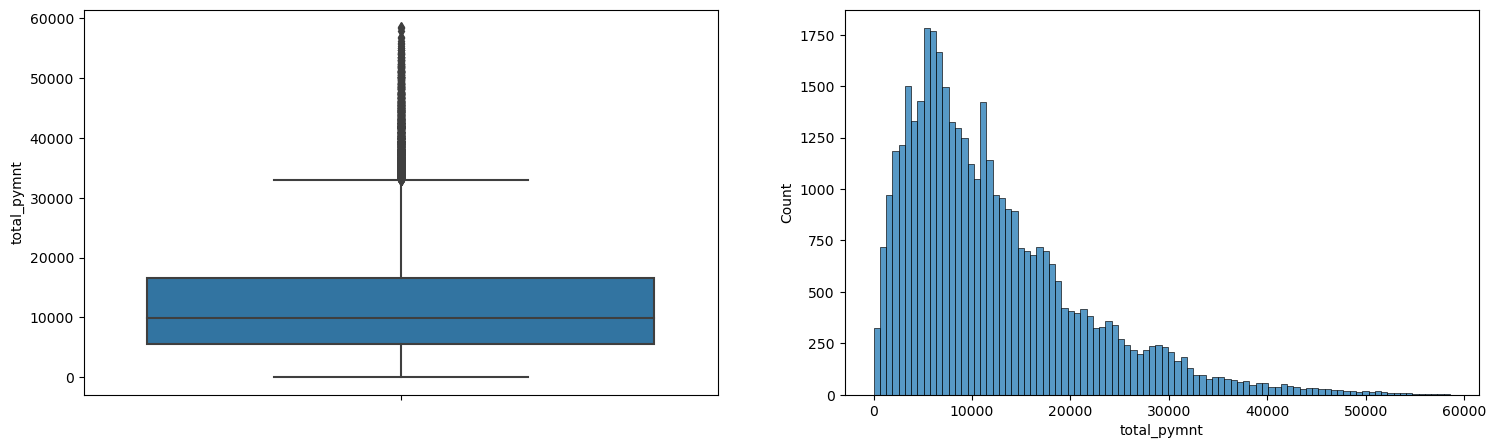

In [554]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y='total_pymnt', data=loan)

plt.subplot(1, 2, 2)
sns.histplot(x='total_pymnt', data=loan)

plt.show()

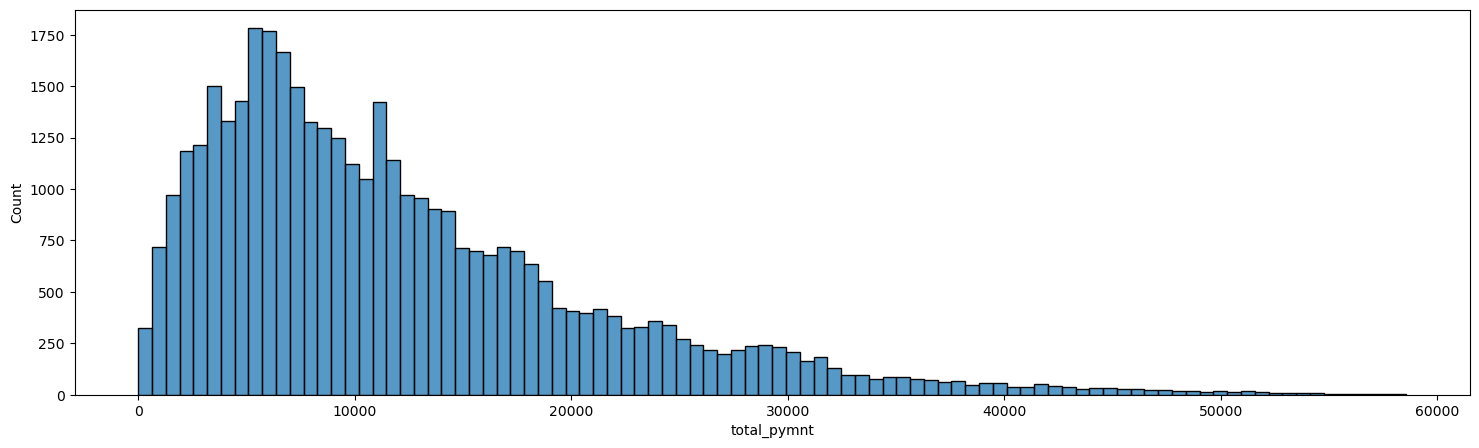

In [556]:
plt.figure(figsize=(18, 5))

sns.histplot(x='total_pymnt', data=loan)

plt.show()

In [557]:
loan['total_pymnt_inv'].describe()

count    39717.000000
mean     11567.149118
std       8942.672613
min          0.000000
25%       5112.310000
50%       9287.150000
75%      15798.810000
max      58563.680000
Name: total_pymnt_inv, dtype: float64

In [560]:
#total_rec_prncp: Principal received to date

In [561]:
loan['total_rec_prncp'].describe()

count    39717.000000
mean      9793.348813
std       7065.522127
min          0.000000
25%       4600.000000
50%       8000.000000
75%      13653.260000
max      35000.020000
Name: total_rec_prncp, dtype: float64

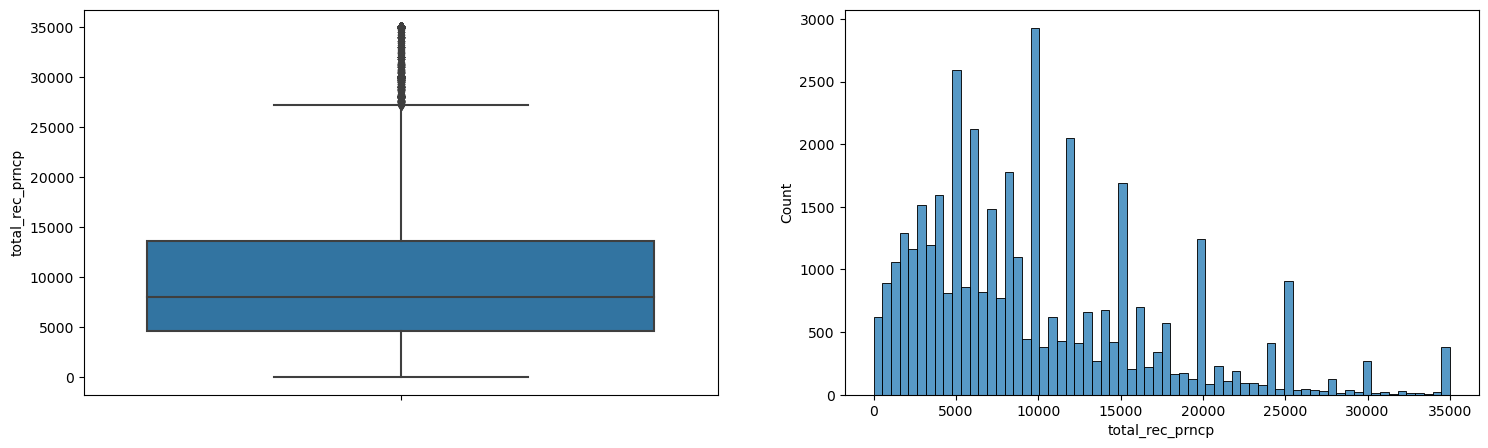

In [562]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y='total_rec_prncp', data=loan)

plt.subplot(1, 2, 2)
sns.histplot(x='total_rec_prncp', data=loan)

plt.show()

In [566]:
# total_rec_int: Interest received to date
loan['total_rec_int'].describe()

count    39717.000000
mean      2263.663172
std       2608.111964
min          0.000000
25%        662.180000
50%       1348.910000
75%       2833.400000
max      23563.680000
Name: total_rec_int, dtype: float64

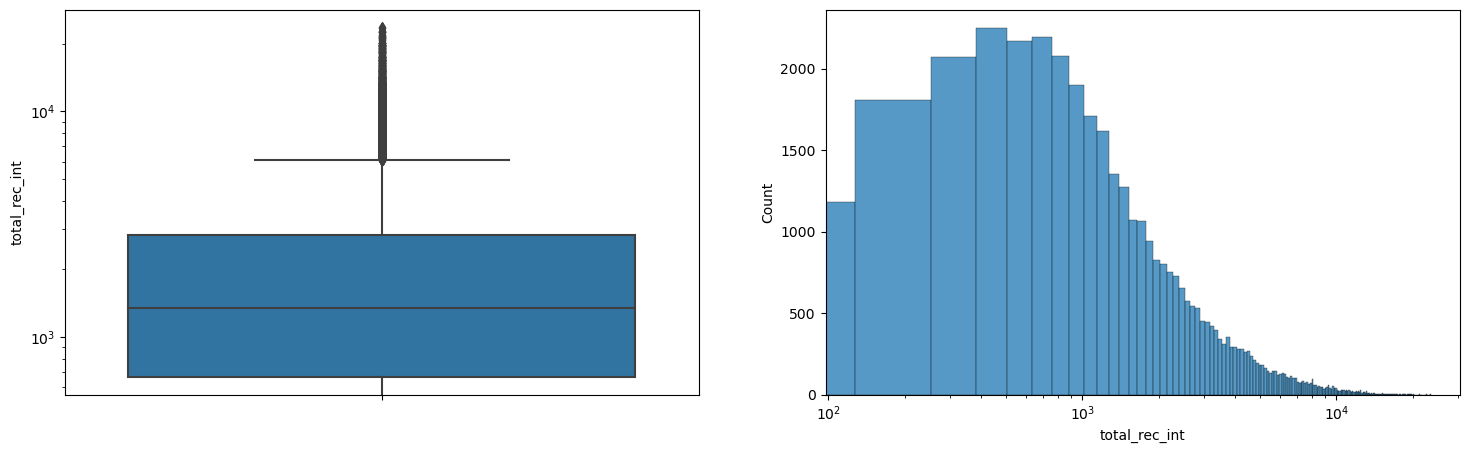

In [567]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y='total_rec_int', data=loan)
plt.yscale('log')

plt.subplot(1, 2, 2)
sns.histplot(x='total_rec_int', data=loan)
plt.xscale('log')

plt.show()

In [568]:
loan['total_rec_int'].isnull().sum()

0

In [570]:
#total_rec_late_fee: Late fees received to date

loan['total_rec_late_fee'].describe()

count    39717.000000
mean         1.363015
std          7.289979
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        180.200000
Name: total_rec_late_fee, dtype: float64

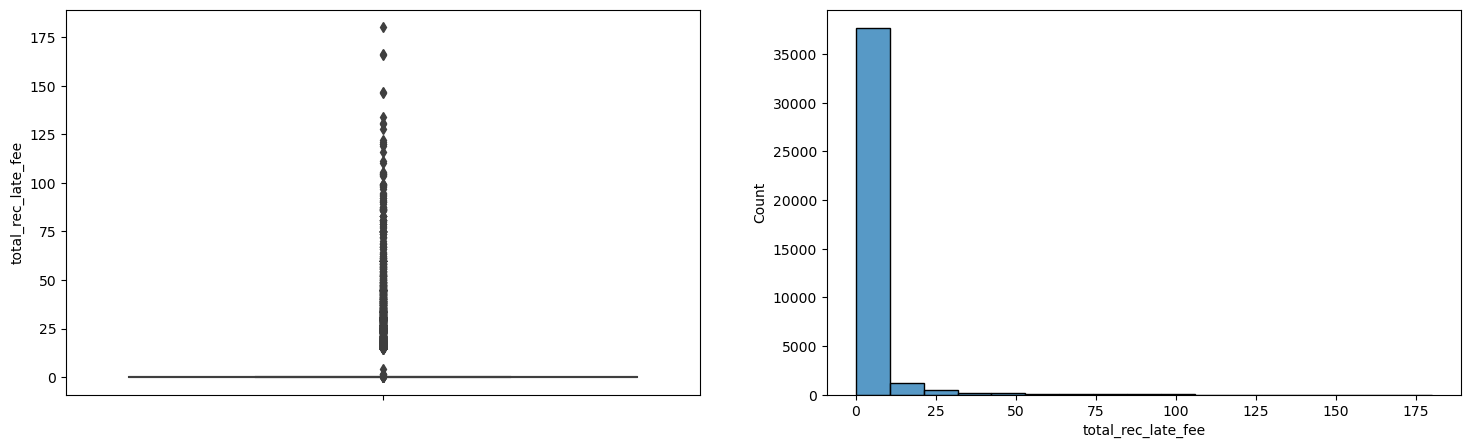

In [572]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y='total_rec_late_fee', data=loan)


plt.subplot(1, 2, 2)
sns.histplot(x='total_rec_late_fee', data=loan)

plt.show()

In [575]:
loan.iloc[:2, 39:54]

total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  \
0                 0.0        0.00                     0.00       Jan-15   
1                 0.0      117.08                     1.11       Apr-13   

   last_pymnt_amnt last_credit_pull_d  collections_12_mths_ex_med  \
0           171.62             May-16                         0.0   
1           119.66             Sep-13                         0.0   

   policy_code application_type  acc_now_delinq  chargeoff_within_12_mths  \
0            1       INDIVIDUAL               0                       0.0   
1            1       INDIVIDUAL               0                       0.0   

   pub_rec_bankruptcies  tax_liens  loan_id  
0                   0.0        0.0  1077501  
1                   0.0        0.0  1077430

In [577]:
# recoveries: Post charge off/Default gross recovery
loan['recoveries'].describe()

count    39717.000000
mean        95.221624
std        688.744771
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      29623.350000
Name: recoveries, dtype: float64

In [584]:
loan['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [588]:
loan[~loan['loan_status'].isin(['Fully Paid', 'Current'])][['loan_status', 'recoveries']].value_counts()

loan_status  recoveries
Charged Off  0.00          1409
             10.40            4
             11.29            4
             14.61            3
             13.93            3
                           ... 
             206.01           1
             206.08           1
             206.50           1
             206.55           1
             29623.35         1
Length: 4040, dtype: int64

In [589]:
# 29623.35 is highest recovery amount post defaultee

In [592]:
# collection_recovery_fee: Post charge off/Default collection fee
loan['collection_recovery_fee'].describe()

count    39717.000000
mean        12.406112
std        148.671593
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       7002.190000
Name: collection_recovery_fee, dtype: float64

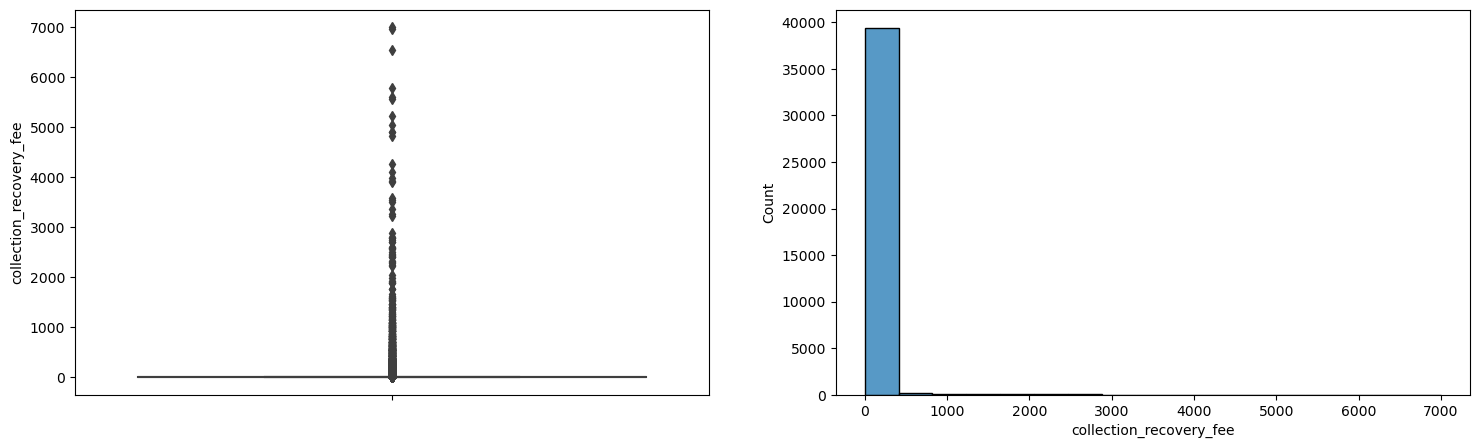

In [594]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y='collection_recovery_fee', data=loan)

plt.subplot(1, 2, 2)
sns.histplot(x='collection_recovery_fee', data=loan)

plt.show()

In [595]:
loan['last_pymnt_d'].describe()

count      39646
unique       101
top       May-16
freq        1256
Name: last_pymnt_d, dtype: object

In [596]:
loan['last_pymnt_d'].head(5)

0    Jan-15
1    Apr-13
2    Jun-14
3    Jan-15
4    May-16
Name: last_pymnt_d, dtype: object

In [598]:
loan['last_pymnt_d'] = pd.to_datetime(loan['last_pymnt_d'], format='%b-%y')
loan['last_pymnt_d'].head()

0   2015-01-01
1   2013-04-01
2   2014-06-01
3   2015-01-01
4   2016-05-01
Name: last_pymnt_d, dtype: datetime64[ns]

In [599]:
loan['last_pymnt_d'].describe()

C:\Users\window 10\AppData\Local\Temp\ipykernel_1276\1806906065.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  loan['last_pymnt_d'].describe()


count                   39646
unique                    101
top       2016-05-01 00:00:00
freq                     1256
first     2008-01-01 00:00:00
last      2016-05-01 00:00:00
Name: last_pymnt_d, dtype: object

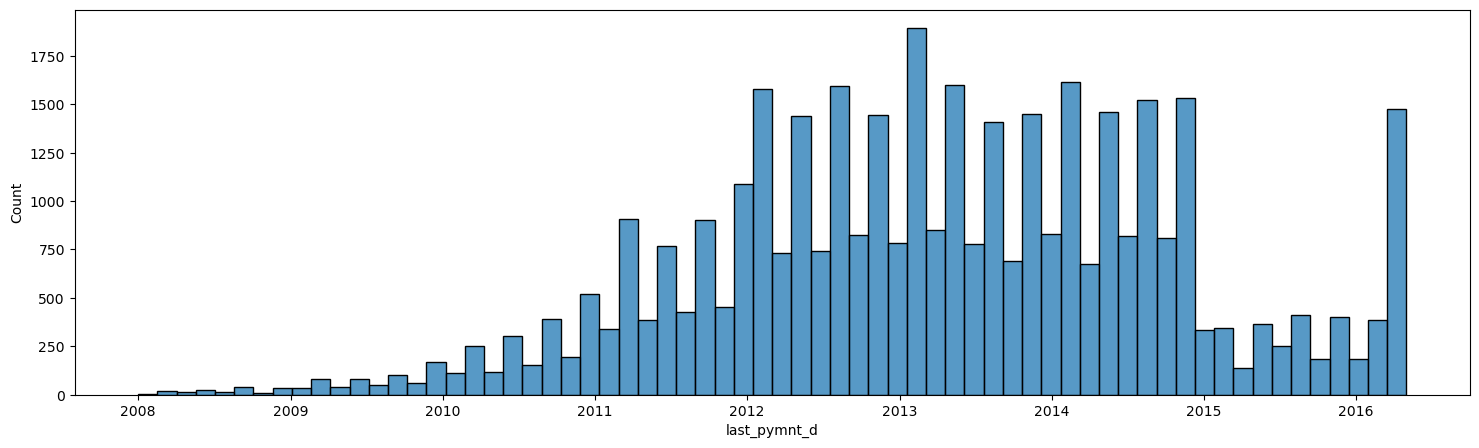

In [601]:
plt.figure(figsize=(18, 5))
sns.histplot(x='last_pymnt_d', data=loan)
plt.show()

In [604]:
last_pymnt_d_month =loan['last_pymnt_d'].dt.month
last_pymnt_d_month.describe()

count    39646.000000
mean         6.444206
std          3.429377
min          1.000000
25%          3.000000
50%          6.000000
75%          9.000000
max         12.000000
Name: last_pymnt_d, dtype: float64

In [606]:
last_pymnt_d_month.value_counts()

5.0     4285
3.0     3761
12.0    3512
10.0    3271
8.0     3242
7.0     3226
2.0     3211
4.0     3204
1.0     3041
9.0     3015
11.0    2945
6.0     2933
Name: last_pymnt_d, dtype: int64

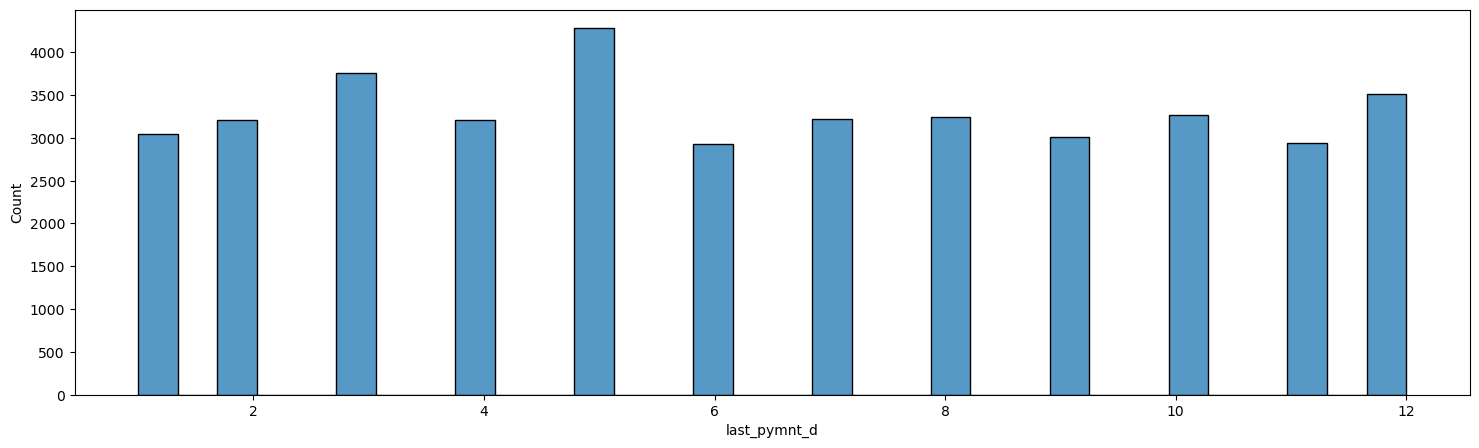

In [605]:
plt.figure(figsize=(18, 5))
sns.histplot(x=last_pymnt_d_month)
plt.show()

In [ ]:
# Last payment is made in May then March then December and so..

In [607]:
last_pymnt_d_year=loan['last_pymnt_d'].dt.year
last_pymnt_d_year.describe()

count    39646.000000
mean      2012.820966
std          1.539878
min       2008.000000
25%       2012.000000
50%       2013.000000
75%       2014.000000
max       2016.000000
Name: last_pymnt_d, dtype: float64

In [608]:
last_pymnt_d_year=loan['last_pymnt_d'].dt.year
last_pymnt_d_year.value_counts()

2013.0    9458
2014.0    9269
2012.0    8904
2011.0    4996
2015.0    2431
2016.0    2044
2010.0    1848
2009.0     559
2008.0     137
Name: last_pymnt_d, dtype: int64

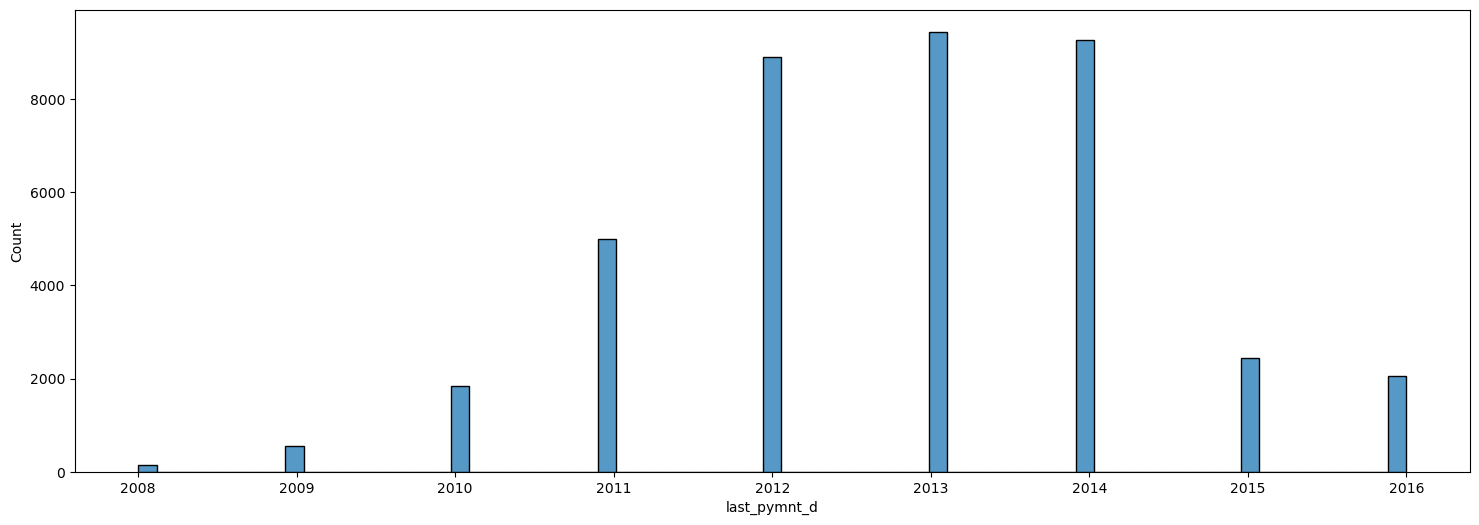

In [610]:
plt.figure(figsize=(18, 6))
sns.histplot(x=last_pymnt_d_year)
plt.show()

In [613]:
# Last total payment amount received
loan['last_pymnt_amnt'].describe()

count    39717.000000
mean      2678.826162
std       4447.136012
min          0.000000
25%        218.680000
50%        546.140000
75%       3293.160000
max      36115.200000
Name: last_pymnt_amnt, dtype: float64

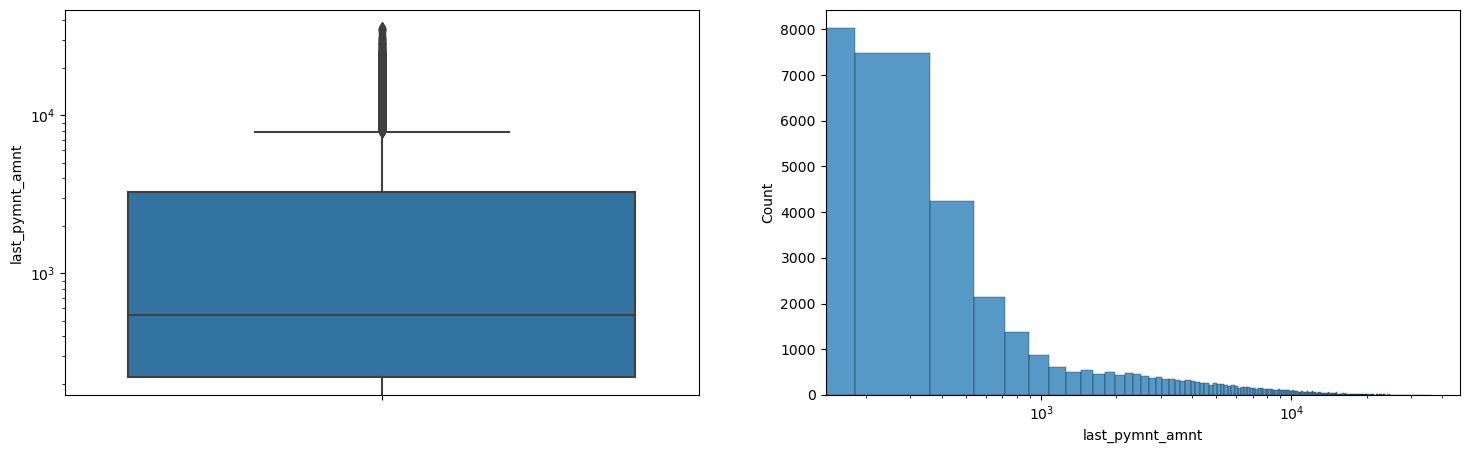

In [615]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y='last_pymnt_amnt', data=loan)
plt.yscale('log')

plt.subplot(1, 2, 2)
sns.histplot(x='last_pymnt_amnt', data=loan)
plt.xscale('log')

plt.show()

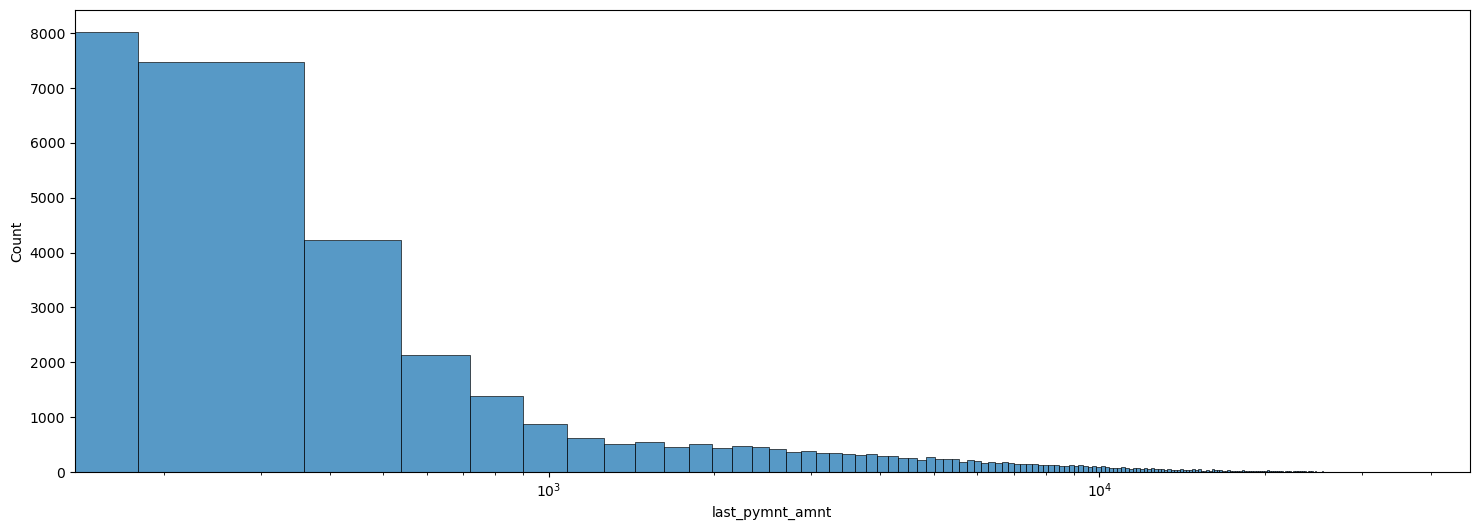

In [616]:
plt.figure(figsize=(18, 6))

sns.histplot(x='last_pymnt_amnt', data=loan)
plt.xscale('log')

plt.show()

In [617]:
# last_credit_pull_d: The most recent month LC pulled credit for this loan
loan['last_credit_pull_d'].describe()

count      39715
unique       106
top       May-16
freq       10308
Name: last_credit_pull_d, dtype: object

In [619]:
loan['last_credit_pull_d'] = pd.to_datetime(loan['last_credit_pull_d'], format='%b-%y')
loan['last_credit_pull_d'].head(2)

0   2016-05-01
1   2013-09-01
Name: last_credit_pull_d, dtype: datetime64[ns]

In [620]:
loan['last_credit_pull_d'].describe()

C:\Users\window 10\AppData\Local\Temp\ipykernel_1276\215925862.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  loan['last_credit_pull_d'].describe()


count                   39715
unique                    106
top       2016-05-01 00:00:00
freq                    10308
first     2007-05-01 00:00:00
last      2016-05-01 00:00:00
Name: last_credit_pull_d, dtype: object

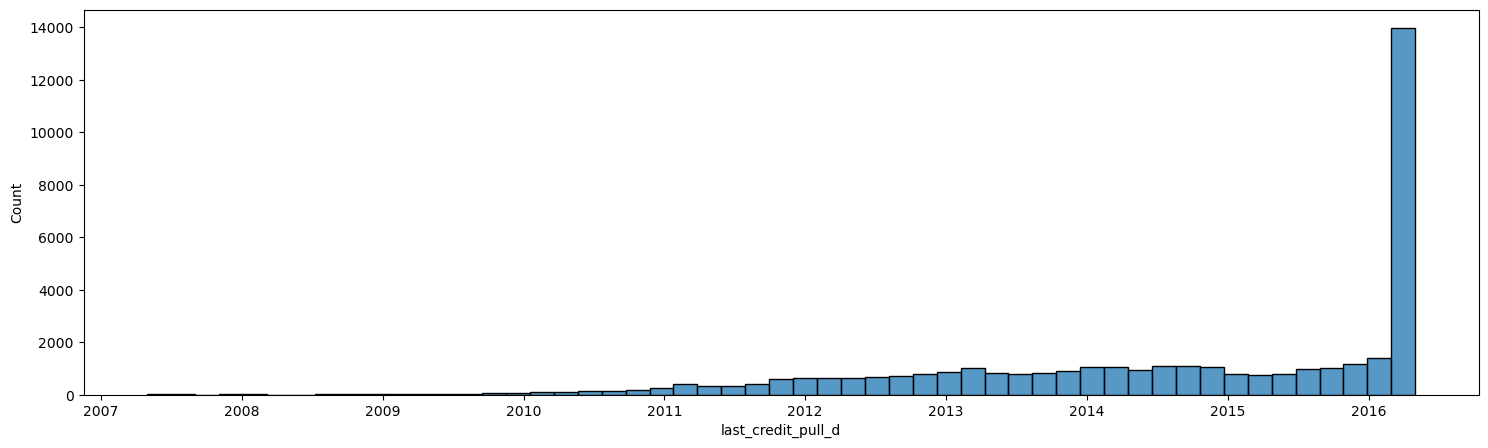

In [621]:
plt.figure(figsize=(18, 5))
sns.histplot(x='last_credit_pull_d', data=loan)
plt.show()

In [622]:
last_credit_pull_d_month = loan['last_credit_pull_d'].dt.month
last_credit_pull_d_month.describe()

count    39715.000000
mean         5.818305
std          3.027076
min          1.000000
25%          4.000000
50%          5.000000
75%          8.000000
max         12.000000
Name: last_credit_pull_d, dtype: float64

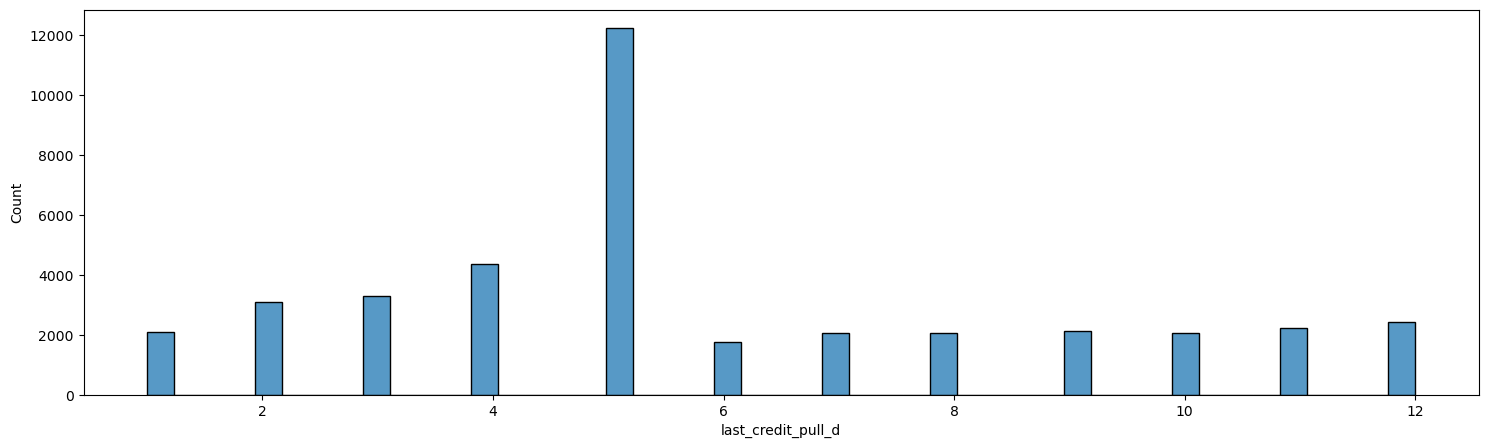

In [623]:
plt.figure(figsize=(18, 5))
sns.histplot(x=last_credit_pull_d_month)
plt.show()

In [625]:
loan.iloc[:2, 44:54]

last_credit_pull_d  collections_12_mths_ex_med  policy_code  \
0         2016-05-01                         0.0            1   
1         2013-09-01                         0.0            1   

  application_type  acc_now_delinq  chargeoff_within_12_mths  \
0       INDIVIDUAL               0                       0.0   
1       INDIVIDUAL               0                       0.0   

   pub_rec_bankruptcies  tax_liens  loan_id  
0                   0.0        0.0  1077501  
1                   0.0        0.0  1077430

In [628]:
# Number of collections in 12 months excluding medical collections
loan['collections_12_mths_ex_med'].describe()

count    39661.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: collections_12_mths_ex_med, dtype: float64

In [629]:
loan['collections_12_mths_ex_med'].value_counts()

0.0    39661
Name: collections_12_mths_ex_med, dtype: int64

In [630]:
# Since all values are zero(0) that doesn't make any sense so we will be exclude this column from dataset
loan = loan.loc[:, ~loan.columns.isin(['collections_12_mths_ex_med'])]
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        39717 non-null  int64         
 1   member_id                 39717 non-null  int64         
 2   loan_amnt                 39717 non-null  int64         
 3   funded_amnt               39717 non-null  int64         
 4   funded_amnt_inv           39717 non-null  float64       
 5   term                      39717 non-null  object        
 6   int_rate                  39717 non-null  object        
 7   installment               39717 non-null  float64       
 8   grade                     39717 non-null  object        
 9   sub_grade                 39717 non-null  object        
 10  emp_title                 39717 non-null  object        
 11  emp_length                39717 non-null  object        
 12  home_ownership    

In [631]:
loan.iloc[:2, 44:54]

last_credit_pull_d  policy_code application_type  acc_now_delinq  \
0         2016-05-01            1       INDIVIDUAL               0   
1         2013-09-01            1       INDIVIDUAL               0   

   chargeoff_within_12_mths  pub_rec_bankruptcies  tax_liens  loan_id  
0                       0.0                   0.0        0.0  1077501  
1                       0.0                   0.0        0.0  1077430

In [633]:
# publicly available policy_code=1
# new products not publicly available policy_code=2

loan['policy_code'].describe()

count    39717.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: policy_code, dtype: float64

In [636]:
loan['policy_code'].value_counts()

1    39717
Name: policy_code, dtype: int64

In [637]:
# Since all values are one(1) that doesn't make any sense so we will be exclude this column from dataset
loan = loan.loc[:, ~loan.columns.isin(['policy_code'])]
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        39717 non-null  int64         
 1   member_id                 39717 non-null  int64         
 2   loan_amnt                 39717 non-null  int64         
 3   funded_amnt               39717 non-null  int64         
 4   funded_amnt_inv           39717 non-null  float64       
 5   term                      39717 non-null  object        
 6   int_rate                  39717 non-null  object        
 7   installment               39717 non-null  float64       
 8   grade                     39717 non-null  object        
 9   sub_grade                 39717 non-null  object        
 10  emp_title                 39717 non-null  object        
 11  emp_length                39717 non-null  object        
 12  home_ownership    

In [638]:
loan.iloc[:2, 44:54]

last_credit_pull_d application_type  acc_now_delinq  \
0         2016-05-01       INDIVIDUAL               0   
1         2013-09-01       INDIVIDUAL               0   

   chargeoff_within_12_mths  pub_rec_bankruptcies  tax_liens  loan_id  
0                       0.0                   0.0        0.0  1077501  
1                       0.0                   0.0        0.0  1077430

In [641]:
#Indicates whether the loan is an individual application or a joint application with two co-borrowers
loan['application_type'].describe()

count          39717
unique             1
top       INDIVIDUAL
freq           39717
Name: application_type, dtype: object

In [642]:
# Since all values are 'INDIVIDUAL' this doesn't make any sense in analysis so we will be exclude this column from dataset
loan = loan.loc[:, ~loan.columns.isin(['application_type'])]
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        39717 non-null  int64         
 1   member_id                 39717 non-null  int64         
 2   loan_amnt                 39717 non-null  int64         
 3   funded_amnt               39717 non-null  int64         
 4   funded_amnt_inv           39717 non-null  float64       
 5   term                      39717 non-null  object        
 6   int_rate                  39717 non-null  object        
 7   installment               39717 non-null  float64       
 8   grade                     39717 non-null  object        
 9   sub_grade                 39717 non-null  object        
 10  emp_title                 39717 non-null  object        
 11  emp_length                39717 non-null  object        
 12  home_ownership    

In [643]:
loan.iloc[:2, 44:54]

last_credit_pull_d  acc_now_delinq  chargeoff_within_12_mths  \
0         2016-05-01               0                       0.0   
1         2013-09-01               0                       0.0   

   pub_rec_bankruptcies  tax_liens  loan_id  
0                   0.0        0.0  1077501  
1                   0.0        0.0  1077430

In [646]:
# The number of accounts on which the borrower is now delinquent.
loan['acc_now_delinq'].describe()

count    39717.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: acc_now_delinq, dtype: float64

In [647]:
loan['acc_now_delinq'].value_counts()

0    39717
Name: acc_now_delinq, dtype: int64

In [648]:
# Since all values are zero(0) that doesn't make any sense to get insight so we will be exclude this column from dataset
loan = loan.loc[:, ~loan.columns.isin(['acc_now_delinq'])]
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        39717 non-null  int64         
 1   member_id                 39717 non-null  int64         
 2   loan_amnt                 39717 non-null  int64         
 3   funded_amnt               39717 non-null  int64         
 4   funded_amnt_inv           39717 non-null  float64       
 5   term                      39717 non-null  object        
 6   int_rate                  39717 non-null  object        
 7   installment               39717 non-null  float64       
 8   grade                     39717 non-null  object        
 9   sub_grade                 39717 non-null  object        
 10  emp_title                 39717 non-null  object        
 11  emp_length                39717 non-null  object        
 12  home_ownership    

In [649]:
loan.iloc[:2, 44:54]

last_credit_pull_d  chargeoff_within_12_mths  pub_rec_bankruptcies  \
0         2016-05-01                       0.0                   0.0   
1         2013-09-01                       0.0                   0.0   

   tax_liens  loan_id  
0        0.0  1077501  
1        0.0  1077430

In [651]:
# Number of charge-offs/Defaults within 12 months
loan['chargeoff_within_12_mths'].describe()

count    39661.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: chargeoff_within_12_mths, dtype: float64

In [652]:
loan['chargeoff_within_12_mths'].value_counts()

0.0    39661
Name: chargeoff_within_12_mths, dtype: int64

In [653]:
# Since all values are zero(0) that doesn't make any sense to get insight so we will be exclude this column from dataset
loan = loan.loc[:, ~loan.columns.isin(['chargeoff_within_12_mths'])]
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       39717 non-null  int64         
 1   member_id                39717 non-null  int64         
 2   loan_amnt                39717 non-null  int64         
 3   funded_amnt              39717 non-null  int64         
 4   funded_amnt_inv          39717 non-null  float64       
 5   term                     39717 non-null  object        
 6   int_rate                 39717 non-null  object        
 7   installment              39717 non-null  float64       
 8   grade                    39717 non-null  object        
 9   sub_grade                39717 non-null  object        
 10  emp_title                39717 non-null  object        
 11  emp_length               39717 non-null  object        
 12  home_ownership           39717 n

In [654]:
loan.iloc[:2, 44:54]

last_credit_pull_d  pub_rec_bankruptcies  tax_liens  loan_id
0         2016-05-01                   0.0        0.0  1077501
1         2013-09-01                   0.0        0.0  1077430

In [655]:
# Number of public record bankruptcies
loan['pub_rec_bankruptcies'].describe()

count    39020.000000
mean         0.043260
std          0.204324
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

In [656]:
loan['pub_rec_bankruptcies'].value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

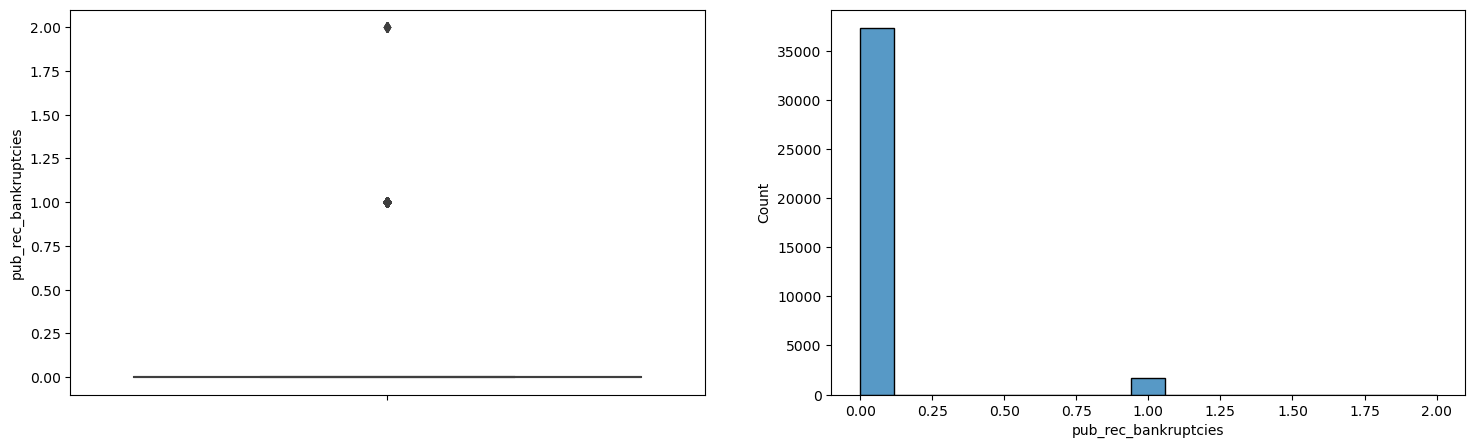

In [657]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y='pub_rec_bankruptcies', data=loan)

plt.subplot(1, 2, 2)
sns.histplot(x='pub_rec_bankruptcies', data=loan)

plt.show()

In [658]:
# Number of tax liens
loan['tax_liens'].describe()

count    39678.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: tax_liens, dtype: float64

In [659]:
loan['tax_liens'].value_counts()

0.0    39678
Name: tax_liens, dtype: int64

In [660]:
loan['tax_liens'].isnull().sum()

39

In [661]:
39678+39

39717

In [662]:
# Since all values are either zero(0) or blank so it doesn't make any sense to get insight so we will be 
#exclude this column from dataset
loan = loan.loc[:, ~loan.columns.isin(['tax_liens'])]
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       39717 non-null  int64         
 1   member_id                39717 non-null  int64         
 2   loan_amnt                39717 non-null  int64         
 3   funded_amnt              39717 non-null  int64         
 4   funded_amnt_inv          39717 non-null  float64       
 5   term                     39717 non-null  object        
 6   int_rate                 39717 non-null  object        
 7   installment              39717 non-null  float64       
 8   grade                    39717 non-null  object        
 9   sub_grade                39717 non-null  object        
 10  emp_title                39717 non-null  object        
 11  emp_length               39717 non-null  object        
 12  home_ownership           39717 n

In [663]:
loan.iloc[:2, 44:54]

last_credit_pull_d  pub_rec_bankruptcies  loan_id
0         2016-05-01                   0.0  1077501
1         2013-09-01                   0.0  1077430

## segmented uni-variate analysis

### Doing analysis numerical  loan amount versus other categorical variables

In [667]:
loan.iloc[:5, :18]

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                   US Army  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                   US Army  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status    issue_d  loan_status  \
0           RENT     24000.0            Verified 2011-12-01   Fully Paid   
1           RENT     30000.0     Source Verified 2011-12-01  Charged Off   
2           RENT     12252.0        Not Verified 2011-12-01   Fully Paid   
3           RENT     49200.0     Source Verified 2011-12-01   Fully Paid   
4           RENT     80000.0     Source Verified 2011-12-01      Current   

                                                                url  
0  https://lendingclub.com/browse/loanDetail.action?loan_id=1077501  
1  https://lendingclub.com/browse/loanDetail.action?loan_id=1077430  
2  https://lendingclub.com/browse/loanDetail.action?loan_id=1077175  
3  https://lendingclub.com/browse/loanDetail.action?loan_id=1076863  
4  https://lendingclub.com/browse/loanDetail.action?loan_id=1075358

In [689]:
loan['loan_amnt'].mean()

11219.443814991062

In [680]:
loan['loan_amnt'].median()

10000.0

In [679]:
loan.pivot_table(index=['term'], values=['loan_amnt'], aggfunc=np.median)

loan_amnt
term                 
 36 months       8000
 60 months      15000

In [681]:
# Overall median for loan_amout is 10000 however when segmented in terms 
# for 36 months term (3 years tenure) it is 8000 and for 60 months term (5 years tenure) it is 15000

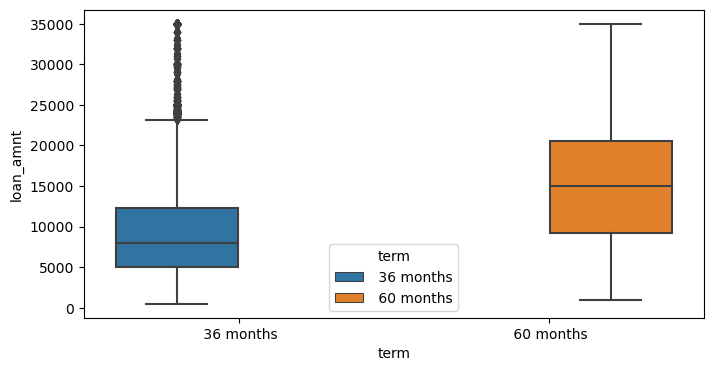

In [685]:
plt.figure(figsize=(8, 4))
sns.boxplot(y='loan_amnt', x='term', data=loan,  hue='term' )
plt.show()

In [688]:
loan.pivot_table(index=['grade'], values=['loan_amnt'], aggfunc=np.mean)

loan_amnt
grade              
A       8624.928111
B      11119.080699
C      11004.670906
D      12278.198606
E      15847.255454
F      18363.298379
G      20226.819620

In [693]:
loan.pivot_table(index=['grade'], values=['loan_amnt'], aggfunc=np.median)

loan_amnt
grade           
A           7500
B          10000
C           9725
D          10000
E          15000
F          18000
G          20250

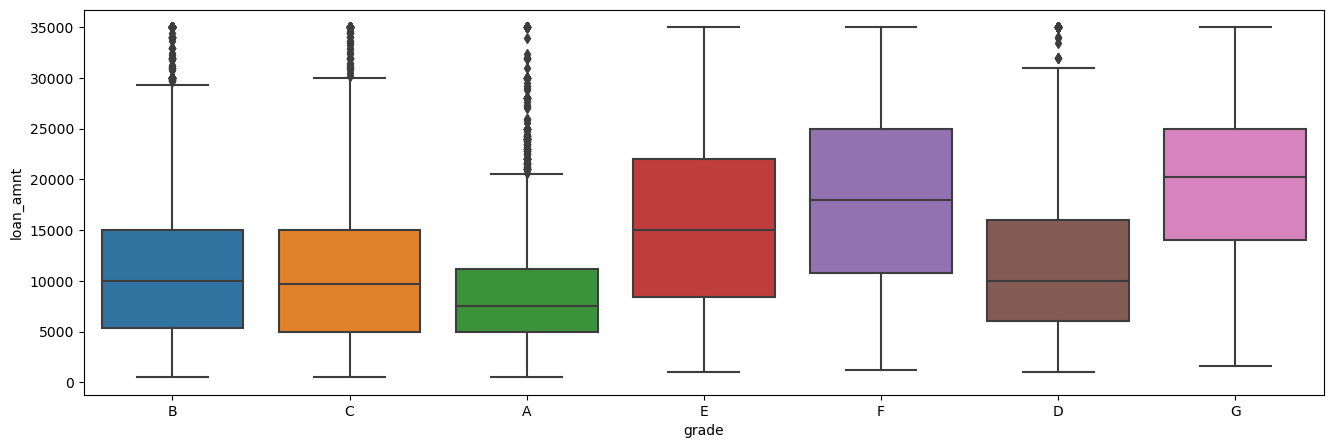

In [692]:
plt.figure(figsize=(16, 5))
sns.boxplot(y='loan_amnt', x='grade', data=loan)
plt.show()

In [696]:
loan.pivot_table(index=['emp_title'], values=['loan_amnt'], aggfunc=np.mean).sort_values(by='loan_amnt',ascending=False)

loan_amnt
emp_title                                                                
Dept. Of Rehabilitation & Corrections                             35000.0
ZBI                                                               35000.0
Steven W. Rickard and Associates, Inc.                            35000.0
Global Artificial Lift, A Halliburton Co                          35000.0
Herbalife Intl                                                    35000.0
...                                                                   ...
Team Awesome Productions, Inc.                                      725.0
SDSU Residential Life                                               700.0
Hughes, Hubbard & Reed LLP                                          500.0
THe University of Illinois                                          500.0
Global Travel International -and- Global Domains International      500.0

[28820 rows x 1 columns]

In [705]:
loan.pivot_table(index=['emp_length'], values=['loan_amnt'], aggfunc=np.mean).sort_values(by='loan_amnt',ascending=True)

loan_amnt
emp_length              
< 1 year     9657.980580
1 year      10168.495370
2 years     10262.374658
3 years     10738.278388
4 years     10977.408324
5 years     11287.035344
6 years     11494.952894
7 years     11739.495206
8 years     11887.998648
9 years     12011.625596
10+ years   12607.783303

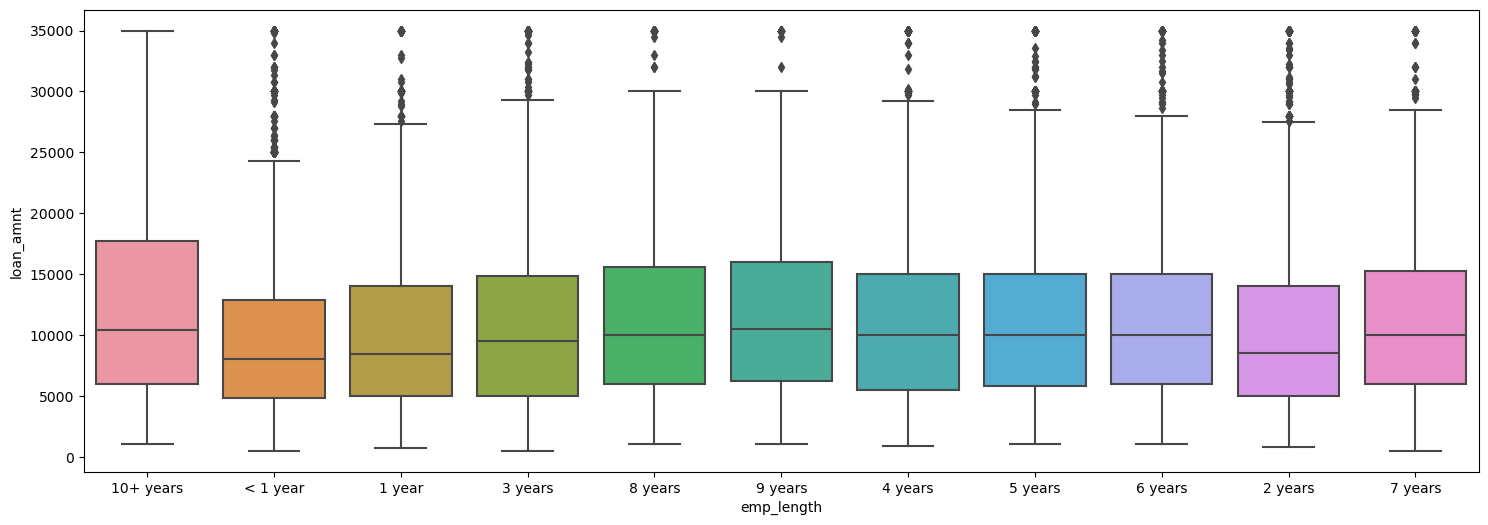

In [706]:
plt.figure(figsize=(18, 6))
sns.boxplot(y='loan_amnt', x='emp_length', data=loan)
plt.show()

In [708]:
loan.pivot_table(index=['home_ownership'], values=['loan_amnt'], aggfunc=np.mean).sort_values(by='loan_amnt',ascending=False)

loan_amnt
home_ownership              
MORTGAGE        12690.073051
OTHER           10663.010204
OWN             10256.752780
RENT            10004.853431
NONE             5600.000000

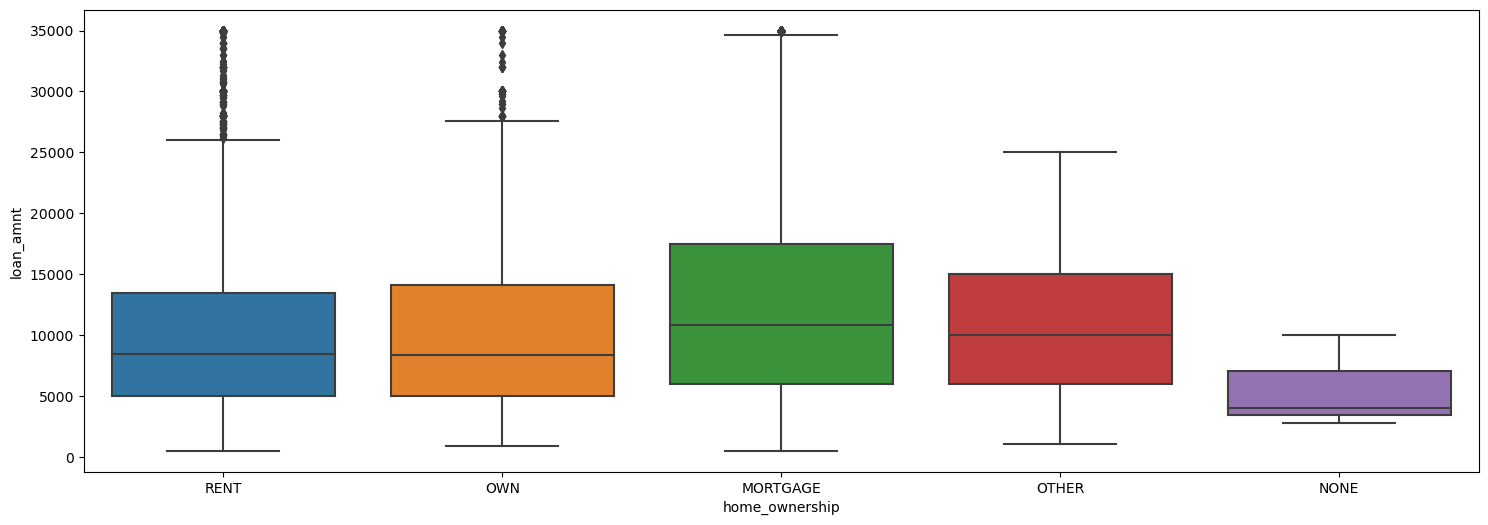

In [709]:
plt.figure(figsize=(18, 6))
sns.boxplot(y='loan_amnt', x='home_ownership', data=loan)
plt.show()

In [713]:
loan['loan_amnt'].median()

10000.0

In [712]:
loan['loan_amnt'].mean()

11219.443814991062

In [715]:
loan.pivot_table(index=['verification_status'], values=['loan_amnt'], aggfunc=np.mean).sort_values(by='loan_amnt',
                                                                                                   ascending=False)

loan_amnt
verification_status              
Verified             15788.632992
Source Verified      10099.829779
Not Verified          8421.431948

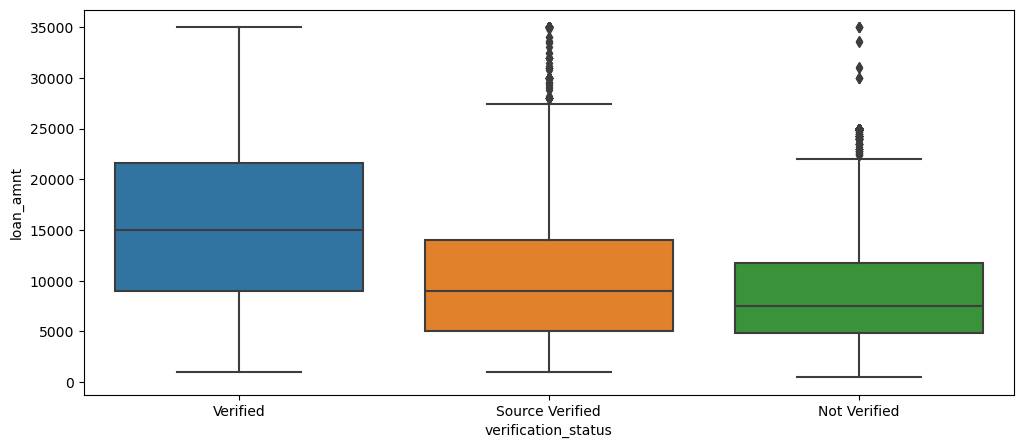

In [717]:
plt.figure(figsize=(12, 5))
sns.boxplot(y='loan_amnt', x='verification_status', data=loan)
plt.show()

In [721]:
loan.pivot_table(index=['loan_status'], values=['loan_amnt'], aggfunc=np.mean).sort_values(by='loan_amnt',
                                                                                                   ascending=True)

loan_amnt
loan_status              
Fully Paid   10866.455994
Charged Off  12104.385108
Current      17053.991228

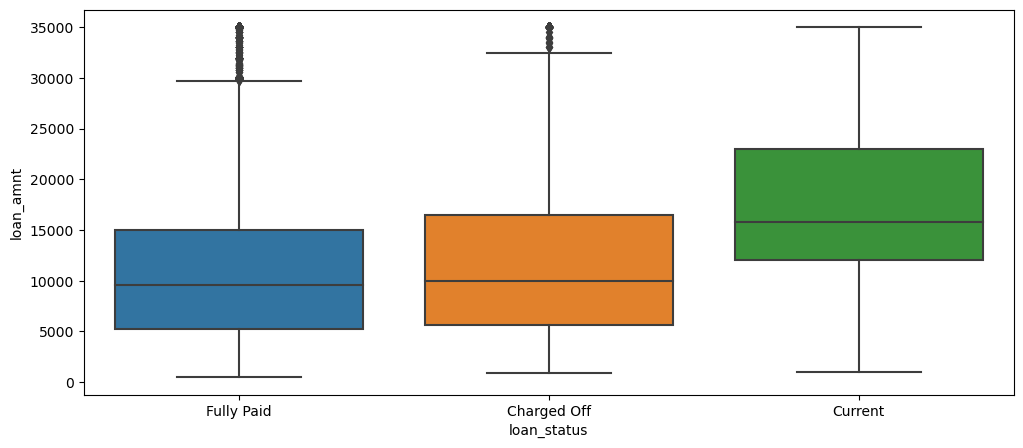

In [722]:
plt.figure(figsize=(12, 5))
sns.boxplot(y='loan_amnt', x='loan_status', data=loan)
plt.show()

In [737]:
loan.iloc[:2, 40:55]

recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
0        0.00                     0.00   2015-01-01           171.62   
1      117.08                     1.11   2013-04-01           119.66   

  last_credit_pull_d  pub_rec_bankruptcies  loan_id  
0         2016-05-01                   0.0  1077501  
1         2013-09-01                   0.0  1077430

In [734]:
loan.pivot_table(index=['addr_state'], values=['loan_amnt'], aggfunc=np.mean).sort_values(by='loan_amnt',
                                                                                                   ascending=True).head(1)

loan_amnt
addr_state             
ME          3066.666667

In [735]:
loan.pivot_table(index=['addr_state'], values=['loan_amnt'], aggfunc=np.mean).sort_values(by='loan_amnt',
                                                                                                   ascending=False).head(1)

loan_amnt
addr_state           
AK           12991.25

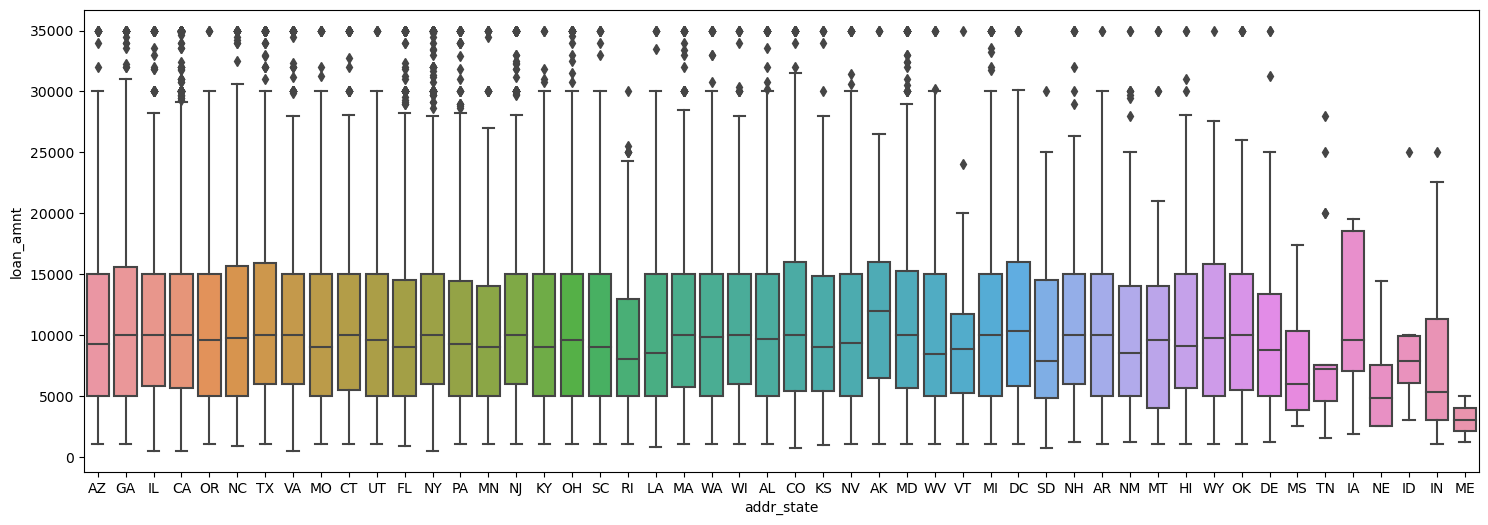

In [731]:
plt.figure(figsize=(18, 6))
sns.boxplot(y='loan_amnt', x='addr_state', data=loan)
plt.show()

In [736]:
loan.pivot_table(index=['addr_state'], values=['loan_amnt'], aggfunc=np.mean).sort_values(by='loan_amnt',
                                                                                                   ascending=True).head(1)

loan_amnt
initial_list_status              
f                    11219.443815

### Doing analysis numerical  installment versus other categorical variables

In [739]:
loan.iloc[:2, :15]

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   

  int_rate  installment grade sub_grade emp_title emp_length home_ownership  \
0   10.65%       162.87     B        B2   US Army  10+ years           RENT   
1   15.27%        59.83     C        C4     Ryder   < 1 year           RENT   

   annual_inc verification_status  
0     24000.0            Verified  
1     30000.0     Source Verified

In [741]:
loan['installment'].describe()

count    39717.000000
mean       324.561922
std        208.874874
min         15.690000
25%        167.020000
50%        280.220000
75%        430.780000
max       1305.190000
Name: installment, dtype: float64

In [742]:
loan.pivot_table(index=['term'], values=['installment'], aggfunc=np.mean).sort_values(by='installment',
                                                                                                   ascending=True)

installment
term                   
 36 months   311.693307
 60 months   359.815215

In [746]:
loan.pivot_table(index=['int_rate'], values=['installment'], aggfunc=np.mean).sort_values(by='installment',
                                                                                                   ascending=True)

installment
int_rate             
17.54%      64.660000
7.12%       72.695714
21.48%      95.640000
9.70%       98.392500
6.39%      100.046379
...               ...
15.83%     859.295000
18.72%     876.360000
16.15%     880.780000
17.34%     895.560000
17.46%     897.060000

[371 rows x 1 columns]

In [747]:
loan['int_rate'].dtypes

dtype('O')

In [760]:
if loan['int_rate'].dtype == object:
    loan['int_rate'] = loan['int_rate'].str.replace('%', '')
else:
    print('interest rate is numerical value')

interest rate is numerical value


In [761]:
loan['int_rate']

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: float32

In [762]:
loan['int_rate'].isnull().sum()

0

In [763]:
loan['int_rate'] = loan['int_rate'].astype(np.float32)

In [764]:
loan['int_rate'].dtypes

dtype('float32')

In [766]:
loan['int_rate']= round(loan['int_rate'], 2)
loan['int_rate']

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: float32

In [767]:
loan.pivot_table(index=['int_rate'], values=['installment'], aggfunc=np.mean).sort_values(by='installment',
                                                                                                   ascending=True)

installment
int_rate              
17.540001    64.660000
7.120000     72.695714
21.480000    95.640000
9.700000     98.392500
6.390000    100.046379
...                ...
15.830000   859.295000
18.719999   876.360000
16.150000   880.780000
17.340000   895.560000
17.459999   897.060000

[371 rows x 1 columns]

In [768]:
loan.iloc[:2, :15]

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   

   int_rate  installment grade sub_grade emp_title emp_length home_ownership  \
0     10.65       162.87     B        B2   US Army  10+ years           RENT   
1     15.27        59.83     C        C4     Ryder   < 1 year           RENT   

   annual_inc verification_status  
0     24000.0            Verified  
1     30000.0     Source Verified

In [770]:
loan.pivot_table(index=['grade'], values=['installment', 'loan_amnt'], aggfunc=np.mean).sort_values(by='installment',
                                                                                                   ascending=True)

installment     loan_amnt
grade                           
A       256.757152   8624.928111
C       319.675054  11004.670906
B       321.024384  11119.080699
D       363.892996  12278.198606
E       428.536566  15847.255454
F       498.653813  18363.298379
G       574.744905  20226.819620

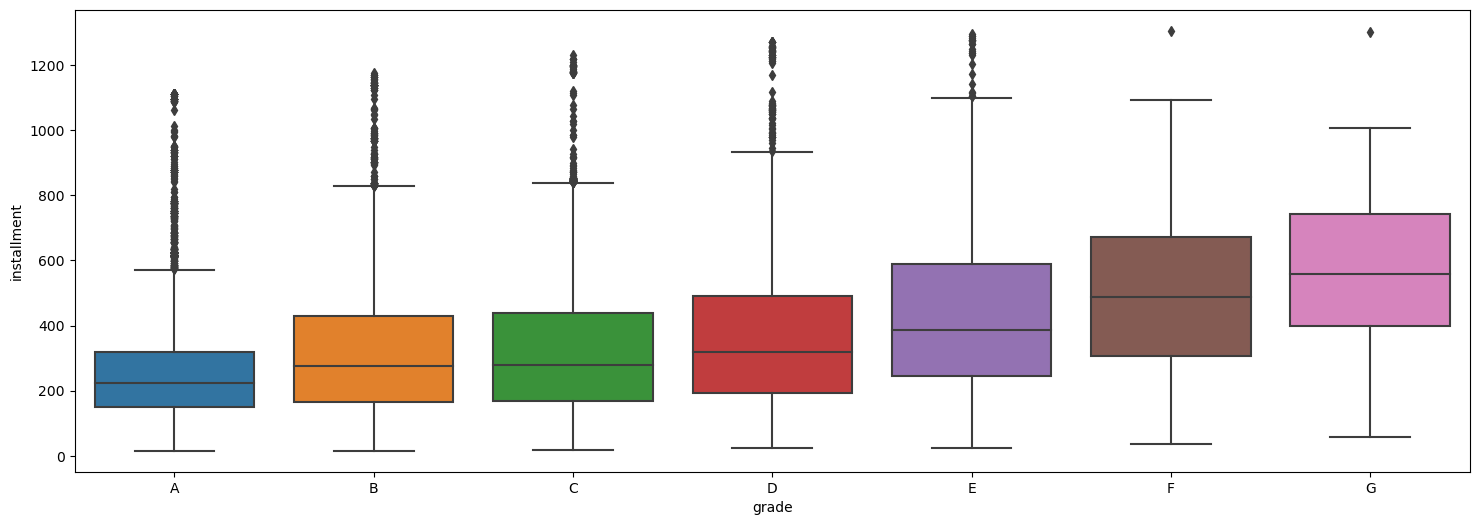

In [777]:
plt.figure(figsize=(18, 6))
sns.boxplot(y='installment', x='grade', data=loan.sort_values(by='grade', ascending=True))
plt.show()

In [778]:
loan.pivot_table(index=['loan_status'], values=['installment', 'loan_amnt'], aggfunc=np.mean).sort_values(by='installment',
                                                                                                   ascending=True)

installment     loan_amnt
loan_status                           
Fully Paid    320.125232  10866.455994
Charged Off   336.175006  12104.385108
Current       395.476061  17053.991228

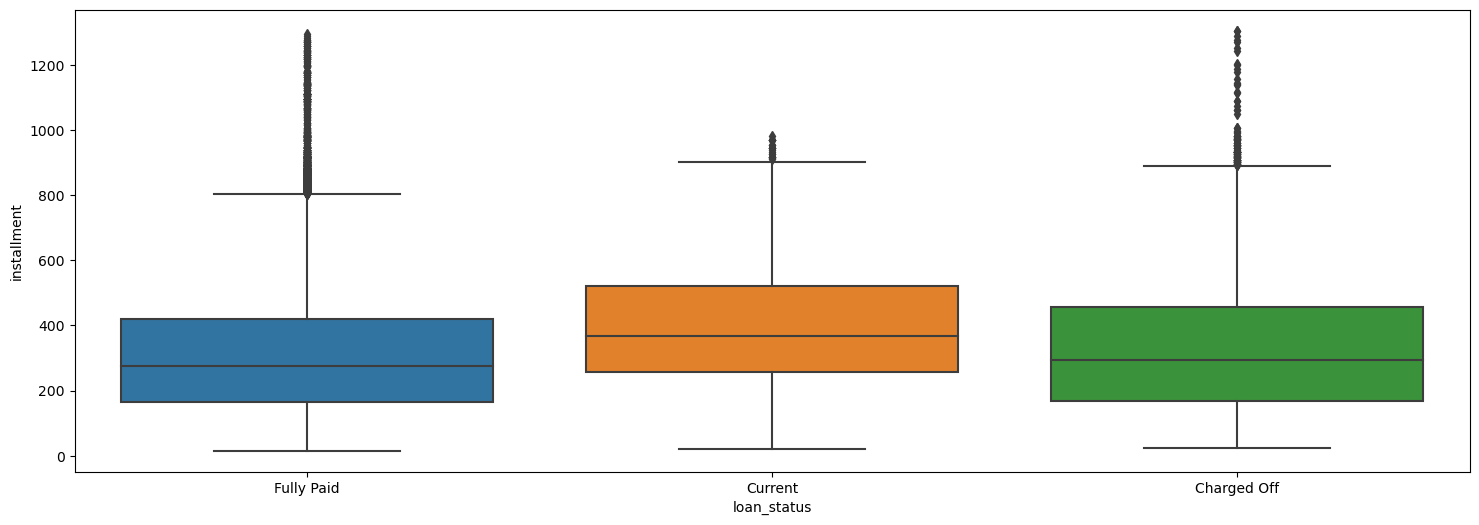

In [780]:
plt.figure(figsize=(18, 6))
sns.boxplot(y='installment', x='loan_status', data=loan.sort_values(by='loan_status', ascending=False))
plt.show()

In [781]:
loan.pivot_table(index=['emp_length'], values=['installment', 'loan_amnt'], aggfunc=np.mean).sort_values(by='installment',
                                                                                                   ascending=True)

installment     loan_amnt
emp_length                           
< 1 year     287.442756   9657.980580
1 year       303.486546  10168.495370
2 years      304.120385  10262.374658
3 years      313.975219  10738.278388
4 years      321.323481  10977.408324
5 years      326.124299  11287.035344
6 years      328.405680  11494.952894
7 years      338.810180  11739.495206
8 years      341.006937  11887.998648
9 years      347.038712  12011.625596
10+ years    353.798717  12607.783303

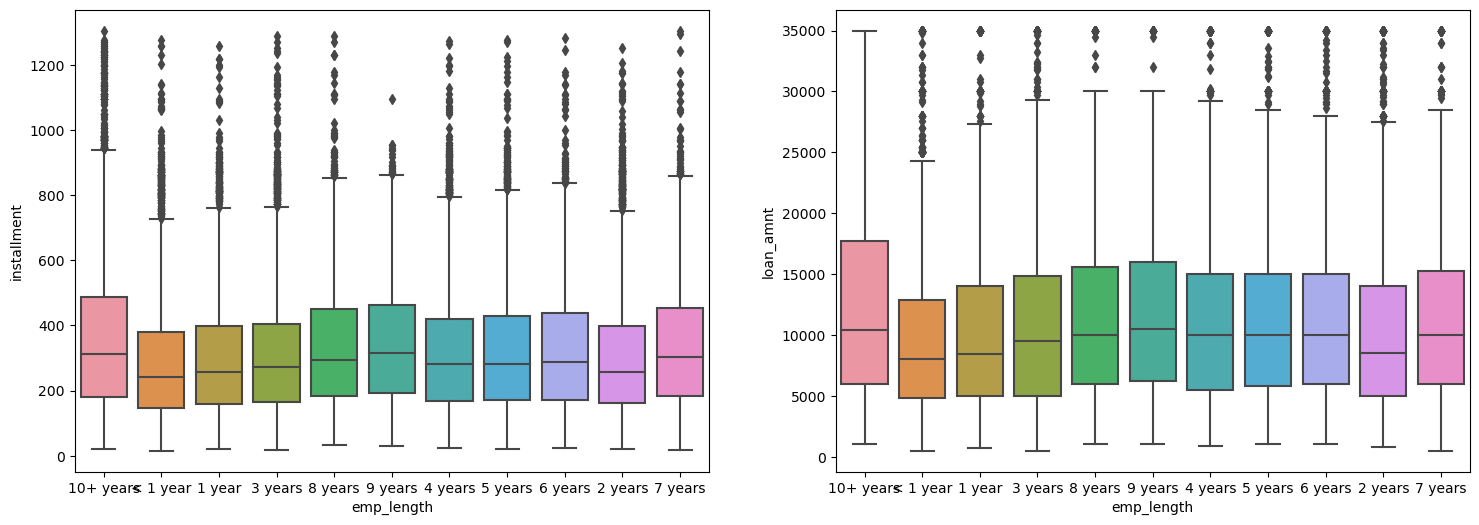

In [785]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y='installment', x='emp_length', data=loan)

plt.subplot(1, 2, 2)
sns.boxplot(y='loan_amnt', x='emp_length', data=loan)
plt.show()

In [813]:
loan.pivot_table(index=['home_ownership'], values=['installment', 'loan_amnt'], aggfunc=np.mean).sort_values(by='installment', ascending=True)

installment     loan_amnt
home_ownership                           
NONE             176.426667   5600.000000
RENT             298.194824  10004.853431
OWN              299.833169  10256.752780
OTHER            338.745714  10663.010204
MORTGAGE         357.009213  12690.073051

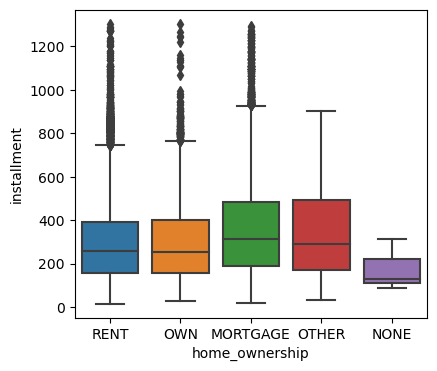

In [814]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.boxplot(y='installment', x='home_ownership', data=loan)
plt.show()

In [821]:
loan.pivot_table(index=['verification_status'], values=['installment', 'loan_amnt'],
                 aggfunc=np.mean).sort_values(by='installment', ascending=True)

installment     loan_amnt
verification_status                           
Not Verified          258.687308   8421.431948
Source Verified       289.807134  10099.829779
Verified              438.681714  15788.632992

In [827]:
loan.iloc[:2, 19:38]

purpose     title zip_code addr_state    dti  delinq_2yrs  \
0  credit_card  Computer    860xx         AZ  27.65            0   
1          car      bike    309xx         GA   1.00            0   

  earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  \
0       1985-01-01               1         3        0      13648   83.699997   
1       1999-04-01               5         3        0       1687    9.400000   

   total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
0          9                   f        0.0            0.0  5863.155187   
1          4                   f        0.0            0.0  1008.710000   

   total_pymnt_inv  total_rec_prncp  
0          5833.84          5000.00  
1          1008.71           456.46

In [828]:
loan.pivot_table(index=['purpose'], values=['installment', 'loan_amnt'],
                 aggfunc=np.mean).sort_values(by='installment', ascending=True)

installment     loan_amnt
purpose                                      
vacation             162.256273   5463.320210
car                  190.162395   6777.517753
moving               195.888165   6650.171527
educational          218.109754   6810.461538
major_purchase       236.188711   8155.429813
other                237.010393   8067.612071
medical              237.185988   8263.672439
renewable_energy     249.875340   8717.233010
wedding              293.491088   9876.029567
home_improvement     322.633995  11537.205981
credit_card          348.069437  11723.615984
debt_consolidation   366.238404  12694.989539
house                371.539370  13070.997375
small_business       385.024240  13567.272976

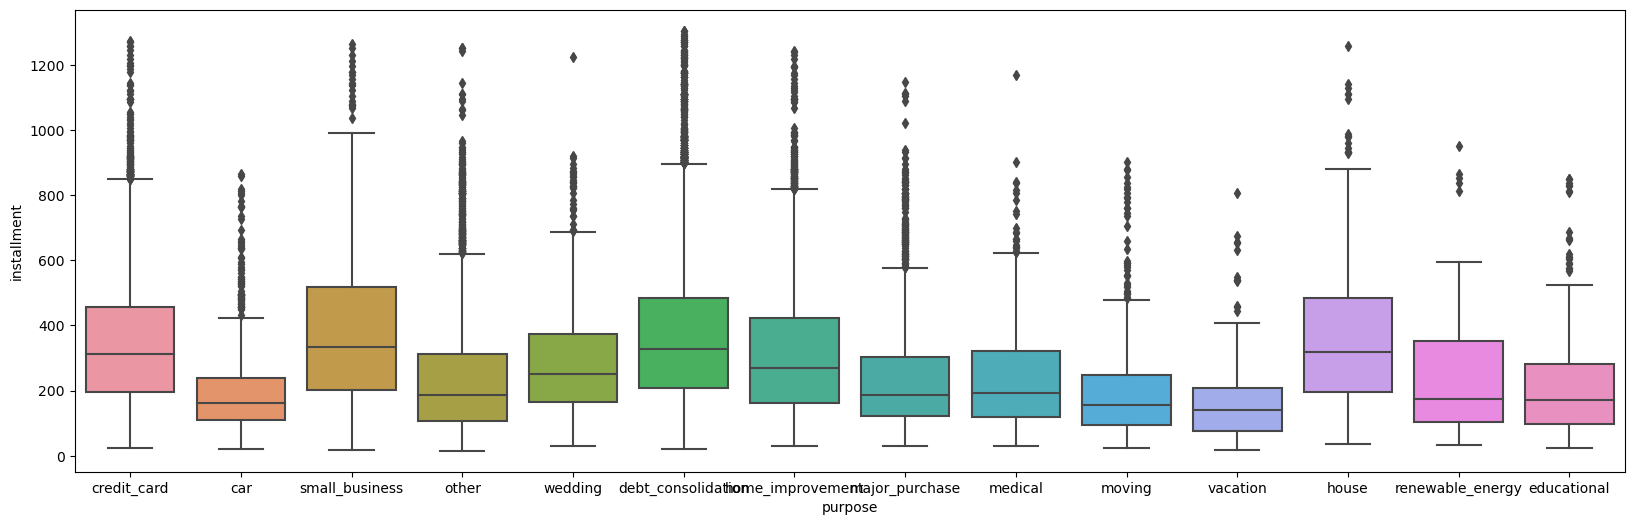

In [834]:
plt.figure(figsize=(20, 6))

sns.boxplot(y='installment', x='purpose', data=loan)
plt.show()

In [835]:
loan.pivot_table(index=['title'], values=['installment', 'loan_amnt'],
                 aggfunc=np.mean).sort_values(by='installment', ascending=True)

installment  loan_amnt
title                                         
buying a new computer         15.69      500.0
Store Charge Card             16.08      500.0
Financing for business        16.25      500.0
go on vacation in 08          16.31      500.0
A's2Zee's                     16.47      500.0
...                             ...        ...
Personal use loan           1269.73    35000.0
Positioning                 1272.20    35000.0
debt for cards              1276.60    35000.0
Consolidate 2011            1288.10    35000.0
Consolidator Line           1302.69    35000.0

[19615 rows x 2 columns]

In [836]:
loan.pivot_table(index=['open_acc'], values=['installment', 'loan_amnt'],
                 aggfunc=np.mean).sort_values(by='installment', ascending=True)

installment     loan_amnt
open_acc                           
41         187.140000   6000.000000
42         217.520000   7000.000000
2          218.355653   7208.760331
3          232.834220   7615.137307
38         235.470000   6200.000000
35         247.077500   8500.000000
33         257.586667   6933.333333
4          266.960184   8918.192488
5          272.549962   9256.786051
6          296.314995  10202.173087
32         299.950000   9093.750000
7          317.495070  11014.752364
8          325.071273  11235.619919
31         328.711429   9964.285714
9          332.330293  11616.863905
10         349.569094  12184.044369
12         355.533779  12376.110867
11         356.550925  12435.579024
13         359.447886  12614.756672
14         360.837391  12635.020175
15         362.063908  12678.547154
25         368.760545  11829.545455
22         370.648531  12102.447552
36         371.305000  11687.500000
20         373.940796  12752.422145
17         376.537584  13221.457490
39         376.700000  10000.000000
21         379.990984  13407.786885
19         381.098611  13505.555556
16         381.892979  13338.271277
18         382.879006  13322.889306
29         383.126923  11707.692308
27         384.285455  11857.954545
24         390.906914  12955.555556
23         398.894433  13376.288660
26         437.271176  13502.941176
30         447.920000  14460.000000
28         460.330800  13810.000000
34         511.994000  15420.000000
44         827.330000  22000.000000

In [837]:
loan.iloc[:2, 38:50]

total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         863.16                 0.0        0.00                     0.00   
1         435.17                 0.0      117.08                     1.11   

  last_pymnt_d  last_pymnt_amnt last_credit_pull_d  pub_rec_bankruptcies  \
0   2015-01-01           171.62         2016-05-01                   0.0   
1   2013-04-01           119.66         2013-09-01                   0.0   

   loan_id  
0  1077501  
1  1077430

In [838]:
#loan.pivot_table(index=['open_acc'], values=['installment', 'loan_amnt'],
                 #aggfunc=np.mean).sort_values(by='installment', ascending=True)

### Doing analysis numerical  interest_rate versus other categorical variables

In [841]:
loan.iloc[:2, :18]

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   

   int_rate  installment grade sub_grade emp_title emp_length home_ownership  \
0     10.65       162.87     B        B2   US Army  10+ years           RENT   
1     15.27        59.83     C        C4     Ryder   < 1 year           RENT   

   annual_inc verification_status    issue_d  loan_status  \
0     24000.0            Verified 2011-12-01   Fully Paid   
1     30000.0     Source Verified 2011-12-01  Charged Off   

                                                                url  
0  https://lendingclub.com/browse/loanDetail.action?loan_id=1077501  
1  https://lendingclub.com/browse/loanDetail.action?loan_id=1077430

In [851]:
loan['int_rate'].describe()

count    39717.000000
mean        12.020760
std          3.724828
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

In [845]:
loan.pivot_table(index=['term'], values=['installment', 'loan_amnt','int_rate'],
                 aggfunc=np.mean).sort_values(by='int_rate', ascending=True)

installment   int_rate     loan_amnt
term                                            
 36 months   311.693307  11.004656   9592.936314
 60 months   359.815215  14.805912  15675.225967

In [849]:
loan.pivot_table(index=['grade'], values=['installment', 'loan_amnt','int_rate'],
                 aggfunc=np.mean).sort_values(by='int_rate', ascending=True)

installment   int_rate     loan_amnt
grade                                      
A       256.757152   7.335262   8624.928111
B       321.024384  11.021224  11119.080699
C       319.675054  13.552960  11004.670906
D       363.892996  15.719900  12278.198606
E       428.536566  17.711714  15847.255454
F       498.653813  19.749323  18363.298379
G       574.744905  21.401045  20226.819620

In [850]:
loan.pivot_table(index=['emp_title'], 
                 values=['installment', 'loan_amnt','int_rate'],
                 aggfunc=np.mean
                ).sort_values(by='int_rate', ascending=True)

installment   int_rate  loan_amnt
emp_title                                                    
M J MILLER, INC                  165.88   5.420000     5500.0
Cordish Company                  126.68   5.420000     4200.0
Equity International Inc.         60.32   5.420000     2000.0
Avaak Inc.                       211.88   5.420000     7025.0
PEI                              301.60   5.420000    10000.0
...                                 ...        ...        ...
Protiviti                        835.63  23.910000    29100.0
Supervalu                        574.32  23.910000    20000.0
Medical Management Options       699.18  24.110001    24250.0
Ashbrook Simon-Hartley           720.80  24.110001    25000.0
Mary Manning walsh Home          348.01  24.400000    12000.0

[28820 rows x 3 columns]

In [857]:
print('Overall average intreset rate is: {}'.format(round(loan['int_rate'].mean(), 2)))
print()
loan.pivot_table(index=['emp_length'], 
                 values=['installment', 'loan_amnt','int_rate'],
                 aggfunc=np.mean
                ).sort_values(by='int_rate', ascending=True)

Overall average intreset rate is: 12.02



installment   int_rate     loan_amnt
emp_length                                      
8 years      341.006937  11.906301  11887.998648
9 years      347.038712  11.913060  12011.625596
< 1 year     287.442756  11.922269   9657.980580
10+ years    353.798717  11.965529  12607.783303
3 years      313.975219  12.019672  10738.278388
5 years      326.124299  12.035268  11287.035344
1 year       303.486546  12.063071  10168.495370
6 years      328.405680  12.070314  11494.952894
2 years      304.120385  12.074045  10262.374658
4 years      321.323481  12.173417  10977.408324
7 years      338.810180  12.174969  11739.495206

Overall average intreset rate is: 12.02



installment   int_rate     loan_amnt
loan_status                                      
Fully Paid    320.125232  11.609761  10866.455994
Charged Off   336.175006  13.820432  12104.385108
Current       395.476061  15.031465  17053.991228

In [861]:
print('Overall average intreset rate is: {}'.format(round(loan['int_rate'].mean(), 2)))
print()
loan.pivot_table(index=['home_ownership'], 
                 values=['installment', 'loan_amnt','int_rate'],
                 aggfunc=np.mean
                ).sort_values(by='int_rate', ascending=True)

Overall average intreset rate is: 12.02



installment   int_rate     loan_amnt
home_ownership                                      
NONE             176.426667   8.696667   5600.000000
MORTGAGE         357.009213  11.771737  12690.073051
OWN              299.833169  11.772642  10256.752780
OTHER            338.745714  12.040918  10663.010204
RENT             298.194824  12.294890  10004.853431

In [865]:
print('Overall average intreset rate is: {}'.format(round(loan['int_rate'].mean(), 2)))
print()
loan.pivot_table(index=['verification_status'], 
                 values=['installment', 'loan_amnt','int_rate'],
                 aggfunc=np.mean
                ).sort_values(by='int_rate', ascending=True)

Overall average intreset rate is: 12.02



installment   int_rate     loan_amnt
verification_status                                      
Not Verified          258.687308  11.203965   8421.431948
Source Verified       289.807134  12.106929  10099.829779
Verified              438.681714  13.033873  15788.632992

#### it loooks awkward if source of income is verified then Avg int_rate is high if SoI is not verfied then it is low

In [866]:
loan.iloc[:2, 19:35]

purpose     title zip_code addr_state    dti  delinq_2yrs  \
0  credit_card  Computer    860xx         AZ  27.65            0   
1          car      bike    309xx         GA   1.00            0   

  earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  \
0       1985-01-01               1         3        0      13648   83.699997   
1       1999-04-01               5         3        0       1687    9.400000   

   total_acc initial_list_status  out_prncp  out_prncp_inv  
0          9                   f        0.0            0.0  
1          4                   f        0.0            0.0

In [867]:
print('Overall average intreset rate is: {}'.format(round(loan['int_rate'].mean(), 2)))
print()
loan.pivot_table(index=['purpose'], 
                 values=['installment', 'loan_amnt','int_rate'],
                 aggfunc=np.mean
                ).sort_values(by='int_rate', ascending=True)

Overall average intreset rate is: 12.02



installment   int_rate     loan_amnt
purpose                                                 
car                  190.162395  10.530097   6777.517753
major_purchase       236.188711  10.843063   8155.429813
vacation             162.256273  10.856090   5463.320210
home_improvement     322.633995  11.400266  11537.205981
renewable_energy     249.875340  11.437572   8717.233010
medical              237.185988  11.492121   8263.672439
moving               195.888165  11.563619   6650.171527
educational          218.109754  11.650830   6810.461538
credit_card          348.069437  11.701174  11723.615984
other                237.010393  11.815111   8067.612071
wedding              293.491088  11.885544   9876.029567
house                371.539370  12.228136  13070.997375
debt_consolidation   366.238404  12.487890  12694.989539
small_business       385.024240  13.009048  13567.272976

In [868]:
loan.iloc[:2, 35:55]

total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
0  5863.155187          5833.84          5000.00         863.16   
1  1008.710000          1008.71           456.46         435.17   

   total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  \
0                 0.0        0.00                     0.00   2015-01-01   
1                 0.0      117.08                     1.11   2013-04-01   

   last_pymnt_amnt last_credit_pull_d  pub_rec_bankruptcies  loan_id  
0           171.62         2016-05-01                   0.0  1077501  
1           119.66         2013-09-01                   0.0  1077430

In [869]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       39717 non-null  int64         
 1   member_id                39717 non-null  int64         
 2   loan_amnt                39717 non-null  int64         
 3   funded_amnt              39717 non-null  int64         
 4   funded_amnt_inv          39717 non-null  float64       
 5   term                     39717 non-null  object        
 6   int_rate                 39717 non-null  float32       
 7   installment              39717 non-null  float64       
 8   grade                    39717 non-null  object        
 9   sub_grade                39717 non-null  object        
 10  emp_title                39717 non-null  object        
 11  emp_length               39717 non-null  object        
 12  home_ownership           39717 n

In [870]:
loan.iloc[:2, :18]

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   

   int_rate  installment grade sub_grade emp_title emp_length home_ownership  \
0     10.65       162.87     B        B2   US Army  10+ years           RENT   
1     15.27        59.83     C        C4     Ryder   < 1 year           RENT   

   annual_inc verification_status    issue_d  loan_status  \
0     24000.0            Verified 2011-12-01   Fully Paid   
1     30000.0     Source Verified 2011-12-01  Charged Off   

                                                                url  
0  https://lendingclub.com/browse/loanDetail.action?loan_id=1077501  
1  https://lendingclub.com/browse/loanDetail.action?loan_id=1077430

In [871]:
print('Overall average annual_inc is: {}'.format(round(loan['annual_inc'].mean(), 2)))
print()
loan.pivot_table(index=['loan_status'], 
                 values=['installment', 'loan_amnt','int_rate', 'annual_inc'],
                 aggfunc=np.mean
                ).sort_values(by='annual_inc', ascending=True)

Overall average annual_inc is: 68968.93



annual_inc  installment   int_rate     loan_amnt
loan_status                                                    
Charged Off  62427.298034   336.175006  13.820432  12104.385108
Fully Paid   69862.503328   320.125232  11.609761  10866.455994
Current      75430.665105   395.476061  15.031465  17053.991228

In [872]:
print('Overall average annual_inc is: {}'.format(round(loan['annual_inc'].mean(), 2)))
print()
loan.pivot_table(index=['term'], 
                 values=['installment', 'loan_amnt','int_rate', 'annual_inc'],
                 aggfunc=np.mean
                ).sort_values(by='annual_inc', ascending=True)

Overall average annual_inc is: 68968.93



annual_inc  installment   int_rate     loan_amnt
term                                                          
 36 months  67169.950441   311.693307  11.004656   9592.936314
 60 months  73897.182081   359.815215  14.805912  15675.225967

In [877]:
print('Overall average annual_inc is: {}'.format(round(loan['annual_inc'].mean(), 2)))
print()
loan.pivot_table(index=['grade'], values=['installment', 'loan_amnt','int_rate', 'annual_inc'],
                 aggfunc=np.mean).sort_values(by='annual_inc', ascending=True)

Overall average annual_inc is: 68968.93



annual_inc  installment   int_rate     loan_amnt
grade                                                    
A      66648.847979   256.757152   7.335262   8624.928111
B      67639.958014   321.024384  11.021224  11119.080699
C      67939.195952   319.675054  13.552960  11004.670906
D      68524.874605   363.892996  15.719900  12278.198606
E      77989.406921   428.536566  17.711714  15847.255454
F      84602.272059   498.653813  19.749323  18363.298379
G      94386.473133   574.744905  21.401045  20226.819620

In [878]:
print('Overall average annual_inc is: {}'.format(round(loan['annual_inc'].mean(), 2)))
print()
loan.pivot_table(index=['home_ownership'], values=['installment', 'loan_amnt','int_rate', 'annual_inc'],
                 aggfunc=np.mean).sort_values(by='annual_inc', ascending=True)

Overall average annual_inc is: 68968.93



annual_inc  installment   int_rate     loan_amnt
home_ownership                                                    
RENT            57370.325969   298.194824  12.294890  10004.853431
OWN             58863.322453   299.833169  11.772642  10256.752780
OTHER           71309.714286   338.745714  12.040918  10663.010204
NONE            80733.333333   176.426667   8.696667   5600.000000
MORTGAGE        83116.963949   357.009213  11.771737  12690.073051

In [885]:
print('Overall average annual_inc is: {}'.format(round(loan['annual_inc'].mean(), 2)))
print()
loan.pivot_table(index=['verification_status'], values=['installment', 'loan_amnt','int_rate', 'annual_inc'],
                 aggfunc=np.mean).sort_values(by='annual_inc', ascending=True)

Overall average annual_inc is: 68968.93



annual_inc  installment   int_rate     loan_amnt
verification_status                                                    
Not Verified         61053.026293   258.687308  11.203965   8421.431948
Source Verified      68463.156973   289.807134  12.106929  10099.829779
Verified             79820.363989   438.681714  13.033873  15788.632992

In [879]:
print('Overall average annual_inc is: {}'.format(round(loan['annual_inc'].mean(), 2)))
print()
loan.pivot_table(index=['emp_length'], values=['installment', 'loan_amnt','int_rate', 'annual_inc'],
                 aggfunc=np.mean).sort_values(by='annual_inc', ascending=True)

Overall average annual_inc is: 68968.93



annual_inc  installment   int_rate     loan_amnt
emp_length                                                    
< 1 year    60860.234032   287.442756  11.922269   9657.980580
1 year      62644.619630   303.486546  12.063071  10168.495370
2 years     63274.658548   304.120385  12.074045  10262.374658
4 years     66583.756967   321.323481  12.173417  10977.408324
3 years     66787.181446   313.975219  12.019672  10738.278388
6 years     68184.618605   328.405680  12.070314  11494.952894
5 years     68225.204153   326.124299  12.035268  11287.035344
7 years     69153.096943   338.810180  12.174969  11739.495206
9 years     74474.429205   347.038712  11.913060  12011.625596
8 years     74590.468519   341.006937  11.906301  11887.998648
10+ years   77848.916960   353.798717  11.965529  12607.783303

In [882]:
loan.iloc[:2, 19:38]

purpose     title zip_code addr_state    dti  delinq_2yrs  \
0  credit_card  Computer    860xx         AZ  27.65            0   
1          car      bike    309xx         GA   1.00            0   

  earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  \
0       1985-01-01               1         3        0      13648   83.699997   
1       1999-04-01               5         3        0       1687    9.400000   

   total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
0          9                   f        0.0            0.0  5863.155187   
1          4                   f        0.0            0.0  1008.710000   

   total_pymnt_inv  total_rec_prncp  
0          5833.84          5000.00  
1          1008.71           456.46

In [881]:
print('Overall average annual_inc is: {}'.format(round(loan['annual_inc'].mean(), 2)))
print()
loan.pivot_table(index=['purpose'], values=['installment', 'loan_amnt','int_rate', 'annual_inc'],
                 aggfunc=np.mean).sort_values(by='annual_inc', ascending=True)

Overall average annual_inc is: 68968.93



annual_inc  installment   int_rate     loan_amnt
purpose                                                               
educational         53471.374092   218.109754  11.650830   6810.461538
vacation            59218.933465   162.256273  10.856090   5463.320210
moving              61801.578302   195.888165  11.563619   6650.171527
car                 61842.041666   190.162395  10.530097   6777.517753
other               63147.252357   237.010393  11.815111   8067.612071
major_purchase      66391.522904   236.188711  10.843063   8155.429813
debt_consolidation  67322.059221   366.238404  12.487890  12694.989539
medical             68252.863766   237.185988  11.492121   8263.672439
wedding             68663.281468   293.491088  11.885544   9876.029567
credit_card         70439.147793   348.069437  11.701174  11723.615984
small_business      75062.515159   385.024240  13.009048  13567.272976
house               76772.283885   371.539370  12.228136  13070.997375
renewable_energy    77490.006117   249.875340  11.437572   8717.233010
home_improvement    89736.784946   322.633995  11.400266  11537.205981

In [883]:
loan.iloc[:2, 38:58]

total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         863.16                 0.0        0.00                     0.00   
1         435.17                 0.0      117.08                     1.11   

  last_pymnt_d  last_pymnt_amnt last_credit_pull_d  pub_rec_bankruptcies  \
0   2015-01-01           171.62         2016-05-01                   0.0   
1   2013-04-01           119.66         2013-09-01                   0.0   

   loan_id  
0  1077501  
1  1077430

In [890]:
loan.iloc[:2, 25:45]

earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  \
0       1985-01-01               1         3        0      13648   83.699997   
1       1999-04-01               5         3        0       1687    9.400000   

   total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
0          9                   f        0.0            0.0  5863.155187   
1          4                   f        0.0            0.0  1008.710000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16                 0.0   
1          1008.71           456.46         435.17                 0.0   

   recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
0        0.00                     0.00   2015-01-01           171.62   
1      117.08                     1.11   2013-04-01           119.66   

  last_credit_pull_d  
0         2016-05-01  
1         2013-09-01

In [896]:
loan['balance_amnt'] = loan['loan_amnt'] - loan['total_pymnt']
loan[loan['balance_amnt']  < 0].iloc[:, :18]

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
5      1075269    1311441       5000         5000           5000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term  int_rate  installment grade sub_grade  \
0       36 months     10.65       162.87     B        B2   
2       36 months     15.96        84.33     C        C5   
3       36 months     13.49       339.31     C        C1   
4       60 months     12.69        67.79     B        B5   
5       36 months      7.90       156.46     A        A4   
...           ...       ...          ...   ...       ...   
39712   36 months      8.07        78.42     A        A4   
39713   36 months     10.28       275.38     C        C1   
39714   36 months      8.07       156.84     A        A4   
39715   36 months      7.43       155.38     A        A2   
39716   36 months     13.75       255.43     E        E2   

                        emp_title emp_length home_ownership  annual_inc  \
0                         US Army  10+ years           RENT     24000.0   
2                         US Army  10+ years           RENT     12252.0   
3             AIR RESOURCES BOARD  10+ years           RENT     49200.0   
4        University Medical Group     1 year           RENT     80000.0   
5            Veolia Transportaton    3 years           RENT     36000.0   
...                           ...        ...            ...         ...   
39712             FiSite Research    4 years       MORTGAGE    110000.0   
39713  Squarewave Solutions, Ltd.    3 years           RENT     18000.0   
39714                     US Army   < 1 year       MORTGAGE    100000.0   
39715                     US Army   < 1 year       MORTGAGE    200000.0   
39716            Evergreen Center   < 1 year            OWN     22000.0   

      verification_status    issue_d loan_status  \
0                Verified 2011-12-01  Fully Paid   
2            Not Verified 2011-12-01  Fully Paid   
3         Source Verified 2011-12-01  Fully Paid   
4         Source Verified 2011-12-01     Current   
5         Source Verified 2011-12-01  Fully Paid   
...                   ...        ...         ...   
39712        Not Verified 2007-07-01  Fully Paid   
39713        Not Verified 2007-07-01  Fully Paid   
39714        Not Verified 2007-07-01  Fully Paid   
39715        Not Verified 2007-07-01  Fully Paid   
39716        Not Verified 2007-06-01  Fully Paid   

                                                                    url  
0      https://lendingclub.com/browse/loanDetail.action?loan_id=1077501  
2      https://lendingclub.com/browse/loanDetail.action?loan_id=1077175  
3      https://lendingclub.com/browse/loanDetail.action?loan_id=1076863  
4      https://lendingclub.com/browse/loanDetail.action?loan_id=1075358  
5      https://lendingclub.com/browse/loanDetail.action?loan_id=1075269  
...                                                                 ...  
39712    https://lendingclub.com/browse/loanDetail.action?loan_id=92187  
39713    https://lendingclub.com/browse/loanDetail.action?loan_id=90665  
39714    https://lendingclub.com/browse/loanDetail.action?loan_id=90395  
39715    https://lendingclub.com/browse/loanDetail.action?loan_id=90376  
39716    https://lendingclub.com/browse/loanDetail.action?loan_id=87023  

[33562 rows x 18 columns]

In [ ]:
print('Overall average annual_inc is: {}'.format(round(loan['annual_inc'].mean(), 2)))
print()
loan.pivot_table(index=['purpose'], values=['installment', 'loan_amnt','int_rate', 'annual_inc'],
                 aggfunc=np.mean).sort_values(by='annual_inc', ascending=True)

In [898]:
loan.iloc[:3, :18]

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   

   int_rate  installment grade sub_grade emp_title emp_length home_ownership  \
0     10.65       162.87     B        B2   US Army  10+ years           RENT   
1     15.27        59.83     C        C4     Ryder   < 1 year           RENT   
2     15.96        84.33     C        C5   US Army  10+ years           RENT   

   annual_inc verification_status    issue_d  loan_status  \
0     24000.0            Verified 2011-12-01   Fully Paid   
1     30000.0     Source Verified 2011-12-01  Charged Off   
2     12252.0        Not Verified 2011-12-01   Fully Paid   

                                                                url  
0  https://lendingclub.com/browse/loanDetail.action?loan_id=1077501  
1  https://lendingclub.com/browse/loanDetail.action?loan_id=1077430  
2  https://lendingclub.com/browse/loanDetail.action?loan_id=1077175

### Bi-Variate Analysis

In [963]:
loan.iloc[:3, :18]

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   

   int_rate  installment grade sub_grade emp_title emp_length home_ownership  \
0     10.65       162.87     B        B2   US Army  10+ years           RENT   
1     15.27        59.83     C        C4     Ryder   < 1 year           RENT   
2     15.96        84.33     C        C5   US Army  10+ years           RENT   

   annual_inc verification_status    issue_d  loan_status  \
0     24000.0            Verified 2011-12-01   Fully Paid   
1     30000.0     Source Verified 2011-12-01  Charged Off   
2     12252.0        Not Verified 2011-12-01   Fully Paid   

                                                                url  
0  https://lendingclub.com/browse/loanDetail.action?loan_id=1077501  
1  https://lendingclub.com/browse/loanDetail.action?loan_id=1077430  
2  https://lendingclub.com/browse/loanDetail.action?loan_id=1077175

In [964]:
corr = loan.corr()
corr

id  member_id  loan_amnt  funded_amnt  \
id                       1.000000   0.993650   0.141919     0.152286   
member_id                0.993650   1.000000   0.140710     0.150322   
loan_amnt                0.141919   0.140710   1.000000     0.981578   
funded_amnt              0.152286   0.150322   0.981578     1.000000   
funded_amnt_inv          0.249547   0.257887   0.940034     0.958422   
int_rate                 0.078831   0.074725   0.309415     0.312619   
installment              0.086587   0.081025   0.930288     0.956159   
annual_inc               0.008731   0.009380   0.271149     0.266965   
dti                      0.095983   0.096963   0.066439     0.066283   
delinq_2yrs             -0.008644  -0.008119  -0.031864    -0.032355   
inq_last_6mths          -0.042378  -0.047086   0.009229     0.009259   
open_acc                 0.020388   0.017928   0.177168     0.175530   
pub_rec                 -0.019440  -0.018721  -0.051236    -0.052169   
revol_bal                0.008763   0.005113   0.317597     0.310392   
revol_util               0.096237   0.094605   0.067879     0.071671   
total_acc                0.042149   0.044374   0.256442     0.250589   
out_prncp                0.180619   0.170743   0.192937     0.194941   
out_prncp_inv            0.180591   0.170706   0.192623     0.194675   
total_pymnt              0.140045   0.139975   0.886613     0.903160   
total_pymnt_inv          0.220838   0.229307   0.854243     0.870799   
total_rec_prncp          0.112213   0.112168   0.852021     0.870255   
total_rec_int            0.172856   0.173234   0.729726     0.737469   
total_rec_late_fee      -0.055082  -0.057750   0.044706     0.046705   
recoveries               0.033426   0.031565   0.135446     0.136284   
collection_recovery_fee -0.013359  -0.015155   0.072853     0.074676   
last_pymnt_amnt          0.122365   0.123627   0.448742     0.453133   
pub_rec_bankruptcies    -0.009505  -0.008769  -0.037180    -0.038502   
balance_amnt            -0.049308  -0.051294  -0.132750    -0.200765   

                         funded_amnt_inv  int_rate  installment  annual_inc  \
id                              0.249547  0.078831     0.086587    0.008731   
member_id                       0.257887  0.074725     0.081025    0.009380   
loan_amnt                       0.940034  0.309415     0.930288    0.271149   
funded_amnt                     0.958422  0.312619     0.956159    0.266965   
funded_amnt_inv                 1.000000  0.306657     0.905039    0.254375   
int_rate                        0.306657  1.000000     0.282703    0.053185   
installment                     0.905039  0.282703     1.000000    0.270874   
annual_inc                      0.254375  0.053185     0.270874    1.000000   
dti                             0.074689  0.111162     0.054186   -0.122732   
delinq_2yrs                    -0.038501  0.157916    -0.019657    0.023083   
inq_last_6mths                 -0.005712  0.133013     0.009722    0.033908   
open_acc                        0.163027  0.010395     0.172812    0.158200   
pub_rec                        -0.053214  0.097208    -0.046532   -0.018689   
revol_bal                       0.290797  0.097100     0.312679    0.279961   
revol_util                      0.076786  0.463763     0.096969    0.018705   
total_acc                       0.242854 -0.043570     0.230824    0.235771   
out_prncp                       0.203688  0.134616     0.125082    0.033573   
out_prncp_inv                   0.203693  0.134668     0.124932    0.033472   
total_pymnt                     0.881228  0.308268     0.856928    0.257980   
total_pymnt_inv                 0.913257  0.303670     0.817416    0.247119   
total_rec_prncp                 0.845848  0.186882     0.850773    0.259571   
total_rec_int                   0.730914  0.529913     0.634725    0.185476   
total_rec_late_fee              0.027172  0.092591     0.056709    0.006243   
recoveries                      0.123759  0.12

In [965]:
col_indx_list = [True if col_indx < 2 else False for col_indx in np.arange(0, 28)]
col_indx_list

[True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

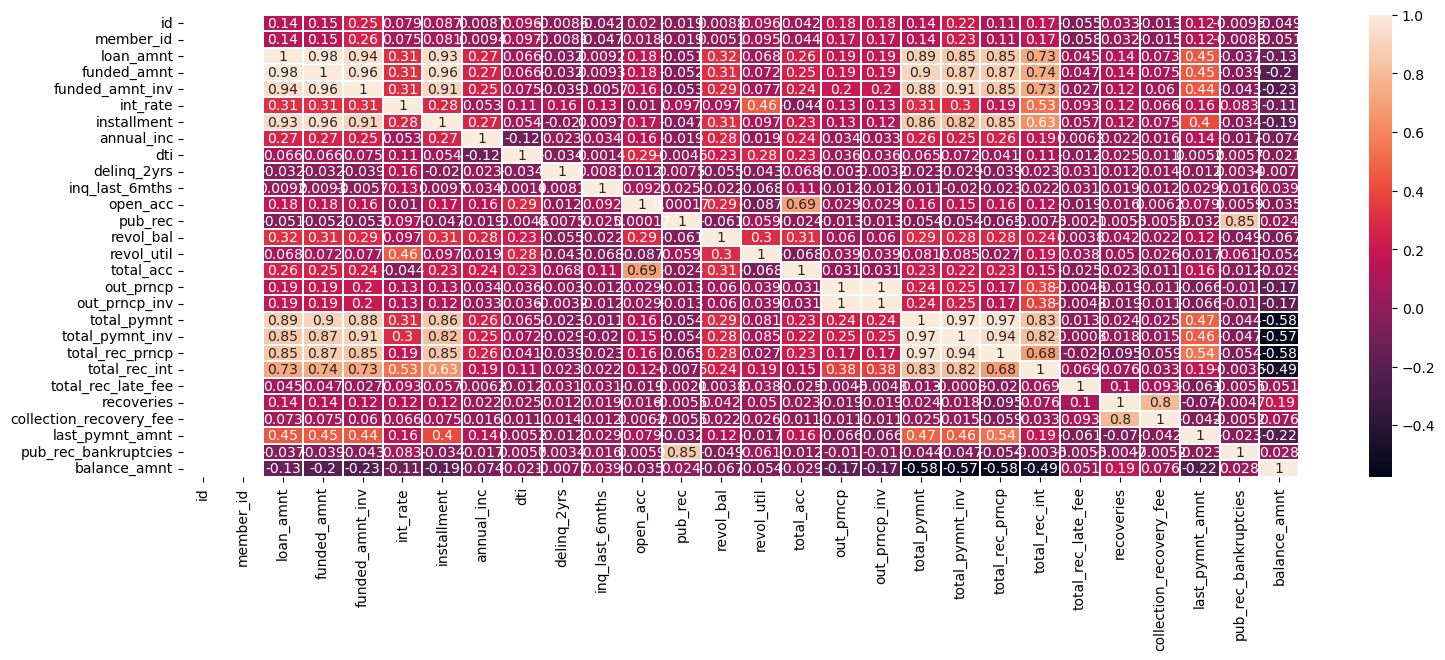

In [966]:
plt.figure(figsize=(18, 6))
sns.heatmap(data=corr, annot=True, linewidths=.3, cbar=True, fmt='.2g', mask= col_indx_list )
plt.show()

In [967]:
# Excluding id and member id columns
corr = loan.iloc[:, 2:].corr()

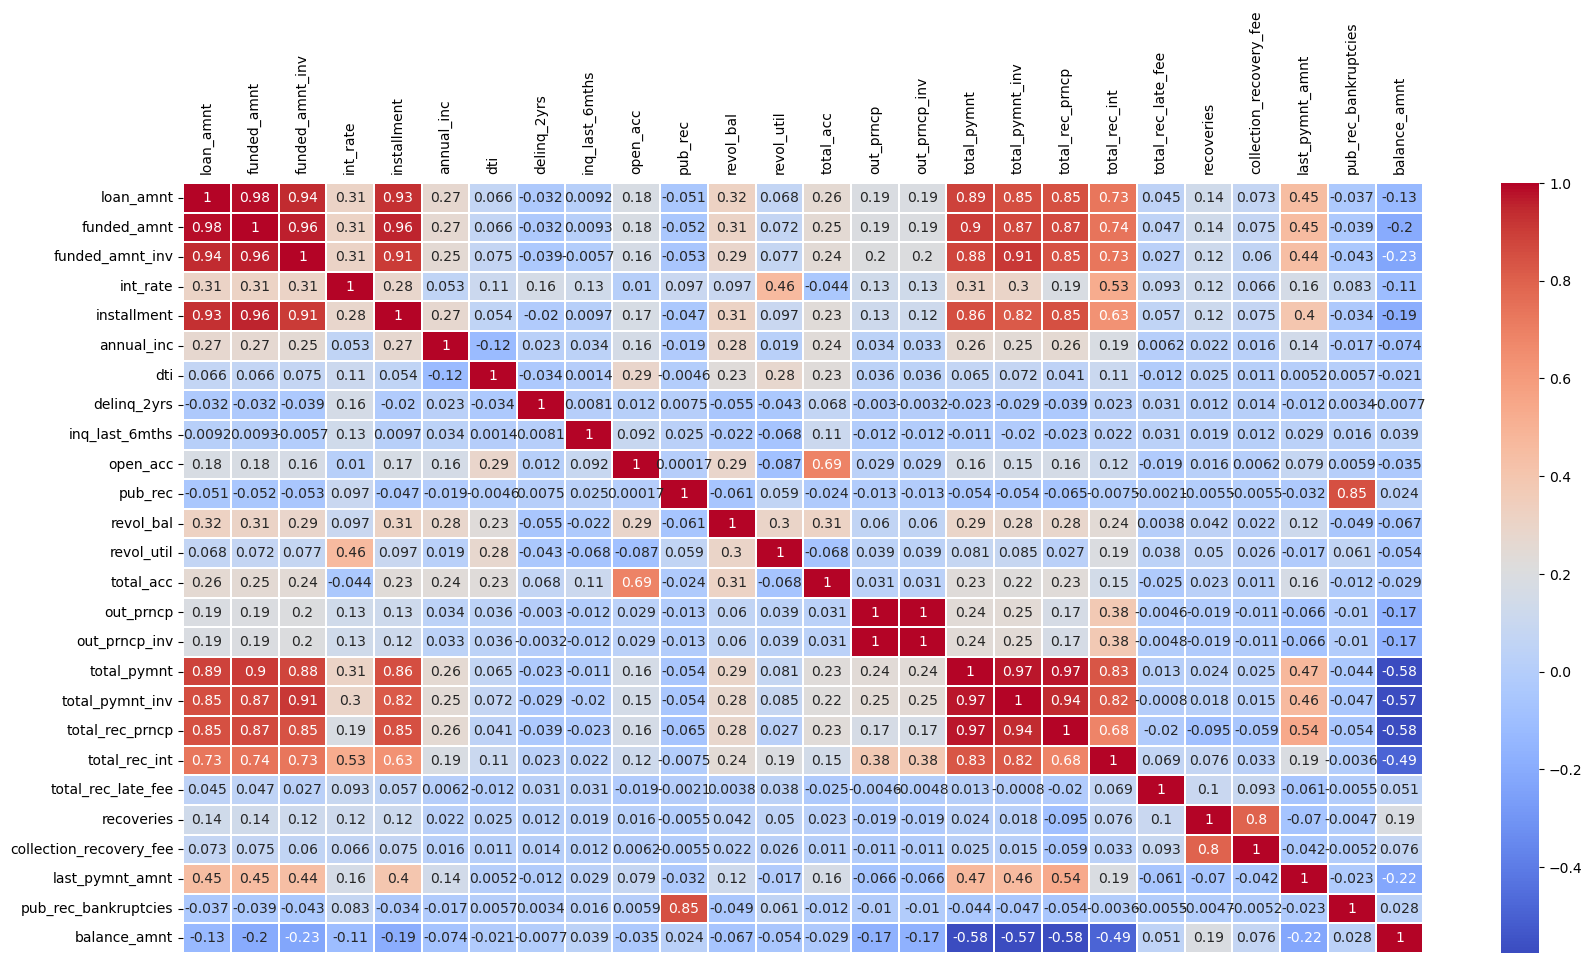

In [989]:
plt.figure(figsize=(20, 10))
ax = sns.heatmap(data=corr, annot=True, linewidths=.3, cbar=True, fmt='.2g', cmap="coolwarm")
#ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
#ax.tick_params(top=True, bottom=False,labeltop=True, labelbottom=False)
#ax.tick_params(which="minor", bottom=False, left=False)
#plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=90) 
plt.show()

#### from above heat map we identified that
##### 1. pub_rec_bankruptcies and "pub_rec" columns are highly co-related (0.85)
#### 2. last_pymnt_amnt colun modrately co-related with loan_amnt, installment, total_pymnt, total_rec_prncp columns


In [ ]:
# using annotation_keyword

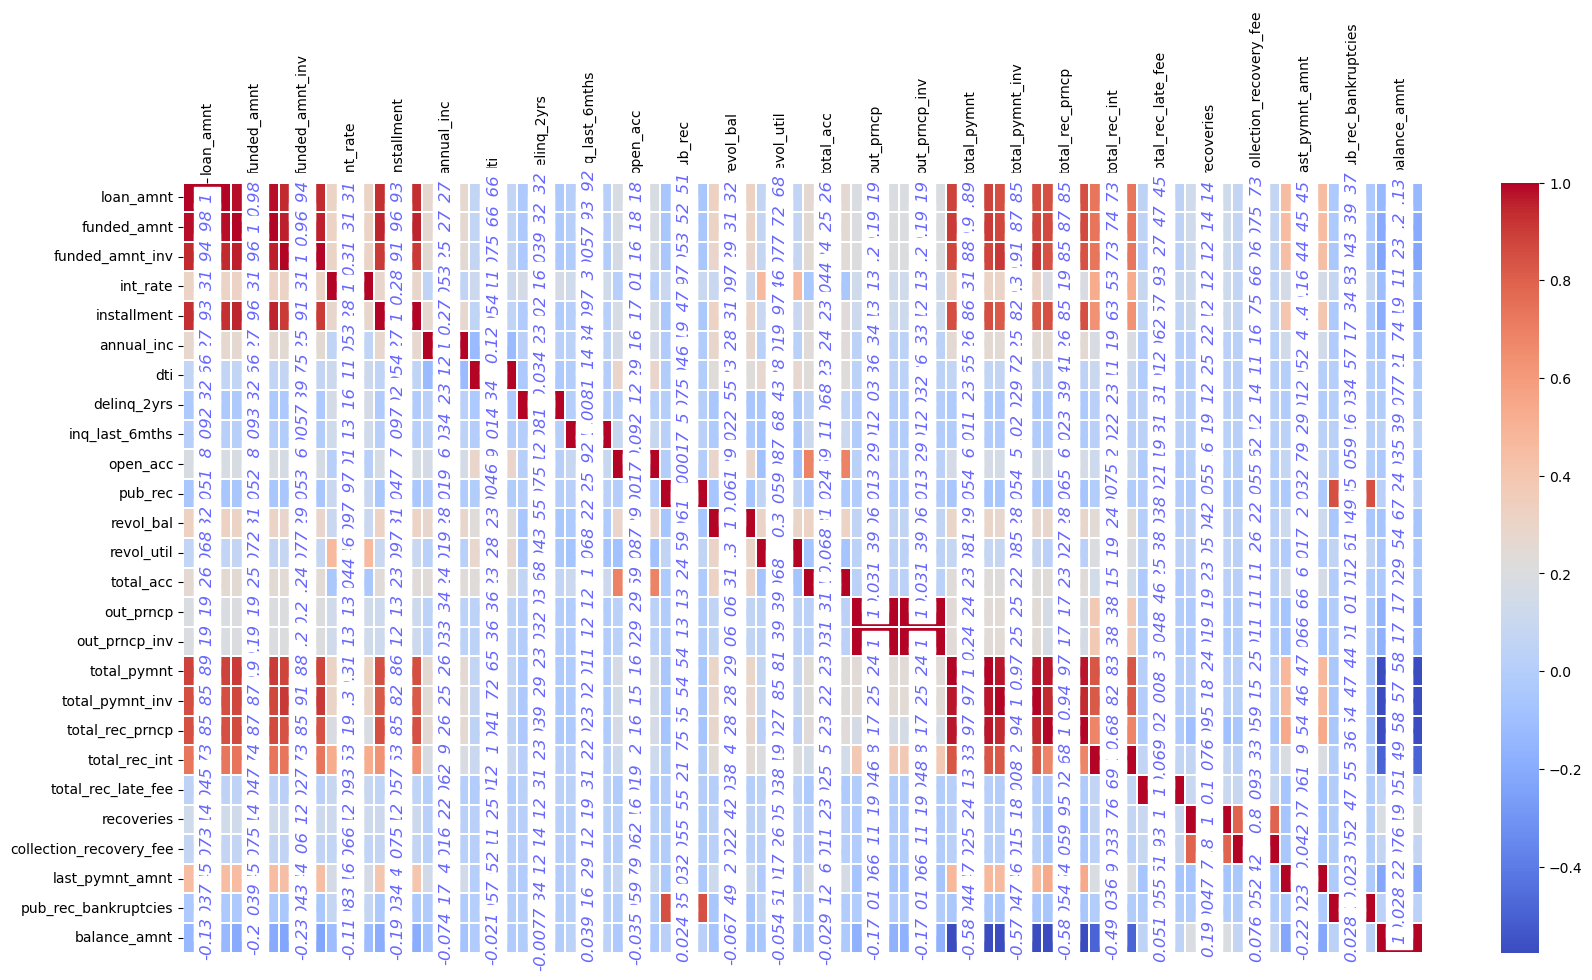

In [992]:
plt.figure(figsize=(20, 10))
_annot_kws={'fontsize':12, 'fontstyle':'italic', 'color':"b", 'alpha':0.6, 'rotation':"vertical",
            'verticalalignment':'center', 'backgroundcolor':'w'}
ax = sns.heatmap(data=corr, annot=True, linewidths=.3, cbar=True, fmt='.2g', cmap="coolwarm", annot_kws=_annot_kws)
ax.xaxis.tick_top()
plt.xticks(rotation=90)
plt.show()

In [994]:
loan.iloc[:3, :18]

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   

   int_rate  installment grade sub_grade emp_title emp_length home_ownership  \
0     10.65       162.87     B        B2   US Army  10+ years           RENT   
1     15.27        59.83     C        C4     Ryder   < 1 year           RENT   
2     15.96        84.33     C        C5   US Army  10+ years           RENT   

   annual_inc verification_status    issue_d  loan_status  \
0     24000.0            Verified 2011-12-01   Fully Paid   
1     30000.0     Source Verified 2011-12-01  Charged Off   
2     12252.0        Not Verified 2011-12-01   Fully Paid   

                                                                url  
0  https://lendingclub.com/browse/loanDetail.action?loan_id=1077501  
1  https://lendingclub.com/browse/loanDetail.action?loan_id=1077430  
2  https://lendingclub.com/browse/loanDetail.action?loan_id=1077175

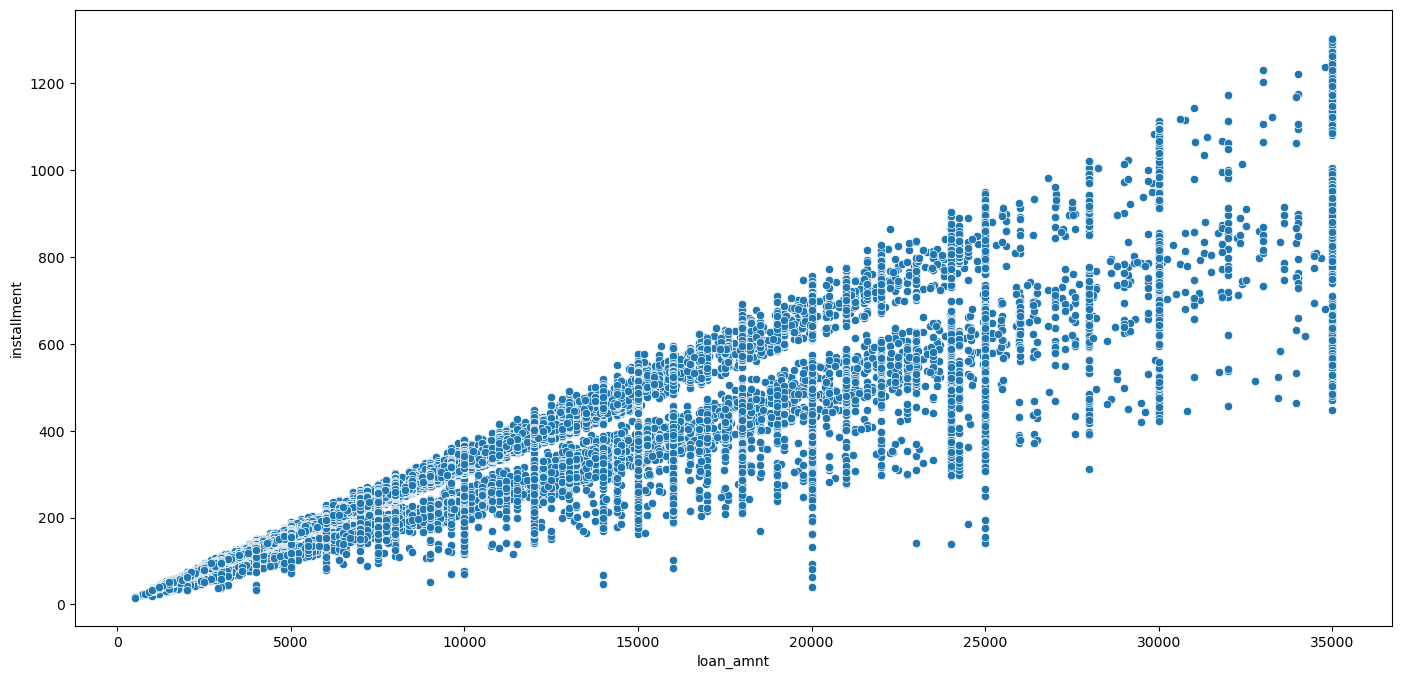

In [1002]:
plt.figure(figsize=(17, 8))
sns.scatterplot(x='loan_amnt', y='installment', data=loan)
#plt.xscale('log')
plt.show()

In [1003]:
loan.iloc[:2, :18]

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   

   int_rate  installment grade sub_grade emp_title emp_length home_ownership  \
0     10.65       162.87     B        B2   US Army  10+ years           RENT   
1     15.27        59.83     C        C4     Ryder   < 1 year           RENT   

   annual_inc verification_status    issue_d  loan_status  \
0     24000.0            Verified 2011-12-01   Fully Paid   
1     30000.0     Source Verified 2011-12-01  Charged Off   

                                                                url  
0  https://lendingclub.com/browse/loanDetail.action?loan_id=1077501  
1  https://lendingclub.com/browse/loanDetail.action?loan_id=1077430

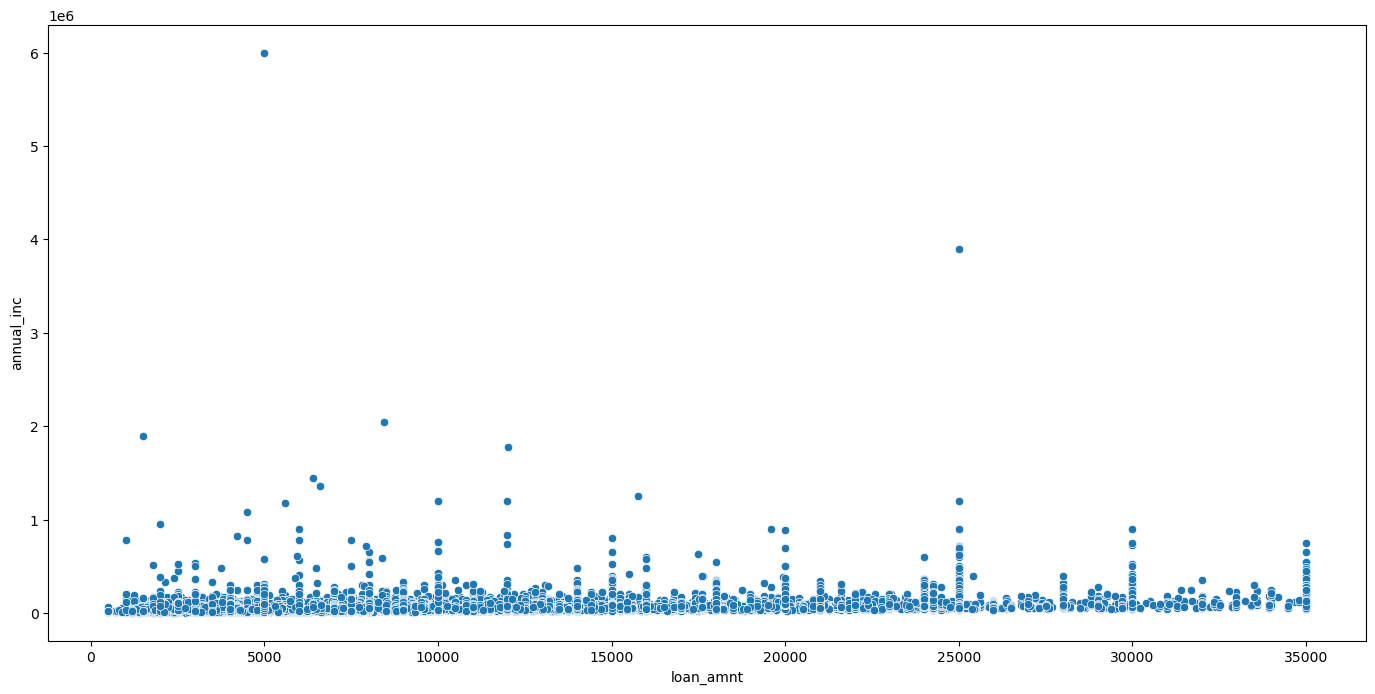

In [1008]:
plt.figure(figsize=(17, 8))
sns.scatterplot(x='loan_amnt', y='annual_inc', data=loan)
#plt.yscale('log')
# plt.xscale('log')
plt.show()

In [1011]:
loan.iloc[:3, 21:38]

zip_code addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0    860xx         AZ  27.65            0       1985-01-01               1   
1    309xx         GA   1.00            0       1999-04-01               5   
2    606xx         IL   8.72            0       2001-11-01               2   

   open_acc  pub_rec  revol_bal  revol_util  total_acc initial_list_status  \
0         3        0      13648   83.699997          9                   f   
1         3        0       1687    9.400000          4                   f   
2         2        0       2956   98.500000         10                   f   

   out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  
0        0.0            0.0  5863.155187          5833.84          5000.00  
1        0.0            0.0  1008.710000          1008.71           456.46  
2        0.0            0.0  3005.666844          3005.67          2400.00

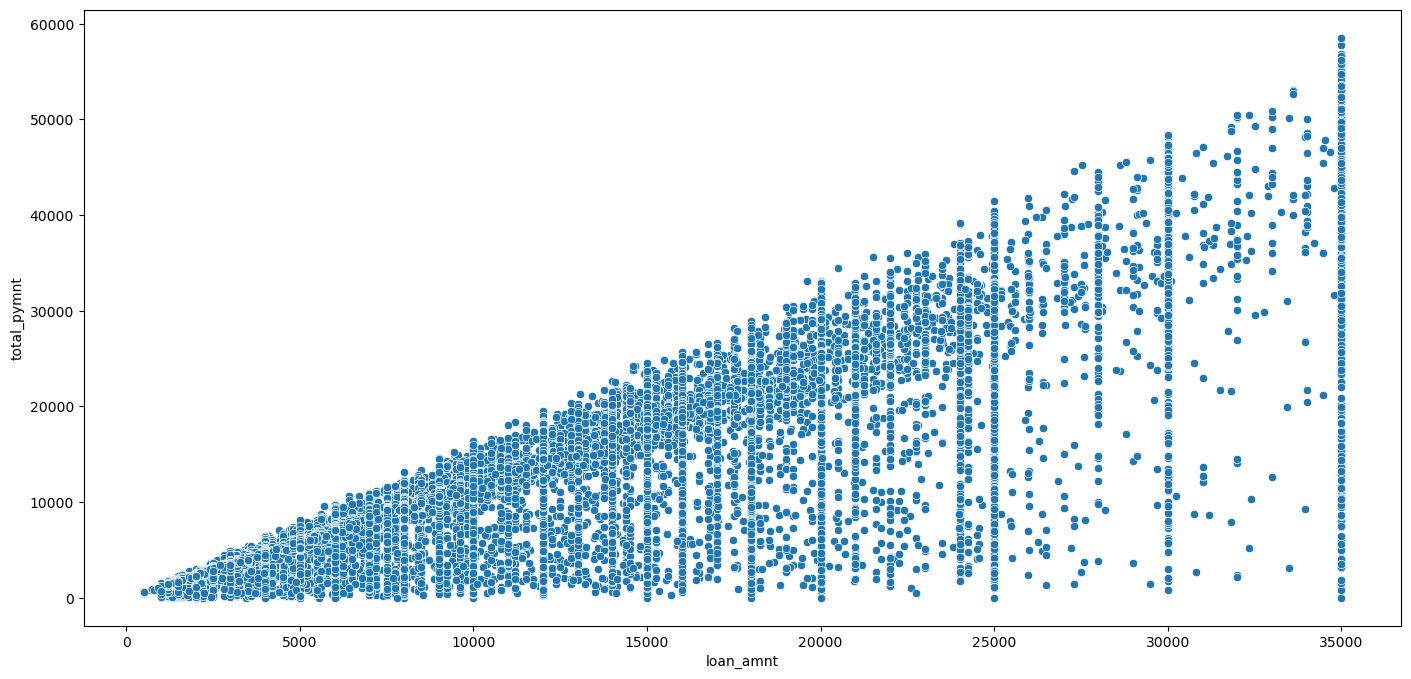

In [1014]:
plt.figure(figsize=(17, 8))
sns.scatterplot(x='loan_amnt', y='total_pymnt', data=loan)
#plt.yscale('log')
# plt.xscale('log')
plt.show()

In [ ]:
loan.iloc[:3, 21:38]

<Figure size 1800x800 with 0 Axes>

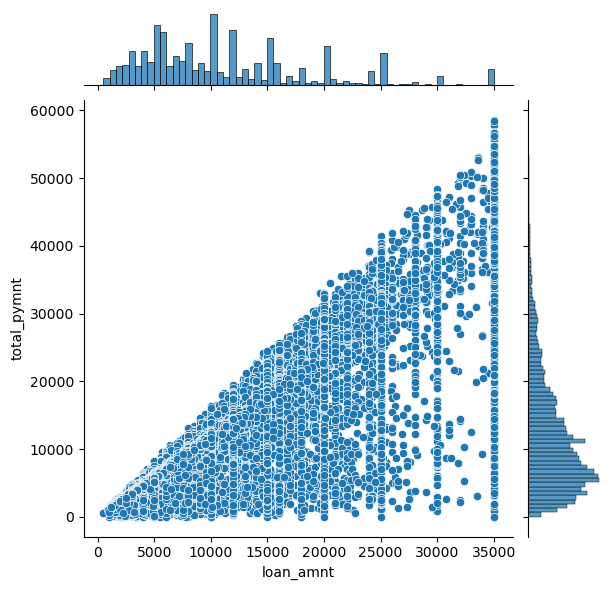

In [1023]:
plt.figure(figsize=(18, 8))
sns.jointplot(x='loan_amnt', y='total_pymnt', data=loan, kind='scatter')
plt.show()

<Figure size 1800x800 with 0 Axes>

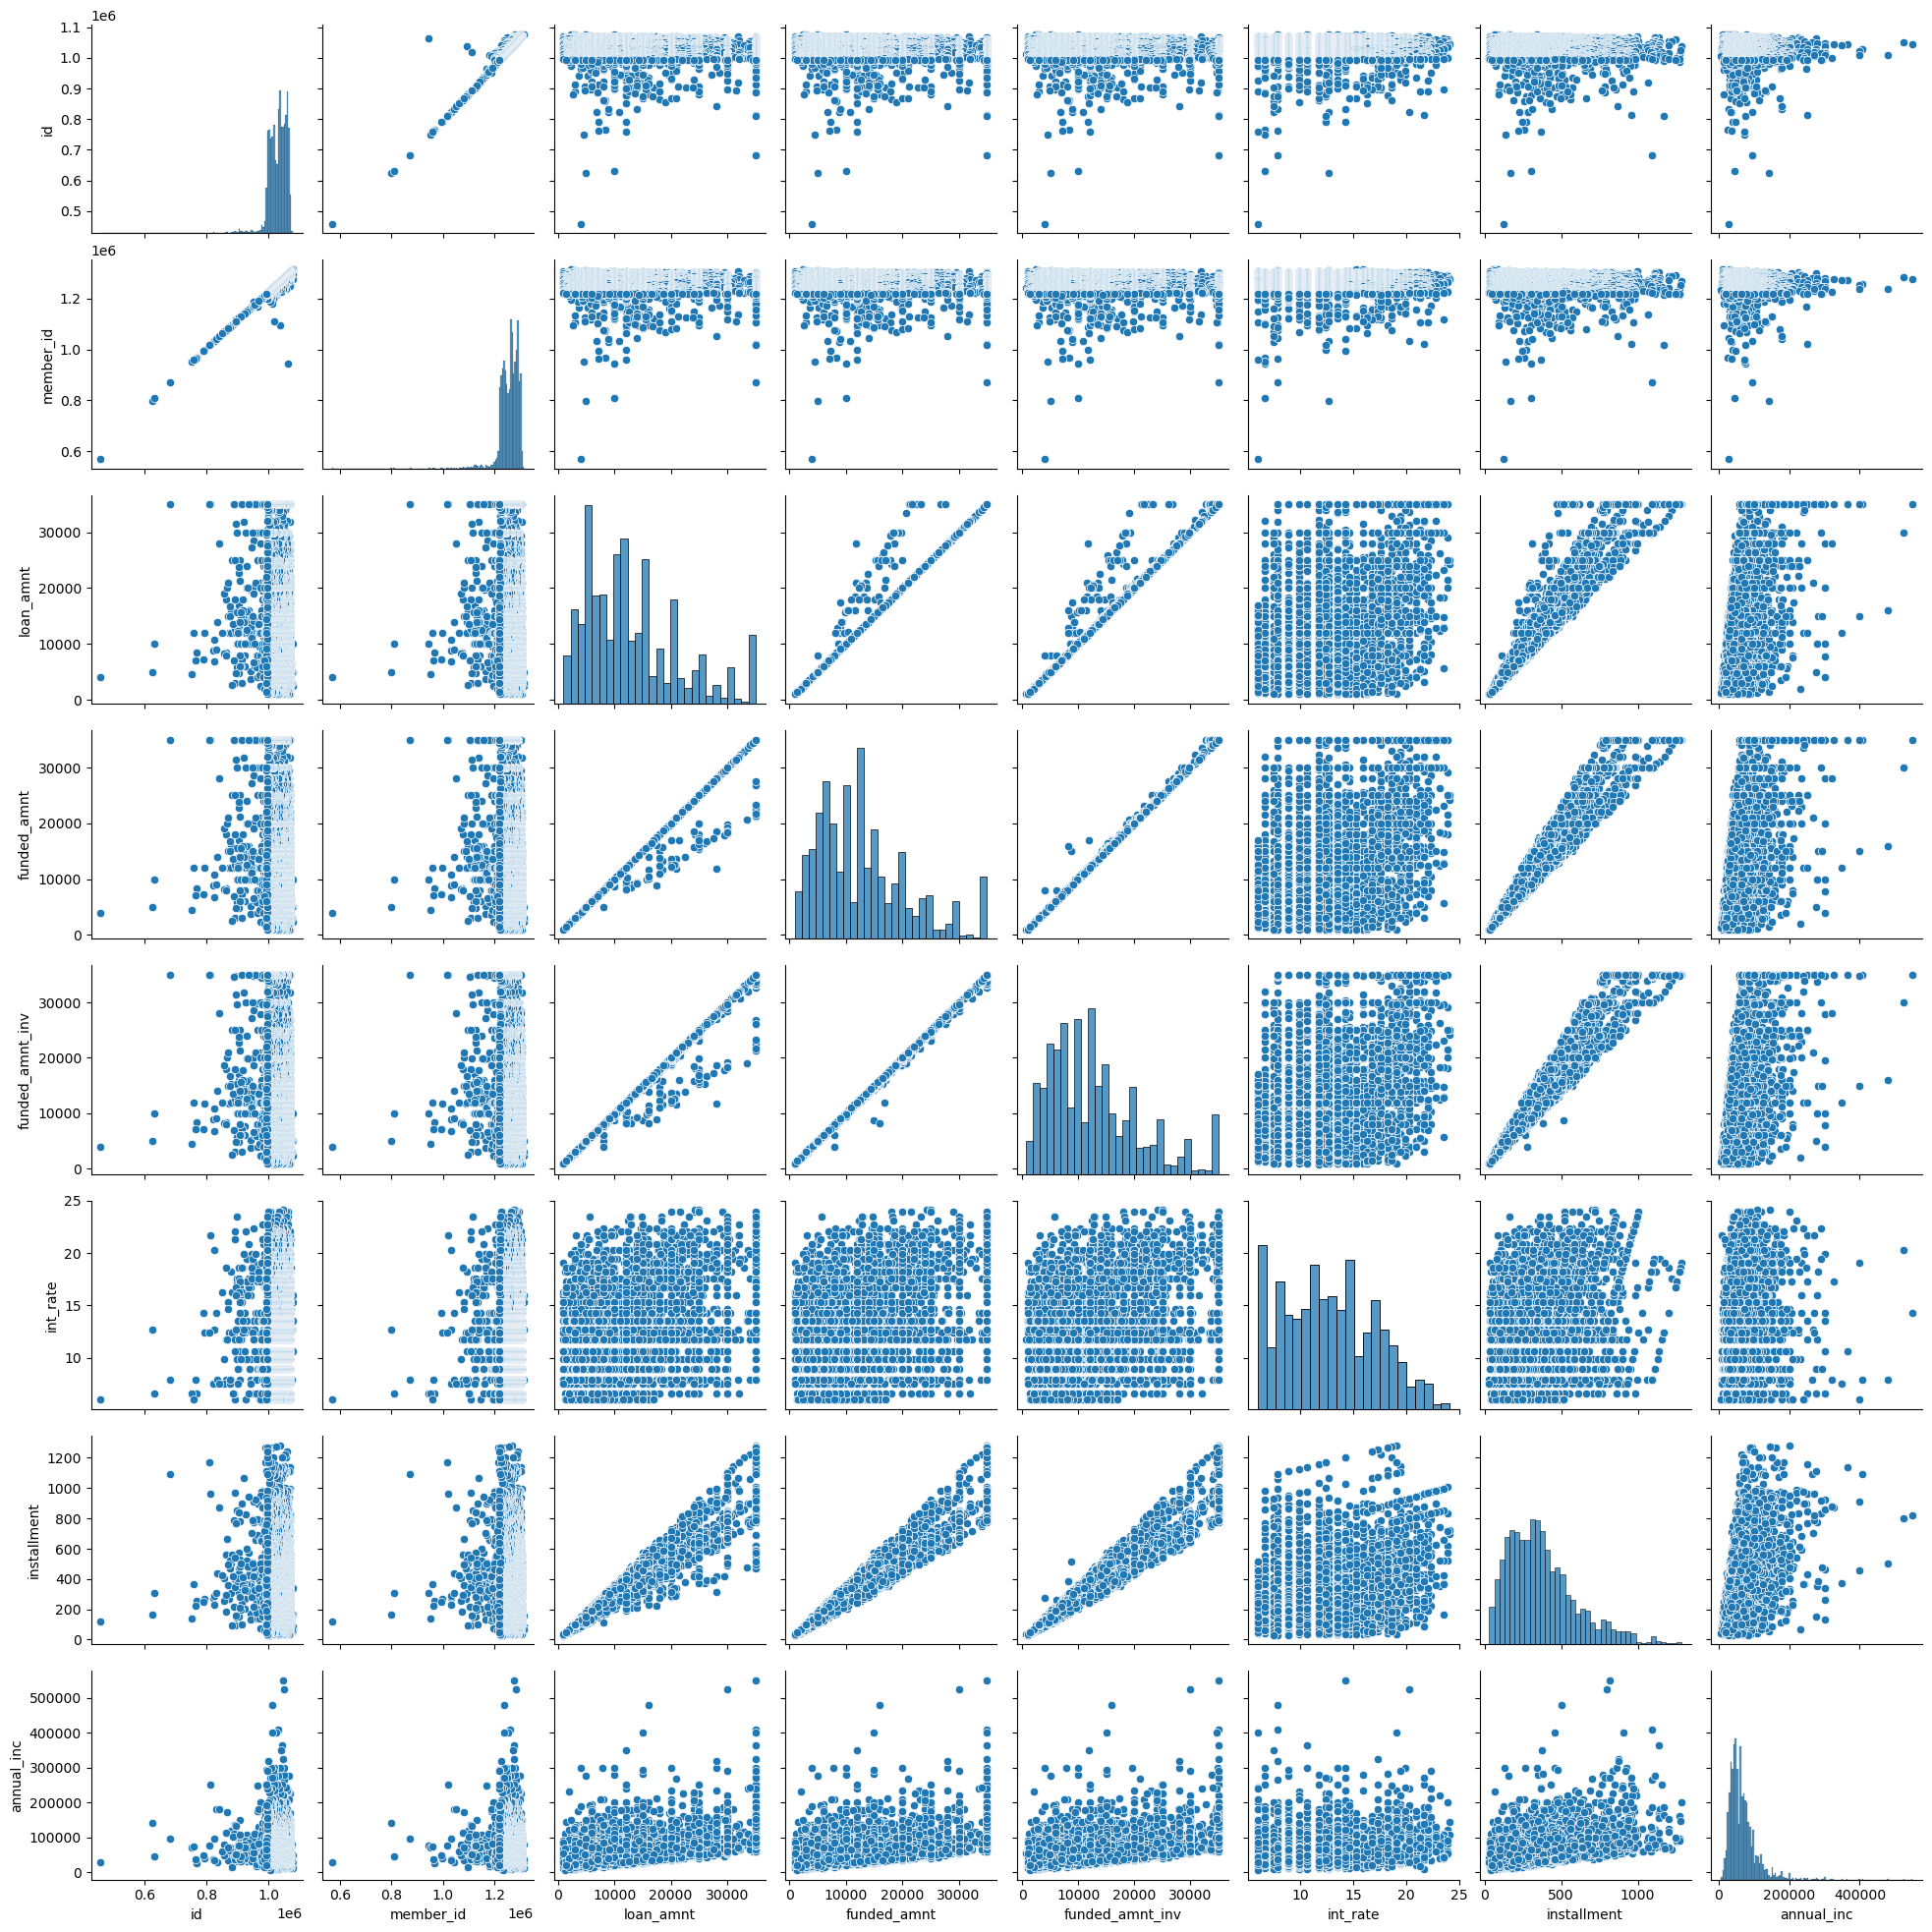

In [1027]:
plt.figure(figsize=(18, 8))
sns.pairplot(data=loan.iloc[:5000, 0:15])
plt.show()

In [1030]:
#loan.isnull().sum()

In [1035]:
loan['loan_amnt'].describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [1034]:
loan.pivot_table(index=['loan_status'], values=['loan_amnt'], aggfunc=np.median)

loan_amnt
loan_status           
Charged Off      10000
Current          15825
Fully Paid        9600

In [1038]:
loan.pivot_table(index=['loan_status'], values=['loan_amnt'], aggfunc=np.mean)

loan_amnt
loan_status              
Charged Off  12104.385108
Current      17053.991228
Fully Paid   10866.455994

<AxesSubplot:ylabel='loan_amnt'>

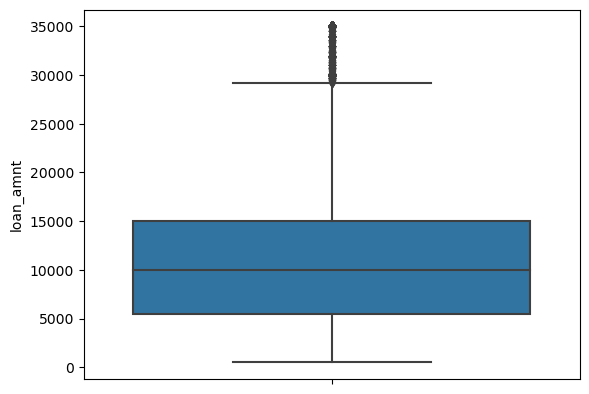

In [1037]:
sns.boxplot(y=loan['loan_amnt'])

In [1039]:
loan.iloc[:3, 0:18]

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   

   int_rate  installment grade sub_grade emp_title emp_length home_ownership  \
0     10.65       162.87     B        B2   US Army  10+ years           RENT   
1     15.27        59.83     C        C4     Ryder   < 1 year           RENT   
2     15.96        84.33     C        C5   US Army  10+ years           RENT   

   annual_inc verification_status    issue_d  loan_status  \
0     24000.0            Verified 2011-12-01   Fully Paid   
1     30000.0     Source Verified 2011-12-01  Charged Off   
2     12252.0        Not Verified 2011-12-01   Fully Paid   

                                                                url  
0  https://lendingclub.com/browse/loanDetail.action?loan_id=1077501  
1  https://lendingclub.com/browse/loanDetail.action?loan_id=1077430  
2  https://lendingclub.com/browse/loanDetail.action?loan_id=1077175

In [1067]:
loan_amnt_vrs_loan_status_count = loan.pivot_table(index=['loan_amnt'], values=['loan_status'], aggfunc='count')
loan_amnt_vrs_loan_status_count.sort_values(by='loan_status', ascending=False)

loan_status
loan_amnt             
10000             2833
12000             2334
5000              2051
6000              1908
15000             1895
...                ...
21825                1
3225                 1
14775                1
22125                1
18150                1

[885 rows x 1 columns]

In [1069]:
loan_int_rate_vrs_loan_status_count = loan.pivot_table(index=['int_rate'], values=['loan_status'], aggfunc='max')
loan_int_rate_vrs_loan_status_count.sort_values(by='loan_status', ascending=False)

loan_status
int_rate              
5.420000    Fully Paid
16.490000   Fully Paid
16.400000   Fully Paid
16.350000   Fully Paid
16.330000   Fully Paid
...                ...
16.150000  Charged Off
15.010000  Charged Off
18.719999  Charged Off
17.459999  Charged Off
24.400000  Charged Off

[371 rows x 1 columns]

In [ ]:
loan.pivot_table(index=['int_rate'], values=['loan_status'], aggfunc='max')

####  convert loan_status field to crossponding numerical value to analyise better

In [1070]:
loan['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [1073]:
loan['is_fully_paid'] = loan['loan_status'].apply(lambda ls: True if ls == 'Fully Paid' else False)
loan['is_fully_paid'].head()

0     True
1    False
2     True
3     True
4    False
Name: is_fully_paid, dtype: bool

In [1074]:
loan['is_fully_paid'].sum()

32950

In [1075]:
loan['is_charged_off'] = loan['loan_status'].apply(lambda ls: True if ls == 'Charged Off' else False)
loan['is_charged_off'].head()

0    False
1     True
2    False
3    False
4    False
Name: is_charged_off, dtype: bool

In [1076]:
loan['is_charged_off'].sum()

5627

In [1077]:
loan['is_current'] = loan['loan_status'].apply(lambda ls: True if ls == 'Current' else False)
loan['is_current'].head()

0    False
1    False
2    False
3    False
4     True
Name: is_current, dtype: bool

In [1078]:
loan['is_current'].sum()

1140

In [1081]:
loan.iloc[:5, -5:]

loan_id  balance_amnt  is_fully_paid  is_charged_off  is_current
0  1077501   -863.155187           True           False       False
1  1077430   1491.290000          False            True       False
2  1077175   -605.666844           True           False       False
3  1076863  -2231.890000           True           False       False
4  1075358   -513.330000          False           False        True

In [1082]:
corr_2 = loan.iloc[:, 2:].corr()
corr_2

loan_amnt  funded_amnt  funded_amnt_inv  int_rate  \
loan_amnt                 1.000000     0.981578         0.940034  0.309415   
funded_amnt               0.981578     1.000000         0.958422  0.312619   
funded_amnt_inv           0.940034     0.958422         1.000000  0.306657   
int_rate                  0.309415     0.312619         0.306657  1.000000   
installment               0.930288     0.956159         0.905039  0.282703   
annual_inc                0.271149     0.266965         0.254375  0.053185   
dti                       0.066439     0.066283         0.074689  0.111162   
delinq_2yrs              -0.031864    -0.032355        -0.038501  0.157916   
inq_last_6mths            0.009229     0.009259        -0.005712  0.133013   
open_acc                  0.177168     0.175530         0.163027  0.010395   
pub_rec                  -0.051236    -0.052169        -0.053214  0.097208   
revol_bal                 0.317597     0.310392         0.290797  0.097100   
revol_util                0.067879     0.071671         0.076786  0.463763   
total_acc                 0.256442     0.250589         0.242854 -0.043570   
out_prncp                 0.192937     0.194941         0.203688  0.134616   
out_prncp_inv             0.192623     0.194675         0.203693  0.134668   
total_pymnt               0.886613     0.903160         0.881228  0.308268   
total_pymnt_inv           0.854243     0.870799         0.913257  0.303670   
total_rec_prncp           0.852021     0.870255         0.845848  0.186882   
total_rec_int             0.729726     0.737469         0.730914  0.529913   
total_rec_late_fee        0.044706     0.046705         0.027172  0.092591   
recoveries                0.135446     0.136284         0.123759  0.122259   
collection_recovery_fee   0.072853     0.074676         0.060358  0.066380   
last_pymnt_amnt           0.448742     0.453133         0.442604  0.157775   
pub_rec_bankruptcies     -0.037180    -0.038502        -0.042746  0.082550   
balance_amnt             -0.132750    -0.200765        -0.227185 -0.113800   
is_fully_paid            -0.104460    -0.101070        -0.088103 -0.243730   
is_charged_off            0.048217     0.045544         0.026621  0.196253   
is_current                0.134510     0.132460         0.142784  0.138930   

                         installment  annual_inc       dti  delinq_2yrs  \
loan_amnt                   0.930288    0.271149  0.066439    -0.031864   
funded_amnt                 0.956159    0.266965  0.066283    -0.032355   
funded_amnt_inv             0.905039    0.254375  0.074689    -0.038501   
int_rate                    0.282703    0.053185  0.111162     0.157916   
installment                 1.000000    0.270874  0.054186    -0.019657   
annual_inc                  0.270874    1.000000 -0.122732     0.023083   
dti                         0.054186   -0.122732  1.000000    -0.034452   
delinq_2yrs                -0.019657    0.023083 -0.034452     1.000000   
inq_last_6mths              0.009722    0.033908  0.001405     0.008091   
open_acc                    0.172812    0.158200  0.288045     0.011656   
pub_rec                    -0.046532   -0.018689 -0.004621     0.007463   
revol_bal                   0.312679    0.279961  0.228743    -0.055125   
revol_util                  0.096969    0.018705  0.278111    -0.043028   
total_acc                   0.230824    0.235771  0.229881     0.067892   
out_prncp                   0.125082    0.033573  0.036095    -0.003008   
out_prncp_inv               0.124932    0.033472  0.036012    -0.003203   
total_pymnt                 0.856928    0.257980  0.064766    -0.022695   
total_pymnt_inv             0.817416    0.247119  0.071647    -0.028976   
total_rec_prncp             0.850773    0.259571  0.041316    -0.038795   
total_rec_int               0.634725    0.185476  0.106071     0.023077   
total_rec_late_fee          0.056709    0.006243 -0.011781     0.030609   
recoveries                  0.1181

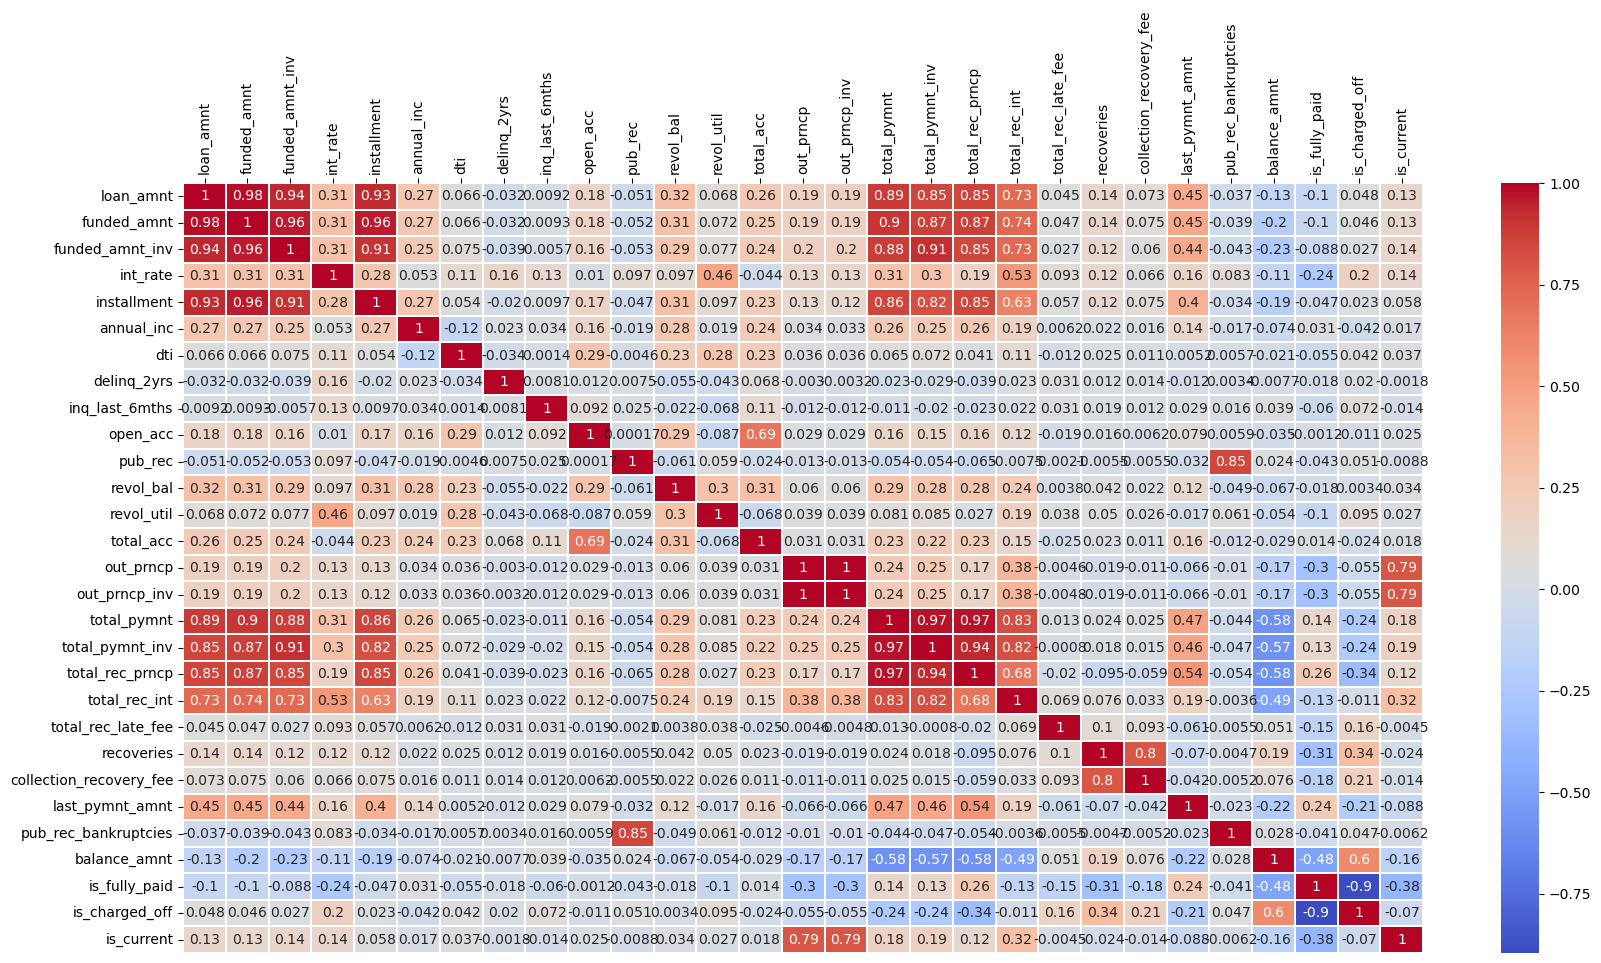

In [1083]:
plt.figure(figsize=(20, 10))
ax = sns.heatmap(data=corr_2, annot=True, linewidths=.3, cbar=True, fmt='.2g', cmap="coolwarm")
ax.xaxis.tick_top()
plt.xticks(rotation=90) 
plt.show()

In [1087]:
loan.pivot_table(index='loan_amnt', 
                 values=['is_fully_paid', 'is_charged_off', 'is_current'],
                 aggfunc={'is_fully_paid': ['mean', 'count'], 'is_charged_off': ['mean', 'count'], 
                          'is_current': ['mean', 'count']})

is_charged_off           is_current           is_fully_paid  \
                   count      mean      count      mean         count   
loan_amnt                                                               
500                    5  0.000000          5  0.000000             5   
700                    1  0.000000          1  0.000000             1   
725                    1  0.000000          1  0.000000             1   
750                    1  0.000000          1  0.000000             1   
800                    1  0.000000          1  0.000000             1   
...                  ...       ...        ...       ...           ...   
34475                  5  0.200000          5  0.000000             5   
34525                  1  0.000000          1  0.000000             1   
34675                  1  0.000000          1  0.000000             1   
34800                  2  0.000000          2  0.000000             2   
35000                679  0.220913        679  0.114875           679   

                     
               mean  
loan_amnt            
500        1.000000  
700        1.000000  
725        1.000000  
750        1.000000  
800        1.000000  
...             ...  
34475      0.800000  
34525      1.000000  
34675      1.000000  
34800      1.000000  
35000      0.664212  

[885 rows x 6 columns]

In [1089]:
loan.pivot_table(index='int_rate', 
                 values=['is_fully_paid', 'is_charged_off', 'is_current'],
                 aggfunc={'is_fully_paid': ['mean', 'count'], 'is_charged_off': ['mean', 'count'], 
                          'is_current': ['mean', 'count']}).sort_values(by='int_rate', ascending=False)

is_charged_off           is_current           is_fully_paid  \
                   count      mean      count      mean         count   
int_rate                                                                
24.590000              1  0.000000          1  1.000000             1   
24.400000              1  1.000000          1  0.000000             1   
24.110001              3  0.333333          3  0.000000             3   
23.910000             11  0.181818         11  0.181818            11   
23.590000              4  0.250000          4  0.000000             4   
...                  ...       ...        ...       ...           ...   
6.030000             447  0.011186        447  0.000000           447   
6.000000              18  0.000000         18  0.111111            18   
5.990000             347  0.054755        347  0.000000           347   
5.790000             410  0.039024        410  0.000000           410   
5.420000             573  0.034904        573  0.000000           573   

                     
               mean  
int_rate             
24.590000  0.000000  
24.400000  0.000000  
24.110001  0.666667  
23.910000  0.636364  
23.590000  0.750000  
...             ...  
6.030000   0.988814  
6.000000   0.888889  
5.990000   0.945245  
5.790000   0.960976  
5.420000   0.965096  

[371 rows x 6 columns]

In [1090]:
loan.pivot_table(index='loan_status', 
                 values='int_rate',
                 aggfunc='mean')

int_rate
loan_status           
Charged Off  13.820432
Current      15.031465
Fully Paid   11.609761

In [1092]:
loan.pivot_table(index='loan_status', values='loan_amnt', aggfunc='mean')

loan_amnt
loan_status              
Charged Off  12104.385108
Current      17053.991228
Fully Paid   10866.455994

In [1093]:
loan.iloc[:2, 0:18]

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   

   int_rate  installment grade sub_grade emp_title emp_length home_ownership  \
0     10.65       162.87     B        B2   US Army  10+ years           RENT   
1     15.27        59.83     C        C4     Ryder   < 1 year           RENT   

   annual_inc verification_status    issue_d  loan_status  \
0     24000.0            Verified 2011-12-01   Fully Paid   
1     30000.0     Source Verified 2011-12-01  Charged Off   

                                                                url  
0  https://lendingclub.com/browse/loanDetail.action?loan_id=1077501  
1  https://lendingclub.com/browse/loanDetail.action?loan_id=1077430

In [1094]:
loan.pivot_table(index='loan_status', columns=['term'], values='loan_amnt', aggfunc='mean')

term           36 months     60 months
loan_status                           
Charged Off  9388.720174  15755.822917
Current              NaN  17053.991228
Fully Paid   9618.411033  15425.935602

In [1095]:
loan.pivot_table(index='loan_status', columns=['grade'], values='loan_amnt', aggfunc='mean')

grade                   A             B             C             D  \
loan_status                                                           
Charged Off   7799.916944  10905.771930  11044.469191  12204.651163   
Current      10174.375000  17355.797101  16617.613636  15494.819820   
Fully Paid    8670.959970  10938.817073  10767.978264  12118.918578   

grade                   E             F             G  
loan_status                                            
Charged Off  15849.825175  19272.570533  18542.821782  
Current      18333.798883  21947.260274  19766.176471  
Fully Paid   15617.825975  17523.592085  21125.378788

In [1112]:
loan['grade'].describe()

count     39717
unique        7
top           B
freq      12020
Name: grade, dtype: object

In [1111]:
loan.pivot_table(index='loan_status', values='grade', aggfunc=pd.Series.describe)

grade
loan_status                      
Charged Off    [5627, 7, B, 1425]
Current         [1140, 7, B, 345]
Fully Paid   [32950, 7, B, 10250]

In [1133]:
loan.pivot_table(index=['loan_amnt'], values='loan_status', aggfunc=pd.Series.describe).sort_values(by='loan_amnt', 
                                                                                                  ascending=False)

loan_status
loan_amnt                           
35000      [679, 3, Fully Paid, 451]
34800          [2, 1, Fully Paid, 2]
34675          [1, 1, Fully Paid, 1]
34525          [1, 1, Fully Paid, 1]
34475          [5, 2, Fully Paid, 4]
...                              ...
800            [1, 1, Fully Paid, 1]
750            [1, 1, Fully Paid, 1]
725            [1, 1, Fully Paid, 1]
700            [1, 1, Fully Paid, 1]
500            [5, 1, Fully Paid, 5]

[885 rows x 1 columns]

In [1143]:
loan.pivot_table(index=['grade'], values='loan_status', aggfunc='describe').sort_values(by='grade', 
                                                                                                  ascending=True)

count   freq         top unique
grade                                 
A      10085   9443  Fully Paid      3
B      12020  10250  Fully Paid      3
C       8098   6487  Fully Paid      3
D       5307   3967  Fully Paid      3
E       2842   1948  Fully Paid      3
F       1049    657  Fully Paid      3
G        316    198  Fully Paid      3

In [1139]:
loan.pivot_table(index=['grade'], values=['is_fully_paid', 'is_charged_off', 'is_current'], 
                 aggfunc={'is_fully_paid': 'describe', 
                         'is_charged_off': 'describe',
                         'is_current': 'describe'}).sort_values(by='grade', ascending=True)

is_charged_off                      is_current                       \
               count   freq    top unique      count   freq    top unique   
grade                                                                       
A              10085   9483  False      2      10085  10045  False      2   
B              12020  10595  False      2      12020  11675  False      2   
C               8098   6751  False      2       8098   7834  False      2   
D               5307   4189  False      2       5307   5085  False      2   
E               2842   2127  False      2       2842   2663  False      2   
F               1049    730  False      2       1049    976  False      2   
G                316    215  False      2        316    299  False      2   

      is_fully_paid                      
              count   freq   top unique  
grade                                    
A             10085   9443  True      2  
B             12020  10250  True      2  
C              8098   6487  True      2  
D              5307   3967  True      2  
E              2842   1948  True      2  
F              1049    657  True      2  
G               316    198  True      2

In [1138]:
loan.pivot_table(index=['grade'], values='is_fully_paid', 
                 aggfunc='describe').sort_values(by='grade', ascending=True)

count   freq   top unique
grade                           
A      10085   9443  True      2
B      12020  10250  True      2
C       8098   6487  True      2
D       5307   3967  True      2
E       2842   1948  True      2
F       1049    657  True      2
G        316    198  True      2

In [1146]:
loan.iloc[:2, 15:30]

issue_d  loan_status  \
0 2011-12-01   Fully Paid   
1 2011-12-01  Charged Off   

                                                                url  \
0  https://lendingclub.com/browse/loanDetail.action?loan_id=1077501   
1  https://lendingclub.com/browse/loanDetail.action?loan_id=1077430   

                                                                                                                                                    desc  \
0                                                                           Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>   
1    Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/...   

       purpose     title zip_code addr_state    dti  delinq_2yrs  \
0  credit_card  Computer    860xx         AZ  27.65            0   
1          car      bike    309xx         GA   1.00            0   

  earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  
0       1985-01-01               1         3        0      13648  
1       1999-04-01               5         3        0       1687

In [1147]:
loan['loan_status'].describe()

count          39717
unique             3
top       Fully Paid
freq           32950
Name: loan_status, dtype: object

In [1151]:
pd.DataFrame(data = {'count': loan['loan_status'].value_counts(),
                     '%': (loan['loan_status'].value_counts()/len(loan.index)*100)})

count          %
Fully Paid   32950  82.961956
Charged Off   5627  14.167737
Current       1140   2.870307

In [1153]:
loan.pivot_table(index='loan_status', values='loan_amnt')

loan_amnt
loan_status              
Charged Off  12104.385108
Current      17053.991228
Fully Paid   10866.455994

In [1155]:
loan.pivot_table(index='purpose',  columns=['loan_status'], values=['loan_amnt', 'int_rate'])

int_rate                           loan_amnt  \
loan_status        Charged Off    Current Fully Paid   Charged Off   
purpose                                                              
car                  12.372812  12.691999  10.229178   7264.218750   
credit_card          13.405000  15.478835  11.408515  13014.944649   
debt_consolidation   14.275599  15.303379  12.056410  13517.925551   
educational          12.724107        NaN  11.427398   7858.928571   
home_improvement     13.304006  14.594357  11.011341  11913.688761   
house                15.257966  13.920714  11.570811  12640.254237   
major_purchase       12.860496  13.537297  10.559061   9135.022523   
medical              13.322641  14.888333  11.083791   8568.396226   
moving               12.307717  14.184285  11.384276   5936.141304   
other                13.434202  14.814453  11.379220   8284.873618   
renewable_energy     12.221052  11.490000  11.257590   8421.052632   
small_business       14.203748  15.690946  12.410188  14604.894737   
vacation             11.610188  12.596666  10.699534   5875.943396   
wedding              13.488125  16.522381  11.582868  10786.979167   

                                                
loan_status              Current    Fully Paid  
purpose                                         
car                  7700.500000   6684.895444  
credit_card         19151.941748  11396.967670  
debt_consolidation  18596.203072  12319.847266  
educational                  NaN   6592.193309  
home_improvement    18061.633663  11224.861551  
house               21396.428571  12775.081169  
major_purchase      12968.243243   7950.272303  
medical             16260.416667   8040.608696  
moving              13410.714286   6688.119835  
other               12029.101562   7868.169864  
renewable_energy    27000.000000   8564.759036  
small_business      18359.121622  12904.671618  
vacation             8320.833333   5342.158385  
wedding             15175.000000   9636.596386

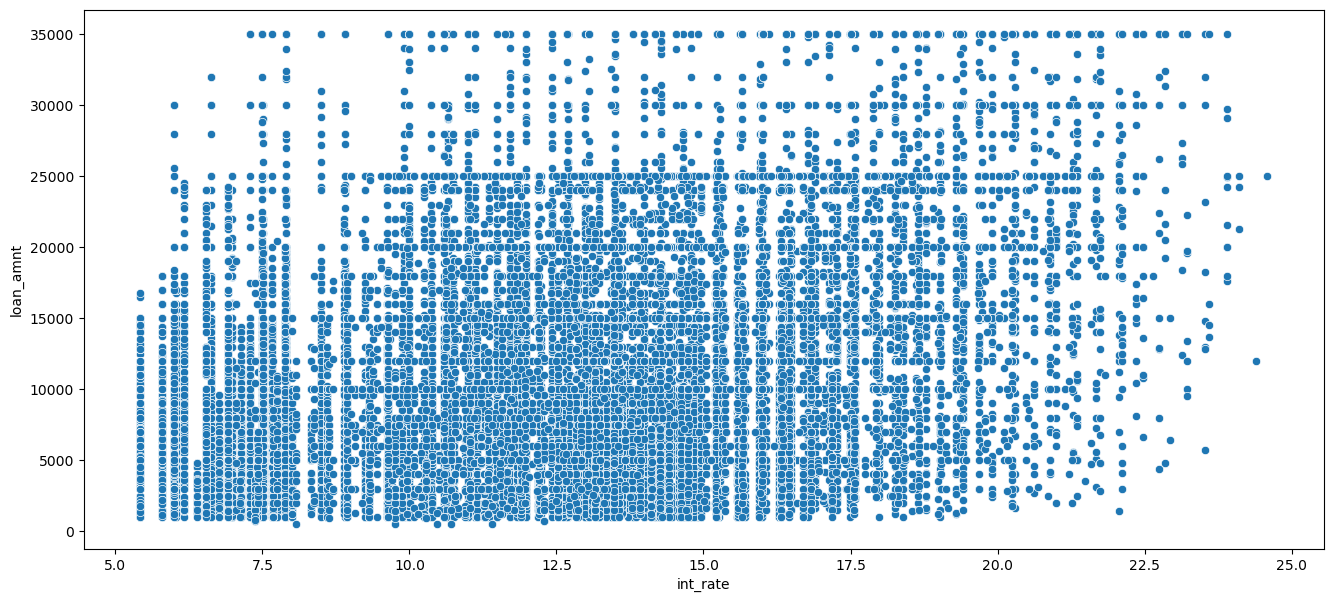

In [1157]:
plt.figure(figsize=(16, 7))

sns.scatterplot(x='int_rate', y='loan_amnt', data=loan)
plt.show()